## DSN AI Bootcamp Qualification Hackathon by Data Science Nigeria

### Checking the Versions of Libraries

In [1]:
import sys
# Version of Python IDLE
print('Python : {}'.format(sys.version))

import scipy
# Version of scipy
print('scipy : {}'.format(scipy.__version__))

import numpy
# Version of numpy
print('numpy : {}'.format(numpy.__version__))

import pandas
# Version of pandas
print('pandas : {}'.format(pandas.__version__))

import matplotlib
# Version of matplotlib
print('matplotlib : {}'.format(matplotlib.__version__))

import sklearn
# Version of Scikitlearn
print('sklearn : {}'.format(sklearn.__version__))

Python : 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
scipy : 1.4.1
numpy : 1.18.1
pandas : 1.1.2
matplotlib : 3.1.3
sklearn : 0.22.1


### Loading Libraies

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

### Loading the Data

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('SampleSubmission.csv')

In [4]:
train.shape

(56000, 52)

In [5]:
test.shape

(24000, 51)

In [6]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [7]:
#Target Column
train.iloc[:,51]

0         no
1         no
2        yes
3         no
4         no
        ... 
55995     no
55996    yes
55997     no
55998     no
55999     no
Name: default_status, Length: 56000, dtype: object

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [9]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [10]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [11]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [12]:
sample.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [13]:
train.groupby('default_status').size()

default_status
no     42285
yes    13715
dtype: int64

In [14]:
#since the target feature is the dafault_status, convert them to numerical values so that prediction can be made properly.
default_map = {'yes' : 1, 'no': 0}
train['default_status'] = train['default_status'].map(default_map)

In [15]:
#Converting the other categorical variable into numeric value to ease in computations
form_field47_map = {'charge' : 1, 'lending' : 2}

train['form_field47'] = train['form_field47'].map(form_field47_map)

### Preprocessing the Dataset

In [16]:
def missing_values_tables(df):
    # Total Missing Values
    missing_values = df.isnull().sum()
    
    # Percentage of Missing Values
    missing_value_percent = 100 * (df.isnull().sum()/len(df))
    
    # Make a table with the results
    missing_value_table = pandas.concat([missing_values, missing_value_percent], axis = 1)
    
    # Rename the columns 
    missing_values_table_rename_columns = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
                        
    # Sort the table by percentage of missing descending
    missing_values_table_rename_columns = missing_values_table_rename_columns[missing_values_table_rename_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # Printing some sumarry information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_rename_columns.shape[0]) +
              " columns that have missing values.")
                                   
     # Return the dataframe with missing information
    return missing_values_table_rename_columns
    

In [17]:
missing_values_tables(train)

Your selected dataframe has 52 columns.
There are 48 columns that have missing values.


,Missing Values,% of Total Values
form_field40,43729,78.1
form_field31,39408,70.4
form_field41,38229,68.3
form_field11,31421,56.1
form_field45,31317,55.9
form_field23,28123,50.2
form_field30,25509,45.6
form_field35,23148,41.3
form_field15,22475,40.1
form_field48,20889,37.3


In [18]:
# Finding the Null Values
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [19]:
train.fillna(-999, inplace = True)
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,1,-999.000000,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,-999.0,0.0,1,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,1,-999.000000,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,-999.0,0.0,1,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,1,97.887502,1.427891,0.045630,0


In [20]:
test.fillna(-999, inplace = True)
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,-999.0000,0.825000,1.01,0.800000,-999.0,0.0,charge,-999.000000,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,-999.000000,0.504974,0.043525
2,Apcnt_1000052,-999.0,0.27505,0.0600,0.0000,0.0,-999.0,-999.0,-999.0,-999.0,...,-999.0000,-999.000000,0.00,-999.000000,-999.0,-999.0,charge,-999.000000,0.000000,-999.000000
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,-999.0000,0.916663,2.02,0.464224,-999.0,-999.0,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,-999.0000,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [21]:
# Rechecking for Null Values again
train.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0


In [22]:
train['default_status'].value_counts(dropna=False)

0    42285
1    13715
Name: default_status, dtype: int64

### Exploratory Data Analysis

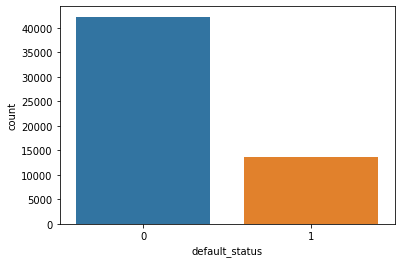

In [23]:
# Univariate Plot
# We can use countplot to explore Categorical Attribute
# Categorical attributes visualization
sns.countplot(train['default_status'])

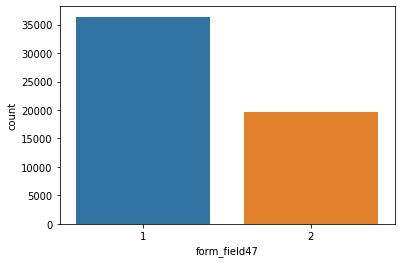

In [24]:
sns.countplot(train['form_field47'])
# 1 - Charging and 2 - Lending

In [25]:
# Calculating the Percentage of people that will not default
not_defaulters = (42285/(13715 + 42285)) * 100
print('The percentage of defaulters from the training dataset is', not_defaulters)

The percentage of defaulters from the training dataset is 75.50892857142857


In [26]:
# Calculating the Percentage of people that will default
defaulters = (13715/(13715 + 42285)) * 100
print('The percentage of defaulters from the training dataset is', defaulters)

The percentage of defaulters from the training dataset is 24.491071428571427


### Benchmarking based on the Categorical Variable Percentage

In [27]:
dummy_result = []

# Sinec there are about 24000 enteries in the testing Dataset
for i in range(1,24001):
    dummy_result.append(0)

print(len(dummy_result))
print(dummy_result[::10000])

24000
[0, 0, 0]


In [28]:
dummy_submit ={'Applicant_ID': test['Applicant_ID'], 'default_status' : dummy_result}
dummy_submit = pd.DataFrame(dummy_submit)

In [29]:
dummy_submit.head(2)

,Applicant_ID,default_status
0,Apcnt_1000032,0
1,Apcnt_1000048,0


In [30]:
# The BenchmarkFile.csv should have atleast or nothing less than 50% Accuracy
dummy_submit.to_csv('BenchmarkFile.csv', index = False)

### Exploratoratory Data Analysis (Contd)

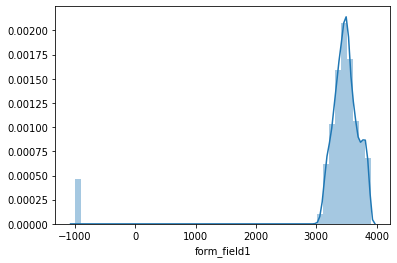

In [31]:
# Univariate Plots
# We can use distplot (Histogram) to see how the Numerical Variables are distributed
# Numerical Attribute Visualiztion
# form_field1: Customer Creditworthiness score based on historical data
sns.distplot(train['form_field1'])


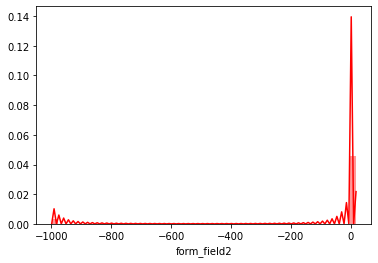

In [32]:
# form_field2: A score that measures the number and riskiness of credit enquiries made by a borrower.
sns.distplot(train['form_field2'], color = 'red')

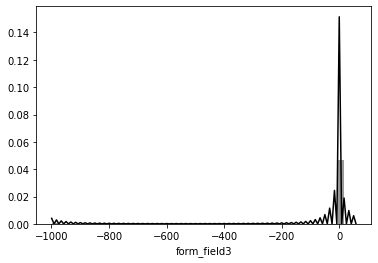

In [33]:
# form_field3: Severity of default by the borrower on any loan(s).
sns.distplot(train['form_field3'], color = 'black')

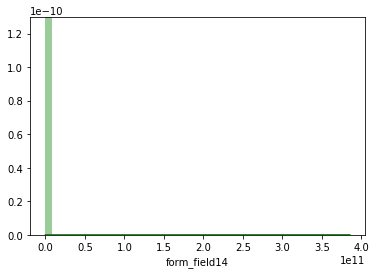

In [34]:
# form_field14: Annual income (in NGN)
sns.distplot(train['form_field14'], color = 'green')

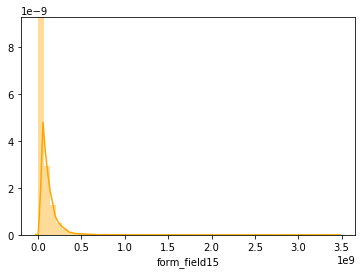

In [35]:
# form_field15: The estimated market value of a property owned/used by the borrower (in NGN)
sns.distplot(train['form_field15'], color = 'orange')

## Correlation Matrix
#### Finding correlation for numerial attribute in the Dataset

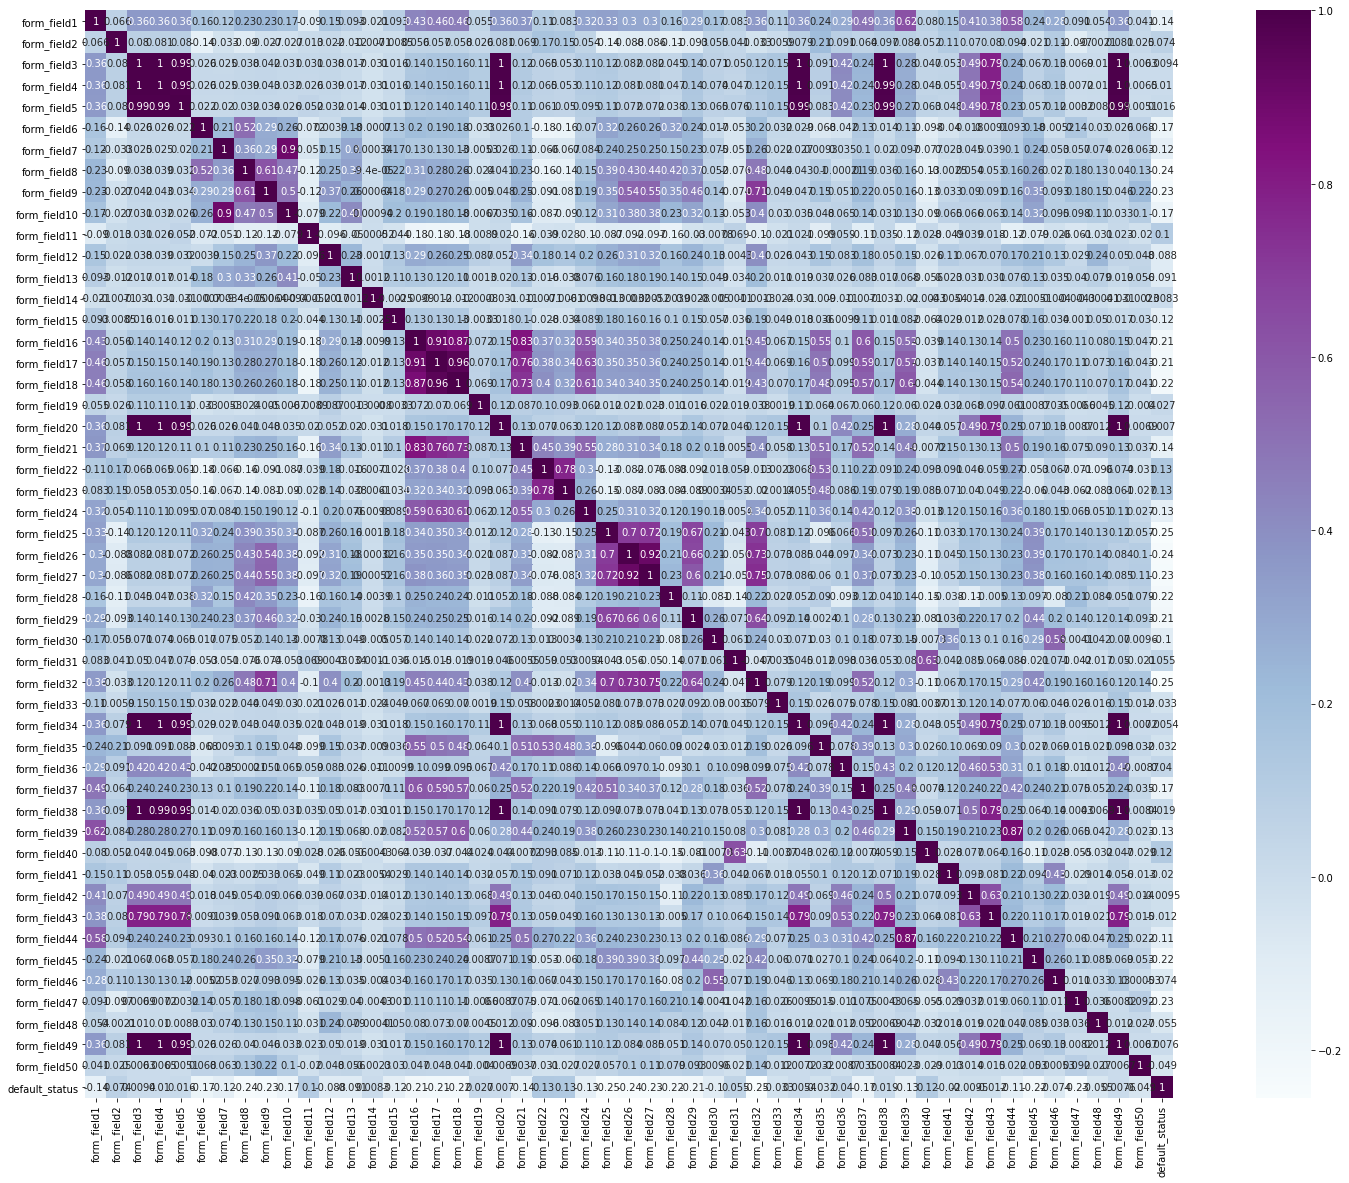

In [36]:
correlation = train.corr()
plt.figure(figsize = (30,20))
sns.heatmap(correlation, square = True, annot = True, cmap = "BuPu")

# Note that High density are ploted with Dark Colours 
# Low density with light colours


In [37]:
# Before Dropping any Column based on the inference from the Correlation heatmap, Try training with all first
train = train.drop(['Applicant_ID'], axis = 1)
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,1,-999.000000,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,-999.0,0.0,1,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,1,-999.000000,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,-999.0,0.0,1,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,1,97.887502,1.427891,0.045630,0


### Correlations
let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

0.00-0.19 “very weak”

0.20-0.39 “weak”

0.40-0.59 “moderate”

0.60-0.79 “strong”

0.80-1.0 “very strong”

In [38]:
# Find correlations with the target and sort
correlations = train.corr()['default_status'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 form_field49      0.007601
form_field14      0.008272
form_field3       0.009359
form_field4       0.009983
form_field5       0.015713
form_field38      0.019113
form_field19      0.026958
form_field36      0.040382
form_field31      0.054845
form_field2       0.073846
form_field11      0.104666
form_field40      0.118154
form_field23      0.129677
form_field22      0.134407
default_status    1.000000
Name: default_status, dtype: float64

Most Negative Correlations:
 form_field32   -0.254526
form_field25   -0.252104
form_field8    -0.238216
form_field26   -0.237164
form_field27   -0.234193
form_field9    -0.228493
form_field47   -0.227926
form_field28   -0.219221
form_field18   -0.218131
form_field45   -0.216687
form_field17   -0.213428
form_field16   -0.207761
form_field29   -0.205897
form_field6    -0.173197
form_field10   -0.169563
Name: default_status, dtype: float64


## Modelling

In [39]:
test = test.drop(['Applicant_ID'], axis = 1)
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,-999.0000,0.825000,1.01,0.800000,-999.0,0.0,charge,-999.000000,0.000000,0.011221
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,-999.000000,0.504974,0.043525
2,-999.0,0.27505,0.0600,0.0000,0.0,-999.0,-999.0,-999.0,-999.0,0.0,...,-999.0000,-999.000000,0.00,-999.000000,-999.0,-999.0,charge,-999.000000,0.000000,-999.000000
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,...,-999.0000,0.916663,2.02,0.464224,-999.0,-999.0,charge,90.163742,0.788809,0.104029
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,...,-999.0000,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [40]:
form_field47_map = {'charge' : 1, 'lending' : 2}

test['form_field47'] = test['form_field47'].map(form_field47_map)

In [41]:
test.shape

(24000, 50)

In [42]:
X = train.drop(['default_status'], axis = 1)
y = train['default_status']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2,random_state=123)

### LogisticRegression Model

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
classifier = LogisticRegression(random_state = 0)

In [50]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = classifier.predict_proba(test)[:,1]
y_pred

array([0.34853689, 0.29040871, 0.50058043, ..., 0.50053168, 0.47407572,
       0.23402092])

In [52]:
test_df = pd.read_csv('Test.csv')

In [53]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': y_pred}
results = pd.DataFrame(result)

In [54]:
results.to_csv('Logistic_Regression_Algorithm.csv', index = False)

# Application of Gradient Boosting Models
## XGBoost Model

In [55]:
import xgboost as xgb

In [56]:
model = xgb.XGBClassifier()

In [74]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
p1 = model.predict_proba(test)[:,1]
p1

array([0.25612605, 0.3620312 , 0.5250598 , ..., 0.2266391 , 0.5222988 ,
       0.07804623], dtype=float32)

In [76]:
test_df = pd.read_csv('Test.csv')

In [77]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': p1}
results = pd.DataFrame(result)

In [78]:
results.to_csv('XGBoost_Algorithm_with_No_Param.csv', index = False)

## Hyperparameter Optimization on XGBoost Model

In [62]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [63]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [64]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [104]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=5000, objective='binary:logistic',
                    silent=True, nthread=1)

In [105]:
folds = 10
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 15.7min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 30.9min finished


[04:26:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



 Time taken: 0 hours 32 minutes and 27.09 seconds.


In [106]:
print('All results: \n')
print(random_search.cv_results_)

All results: 

{'mean_fit_time': array([140.42997148, 159.86588392, 156.03776519, 123.38287153,
       138.87363808]), 'std_fit_time': array([ 5.21006369, 10.71622063,  3.79200339,  0.65709553, 17.55748858]), 'mean_score_time': array([0.1843853 , 0.30101368, 0.28252437, 0.26873329, 0.18048875]), 'std_score_time': array([0.01164773, 0.03289102, 0.04699461, 0.01899006, 0.02244558]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_val

In [107]:
print('Best estimator:\n')
print(random_search.best_estimator_)

Best estimator:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.008, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [108]:
print('Best hyperparameters:\n')
print(random_search.best_params_)

Best hyperparameters:

{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [109]:
print('Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb),'\n')
print(random_search.best_score_ * 2 - 1)

Best normalized gini score for 10-fold search with 5 parameter combinations: 

0.674886866413154


In [110]:
import xgboost as xgb

In [92]:
## Using the best Parameters
model = xgb.XGBClassifier(subsample = 1.0, min_child_weight = 5, max_depth = 3, gamma = 5, colsample_bytree= 1.0)

In [93]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
p2 = model.predict_proba(test)[:,1]
p2

array([0.31201357, 0.28741613, 0.44127482, ..., 0.33703083, 0.4423646 ,
       0.16477458], dtype=float32)

In [86]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': p2}
results = pd.DataFrame(result)

In [88]:
results.to_csv('XGBoost_Algorithm_with_RandomsearchCV', index = False)

## CATBoost Model

In [111]:
from catboost import CatBoostClassifier

In [112]:
X_train.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field47', 'form_field48',
       'form_field49', 'form_field50'],
      dtype='object')

In [113]:
features = list(X_train.columns)
cat_features = ['form_field47']

In [114]:
md = CatBoostClassifier()

In [115]:
md.fit(X_train, y_train, cat_features = cat_features)

Learning rate set to 0.052243
0:	learn: 0.6619908	total: 41ms	remaining: 41s
1:	learn: 0.6324033	total: 80.3ms	remaining: 40.1s
2:	learn: 0.6082058	total: 118ms	remaining: 39.2s
3:	learn: 0.5865464	total: 156ms	remaining: 38.9s
4:	learn: 0.5699810	total: 200ms	remaining: 39.8s
5:	learn: 0.5554138	total: 249ms	remaining: 41.3s
6:	learn: 0.5408312	total: 290ms	remaining: 41.1s
7:	learn: 0.5282248	total: 331ms	remaining: 41s
8:	learn: 0.5175029	total: 375ms	remaining: 41.3s
9:	learn: 0.5075138	total: 423ms	remaining: 41.9s
10:	learn: 0.4984694	total: 468ms	remaining: 42.1s
11:	learn: 0.4915714	total: 516ms	remaining: 42.5s
12:	learn: 0.4844725	total: 554ms	remaining: 42s
13:	learn: 0.4778612	total: 591ms	remaining: 41.6s
14:	learn: 0.4719774	total: 636ms	remaining: 41.8s
15:	learn: 0.4668370	total: 687ms	remaining: 42.2s
16:	learn: 0.4624151	total: 734ms	remaining: 42.5s
17:	learn: 0.4582502	total: 774ms	remaining: 42.2s
18:	learn: 0.4545328	total: 812ms	remaining: 41.9s
19:	learn: 0.4518

165:	learn: 0.3951211	total: 6.95s	remaining: 34.9s
166:	learn: 0.3950234	total: 7s	remaining: 34.9s
167:	learn: 0.3949082	total: 7.04s	remaining: 34.9s
168:	learn: 0.3947876	total: 7.08s	remaining: 34.8s
169:	learn: 0.3946558	total: 7.12s	remaining: 34.8s
170:	learn: 0.3945483	total: 7.17s	remaining: 34.8s
171:	learn: 0.3944728	total: 7.21s	remaining: 34.7s
172:	learn: 0.3943943	total: 7.26s	remaining: 34.7s
173:	learn: 0.3943077	total: 7.3s	remaining: 34.7s
174:	learn: 0.3942031	total: 7.34s	remaining: 34.6s
175:	learn: 0.3941068	total: 7.38s	remaining: 34.6s
176:	learn: 0.3939986	total: 7.43s	remaining: 34.5s
177:	learn: 0.3938950	total: 7.47s	remaining: 34.5s
178:	learn: 0.3937982	total: 7.5s	remaining: 34.4s
179:	learn: 0.3937217	total: 7.54s	remaining: 34.4s
180:	learn: 0.3936334	total: 7.59s	remaining: 34.3s
181:	learn: 0.3935521	total: 7.63s	remaining: 34.3s
182:	learn: 0.3934539	total: 7.68s	remaining: 34.3s
183:	learn: 0.3933714	total: 7.73s	remaining: 34.3s
184:	learn: 0.393

326:	learn: 0.3774122	total: 13.3s	remaining: 27.3s
327:	learn: 0.3774028	total: 13.3s	remaining: 27.3s
328:	learn: 0.3772882	total: 13.3s	remaining: 27.2s
329:	learn: 0.3771521	total: 13.4s	remaining: 27.2s
330:	learn: 0.3770397	total: 13.4s	remaining: 27.1s
331:	learn: 0.3769277	total: 13.5s	remaining: 27.1s
332:	learn: 0.3768245	total: 13.5s	remaining: 27.1s
333:	learn: 0.3767023	total: 13.5s	remaining: 27s
334:	learn: 0.3766184	total: 13.6s	remaining: 27s
335:	learn: 0.3764890	total: 13.6s	remaining: 26.9s
336:	learn: 0.3763926	total: 13.7s	remaining: 26.9s
337:	learn: 0.3762848	total: 13.7s	remaining: 26.8s
338:	learn: 0.3762779	total: 13.7s	remaining: 26.8s
339:	learn: 0.3761907	total: 13.8s	remaining: 26.7s
340:	learn: 0.3761077	total: 13.8s	remaining: 26.7s
341:	learn: 0.3760022	total: 13.8s	remaining: 26.6s
342:	learn: 0.3759960	total: 13.9s	remaining: 26.6s
343:	learn: 0.3759118	total: 13.9s	remaining: 26.5s
344:	learn: 0.3757682	total: 13.9s	remaining: 26.5s
345:	learn: 0.37

486:	learn: 0.3621462	total: 19.4s	remaining: 20.4s
487:	learn: 0.3621430	total: 19.4s	remaining: 20.4s
488:	learn: 0.3620224	total: 19.5s	remaining: 20.3s
489:	learn: 0.3619009	total: 19.5s	remaining: 20.3s
490:	learn: 0.3618376	total: 19.5s	remaining: 20.3s
491:	learn: 0.3617528	total: 19.6s	remaining: 20.2s
492:	learn: 0.3616665	total: 19.6s	remaining: 20.2s
493:	learn: 0.3615997	total: 19.7s	remaining: 20.1s
494:	learn: 0.3615131	total: 19.7s	remaining: 20.1s
495:	learn: 0.3614781	total: 19.8s	remaining: 20.1s
496:	learn: 0.3614115	total: 19.8s	remaining: 20s
497:	learn: 0.3613203	total: 19.8s	remaining: 20s
498:	learn: 0.3612098	total: 19.9s	remaining: 20s
499:	learn: 0.3611295	total: 19.9s	remaining: 19.9s
500:	learn: 0.3610449	total: 20s	remaining: 19.9s
501:	learn: 0.3609406	total: 20s	remaining: 19.8s
502:	learn: 0.3608173	total: 20s	remaining: 19.8s
503:	learn: 0.3607181	total: 20.1s	remaining: 19.8s
504:	learn: 0.3606098	total: 20.1s	remaining: 19.7s
505:	learn: 0.3604979	to

648:	learn: 0.3484206	total: 26s	remaining: 14.1s
649:	learn: 0.3483638	total: 26.1s	remaining: 14s
650:	learn: 0.3482957	total: 26.1s	remaining: 14s
651:	learn: 0.3482140	total: 26.1s	remaining: 13.9s
652:	learn: 0.3481166	total: 26.2s	remaining: 13.9s
653:	learn: 0.3480479	total: 26.2s	remaining: 13.9s
654:	learn: 0.3479862	total: 26.2s	remaining: 13.8s
655:	learn: 0.3479037	total: 26.3s	remaining: 13.8s
656:	learn: 0.3478281	total: 26.3s	remaining: 13.7s
657:	learn: 0.3477386	total: 26.4s	remaining: 13.7s
658:	learn: 0.3476524	total: 26.4s	remaining: 13.7s
659:	learn: 0.3475737	total: 26.4s	remaining: 13.6s
660:	learn: 0.3474856	total: 26.5s	remaining: 13.6s
661:	learn: 0.3474017	total: 26.5s	remaining: 13.5s
662:	learn: 0.3472988	total: 26.5s	remaining: 13.5s
663:	learn: 0.3471953	total: 26.6s	remaining: 13.5s
664:	learn: 0.3470926	total: 26.6s	remaining: 13.4s
665:	learn: 0.3469930	total: 26.7s	remaining: 13.4s
666:	learn: 0.3469032	total: 26.7s	remaining: 13.3s
667:	learn: 0.3467

808:	learn: 0.3358741	total: 32.2s	remaining: 7.59s
809:	learn: 0.3357964	total: 32.2s	remaining: 7.55s
810:	learn: 0.3357059	total: 32.2s	remaining: 7.51s
811:	learn: 0.3356560	total: 32.3s	remaining: 7.47s
812:	learn: 0.3355992	total: 32.3s	remaining: 7.43s
813:	learn: 0.3355121	total: 32.4s	remaining: 7.39s
814:	learn: 0.3354322	total: 32.4s	remaining: 7.35s
815:	learn: 0.3353457	total: 32.4s	remaining: 7.31s
816:	learn: 0.3352791	total: 32.5s	remaining: 7.27s
817:	learn: 0.3352101	total: 32.5s	remaining: 7.23s
818:	learn: 0.3351272	total: 32.5s	remaining: 7.19s
819:	learn: 0.3351255	total: 32.6s	remaining: 7.15s
820:	learn: 0.3350306	total: 32.6s	remaining: 7.11s
821:	learn: 0.3349389	total: 32.7s	remaining: 7.07s
822:	learn: 0.3348357	total: 32.7s	remaining: 7.03s
823:	learn: 0.3347510	total: 32.7s	remaining: 6.99s
824:	learn: 0.3346790	total: 32.8s	remaining: 6.95s
825:	learn: 0.3345949	total: 32.8s	remaining: 6.91s
826:	learn: 0.3345319	total: 32.8s	remaining: 6.87s
827:	learn: 

967:	learn: 0.3242551	total: 38.6s	remaining: 1.27s
968:	learn: 0.3241866	total: 38.6s	remaining: 1.24s
969:	learn: 0.3240931	total: 38.6s	remaining: 1.2s
970:	learn: 0.3240071	total: 38.7s	remaining: 1.16s
971:	learn: 0.3239401	total: 38.7s	remaining: 1.11s
972:	learn: 0.3238934	total: 38.8s	remaining: 1.07s
973:	learn: 0.3238378	total: 38.8s	remaining: 1.03s
974:	learn: 0.3237672	total: 38.9s	remaining: 996ms
975:	learn: 0.3237020	total: 38.9s	remaining: 956ms
976:	learn: 0.3236250	total: 38.9s	remaining: 917ms
977:	learn: 0.3235516	total: 39s	remaining: 877ms
978:	learn: 0.3234875	total: 39s	remaining: 837ms
979:	learn: 0.3234203	total: 39.1s	remaining: 798ms
980:	learn: 0.3233539	total: 39.1s	remaining: 758ms
981:	learn: 0.3232842	total: 39.2s	remaining: 718ms
982:	learn: 0.3232047	total: 39.2s	remaining: 678ms
983:	learn: 0.3231339	total: 39.2s	remaining: 638ms
984:	learn: 0.3230743	total: 39.3s	remaining: 598ms
985:	learn: 0.3230547	total: 39.3s	remaining: 558ms
986:	learn: 0.322

In [116]:
p3 = md.predict_proba(test)[:,1]
p3

array([0.32385001, 0.34538297, 0.44050696, ..., 0.25716915, 0.53940186,
       0.17188646])

In [117]:
test_df = pd.read_csv('Test.csv')

In [118]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': p3}
results = pd.DataFrame(result)

In [119]:
results.to_csv('catBoost_Algorithm.csv', index = False)

## Stratified Kfold on Catboost Model (10 fold)

In [120]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

In [121]:
X = train.drop(['default_status'], axis = 1).values
y = train['default_status'].values

In [122]:
y_prediction = []
fold_score=[]
fold = StratifiedKFold(n_splits = 10, shuffle = False, random_state = 42)

for train_index, text_index in fold.split(X,y):
    X_train, X_test = X[train_index], X[text_index]
    y_train, y_test = y[train_index], y[text_index]
    
    clf = CatBoostClassifier(n_estimators = 5000, max_depth = 7, learning_rate = 0.008, eval_metric = 'AUC', 
                             random_seed = 10, use_best_model = True)

    clf.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], 
           verbose = True, early_stopping_rounds = 100)
    
    pred= clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred)
    fold_score.append(score)
    
    prediction = clf.predict_proba(test)[:,1]
    y_prediction.append(prediction)
score = np.mean(fold_score)
print('Mean ROC score for 10 folds split:',score)    #0.8414979050136016 

0:	test: 0.8011694	test1: 0.7960352	best: 0.7960352 (0)	total: 91.6ms	remaining: 7m 37s
1:	test: 0.8169742	test1: 0.8077512	best: 0.8077512 (1)	total: 158ms	remaining: 6m 34s
2:	test: 0.8185556	test1: 0.8079666	best: 0.8079666 (2)	total: 228ms	remaining: 6m 19s
3:	test: 0.8203692	test1: 0.8097743	best: 0.8097743 (3)	total: 297ms	remaining: 6m 10s
4:	test: 0.8209120	test1: 0.8103435	best: 0.8103435 (4)	total: 391ms	remaining: 6m 30s
5:	test: 0.8221440	test1: 0.8119809	best: 0.8119809 (5)	total: 455ms	remaining: 6m 18s
6:	test: 0.8223442	test1: 0.8131324	best: 0.8131324 (6)	total: 532ms	remaining: 6m 19s
7:	test: 0.8223184	test1: 0.8129969	best: 0.8131324 (6)	total: 610ms	remaining: 6m 20s
8:	test: 0.8234454	test1: 0.8140534	best: 0.8140534 (8)	total: 675ms	remaining: 6m 14s
9:	test: 0.8232128	test1: 0.8133009	best: 0.8140534 (8)	total: 752ms	remaining: 6m 15s
10:	test: 0.8241037	test1: 0.8134240	best: 0.8140534 (8)	total: 835ms	remaining: 6m 18s
11:	test: 0.8238026	test1: 0.8137366	best

93:	test: 0.8308534	test1: 0.8177840	best: 0.8178469 (90)	total: 7.35s	remaining: 6m 23s
94:	test: 0.8309368	test1: 0.8178444	best: 0.8178469 (90)	total: 7.42s	remaining: 6m 23s
95:	test: 0.8309903	test1: 0.8179061	best: 0.8179061 (95)	total: 7.48s	remaining: 6m 22s
96:	test: 0.8310447	test1: 0.8179527	best: 0.8179527 (96)	total: 7.55s	remaining: 6m 21s
97:	test: 0.8311188	test1: 0.8180065	best: 0.8180065 (97)	total: 7.63s	remaining: 6m 21s
98:	test: 0.8311928	test1: 0.8180541	best: 0.8180541 (98)	total: 7.71s	remaining: 6m 21s
99:	test: 0.8313365	test1: 0.8181005	best: 0.8181005 (99)	total: 7.78s	remaining: 6m 21s
100:	test: 0.8313485	test1: 0.8180915	best: 0.8181005 (99)	total: 7.87s	remaining: 6m 21s
101:	test: 0.8314880	test1: 0.8181614	best: 0.8181614 (101)	total: 7.93s	remaining: 6m 21s
102:	test: 0.8315961	test1: 0.8182441	best: 0.8182441 (102)	total: 8s	remaining: 6m 20s
103:	test: 0.8317207	test1: 0.8182597	best: 0.8182597 (103)	total: 8.08s	remaining: 6m 20s
104:	test: 0.8318

184:	test: 0.8360675	test1: 0.8211233	best: 0.8211324 (183)	total: 13.9s	remaining: 6m 2s
185:	test: 0.8360963	test1: 0.8211390	best: 0.8211390 (185)	total: 14s	remaining: 6m 2s
186:	test: 0.8361499	test1: 0.8212007	best: 0.8212007 (186)	total: 14.1s	remaining: 6m 2s
187:	test: 0.8361867	test1: 0.8212393	best: 0.8212393 (187)	total: 14.1s	remaining: 6m 2s
188:	test: 0.8362492	test1: 0.8212514	best: 0.8212514 (188)	total: 14.2s	remaining: 6m 1s
189:	test: 0.8363126	test1: 0.8212990	best: 0.8212990 (189)	total: 14.3s	remaining: 6m 1s
190:	test: 0.8363353	test1: 0.8213556	best: 0.8213556 (190)	total: 14.3s	remaining: 6m 1s
191:	test: 0.8363841	test1: 0.8213927	best: 0.8213927 (191)	total: 14.4s	remaining: 6m 1s
192:	test: 0.8364136	test1: 0.8213935	best: 0.8213935 (192)	total: 14.5s	remaining: 6m
193:	test: 0.8364666	test1: 0.8214149	best: 0.8214149 (193)	total: 14.6s	remaining: 6m
194:	test: 0.8364973	test1: 0.8214361	best: 0.8214361 (194)	total: 14.6s	remaining: 6m
195:	test: 0.8365352	

276:	test: 0.8395392	test1: 0.8231464	best: 0.8231464 (276)	total: 20.9s	remaining: 5m 56s
277:	test: 0.8395733	test1: 0.8231698	best: 0.8231698 (277)	total: 21s	remaining: 5m 56s
278:	test: 0.8396126	test1: 0.8231945	best: 0.8231945 (278)	total: 21.1s	remaining: 5m 56s
279:	test: 0.8396503	test1: 0.8232180	best: 0.8232180 (279)	total: 21.1s	remaining: 5m 56s
280:	test: 0.8396814	test1: 0.8232494	best: 0.8232494 (280)	total: 21.2s	remaining: 5m 56s
281:	test: 0.8397012	test1: 0.8232311	best: 0.8232494 (280)	total: 21.3s	remaining: 5m 56s
282:	test: 0.8397297	test1: 0.8232625	best: 0.8232625 (282)	total: 21.4s	remaining: 5m 55s
283:	test: 0.8397575	test1: 0.8232792	best: 0.8232792 (283)	total: 21.4s	remaining: 5m 55s
284:	test: 0.8397790	test1: 0.8232997	best: 0.8232997 (284)	total: 21.5s	remaining: 5m 55s
285:	test: 0.8398249	test1: 0.8233077	best: 0.8233077 (285)	total: 21.6s	remaining: 5m 56s
286:	test: 0.8398577	test1: 0.8233109	best: 0.8233109 (286)	total: 21.7s	remaining: 5m 56s
2

369:	test: 0.8423961	test1: 0.8247582	best: 0.8247582 (369)	total: 27.7s	remaining: 5m 46s
370:	test: 0.8424291	test1: 0.8247626	best: 0.8247626 (370)	total: 27.8s	remaining: 5m 46s
371:	test: 0.8424536	test1: 0.8247878	best: 0.8247878 (371)	total: 27.9s	remaining: 5m 46s
372:	test: 0.8424827	test1: 0.8247823	best: 0.8247878 (371)	total: 27.9s	remaining: 5m 46s
373:	test: 0.8425086	test1: 0.8247913	best: 0.8247913 (373)	total: 28s	remaining: 5m 46s
374:	test: 0.8425314	test1: 0.8248127	best: 0.8248127 (374)	total: 28.1s	remaining: 5m 45s
375:	test: 0.8425510	test1: 0.8248056	best: 0.8248127 (374)	total: 28.1s	remaining: 5m 45s
376:	test: 0.8425771	test1: 0.8248232	best: 0.8248232 (376)	total: 28.2s	remaining: 5m 45s
377:	test: 0.8425968	test1: 0.8248610	best: 0.8248610 (377)	total: 28.3s	remaining: 5m 45s
378:	test: 0.8426160	test1: 0.8248539	best: 0.8248610 (377)	total: 28.4s	remaining: 5m 45s
379:	test: 0.8426539	test1: 0.8248589	best: 0.8248610 (377)	total: 28.4s	remaining: 5m 45s
3

461:	test: 0.8447873	test1: 0.8258454	best: 0.8258454 (461)	total: 34.5s	remaining: 5m 38s
462:	test: 0.8448140	test1: 0.8258679	best: 0.8258679 (462)	total: 34.6s	remaining: 5m 38s
463:	test: 0.8448473	test1: 0.8258644	best: 0.8258679 (462)	total: 34.6s	remaining: 5m 38s
464:	test: 0.8448619	test1: 0.8258604	best: 0.8258679 (462)	total: 34.7s	remaining: 5m 38s
465:	test: 0.8448793	test1: 0.8258825	best: 0.8258825 (465)	total: 34.8s	remaining: 5m 38s
466:	test: 0.8449221	test1: 0.8259039	best: 0.8259039 (466)	total: 34.9s	remaining: 5m 38s
467:	test: 0.8449360	test1: 0.8259024	best: 0.8259039 (466)	total: 34.9s	remaining: 5m 38s
468:	test: 0.8449591	test1: 0.8259175	best: 0.8259175 (468)	total: 35s	remaining: 5m 38s
469:	test: 0.8449812	test1: 0.8259315	best: 0.8259315 (469)	total: 35.1s	remaining: 5m 38s
470:	test: 0.8450032	test1: 0.8259419	best: 0.8259419 (470)	total: 35.2s	remaining: 5m 38s
471:	test: 0.8450384	test1: 0.8259460	best: 0.8259460 (471)	total: 35.3s	remaining: 5m 38s
4

554:	test: 0.8470115	test1: 0.8268056	best: 0.8268056 (554)	total: 41.3s	remaining: 5m 30s
555:	test: 0.8470244	test1: 0.8267996	best: 0.8268056 (554)	total: 41.3s	remaining: 5m 30s
556:	test: 0.8470361	test1: 0.8268149	best: 0.8268149 (556)	total: 41.4s	remaining: 5m 30s
557:	test: 0.8470602	test1: 0.8268179	best: 0.8268179 (557)	total: 41.5s	remaining: 5m 30s
558:	test: 0.8470826	test1: 0.8268239	best: 0.8268239 (558)	total: 41.6s	remaining: 5m 30s
559:	test: 0.8471101	test1: 0.8268484	best: 0.8268484 (559)	total: 41.6s	remaining: 5m 30s
560:	test: 0.8471303	test1: 0.8268537	best: 0.8268537 (560)	total: 41.7s	remaining: 5m 29s
561:	test: 0.8471505	test1: 0.8268629	best: 0.8268629 (561)	total: 41.8s	remaining: 5m 29s
562:	test: 0.8471605	test1: 0.8268756	best: 0.8268756 (562)	total: 41.8s	remaining: 5m 29s
563:	test: 0.8471778	test1: 0.8268761	best: 0.8268761 (563)	total: 41.9s	remaining: 5m 29s
564:	test: 0.8471974	test1: 0.8268844	best: 0.8268844 (564)	total: 42s	remaining: 5m 29s
5

645:	test: 0.8492148	test1: 0.8276331	best: 0.8276331 (645)	total: 48s	remaining: 5m 23s
646:	test: 0.8492333	test1: 0.8276457	best: 0.8276457 (646)	total: 48.1s	remaining: 5m 23s
647:	test: 0.8492694	test1: 0.8276609	best: 0.8276609 (647)	total: 48.2s	remaining: 5m 23s
648:	test: 0.8492901	test1: 0.8276512	best: 0.8276609 (647)	total: 48.2s	remaining: 5m 23s
649:	test: 0.8493075	test1: 0.8276564	best: 0.8276609 (647)	total: 48.3s	remaining: 5m 23s
650:	test: 0.8493440	test1: 0.8276602	best: 0.8276609 (647)	total: 48.4s	remaining: 5m 23s
651:	test: 0.8493676	test1: 0.8276654	best: 0.8276654 (651)	total: 48.4s	remaining: 5m 23s
652:	test: 0.8493854	test1: 0.8276676	best: 0.8276676 (652)	total: 48.5s	remaining: 5m 22s
653:	test: 0.8493991	test1: 0.8276578	best: 0.8276676 (652)	total: 48.6s	remaining: 5m 22s
654:	test: 0.8494225	test1: 0.8276609	best: 0.8276676 (652)	total: 48.7s	remaining: 5m 22s
655:	test: 0.8494374	test1: 0.8276721	best: 0.8276721 (655)	total: 48.7s	remaining: 5m 22s
6

737:	test: 0.8512522	test1: 0.8283132	best: 0.8283132 (737)	total: 54.7s	remaining: 5m 15s
738:	test: 0.8512743	test1: 0.8283284	best: 0.8283284 (738)	total: 54.8s	remaining: 5m 15s
739:	test: 0.8512939	test1: 0.8283282	best: 0.8283284 (738)	total: 54.8s	remaining: 5m 15s
740:	test: 0.8513115	test1: 0.8283451	best: 0.8283451 (740)	total: 54.9s	remaining: 5m 15s
741:	test: 0.8513257	test1: 0.8283486	best: 0.8283486 (741)	total: 55s	remaining: 5m 15s
742:	test: 0.8513322	test1: 0.8283453	best: 0.8283486 (741)	total: 55s	remaining: 5m 15s
743:	test: 0.8513503	test1: 0.8283493	best: 0.8283493 (743)	total: 55.1s	remaining: 5m 15s
744:	test: 0.8513637	test1: 0.8283558	best: 0.8283558 (744)	total: 55.2s	remaining: 5m 15s
745:	test: 0.8513852	test1: 0.8283687	best: 0.8283687 (745)	total: 55.2s	remaining: 5m 14s
746:	test: 0.8513992	test1: 0.8283765	best: 0.8283765 (746)	total: 55.3s	remaining: 5m 14s
747:	test: 0.8514125	test1: 0.8283760	best: 0.8283765 (746)	total: 55.4s	remaining: 5m 14s
748

830:	test: 0.8530167	test1: 0.8288170	best: 0.8288170 (830)	total: 1m 1s	remaining: 5m 7s
831:	test: 0.8530401	test1: 0.8288382	best: 0.8288382 (831)	total: 1m 1s	remaining: 5m 7s
832:	test: 0.8530501	test1: 0.8288401	best: 0.8288401 (832)	total: 1m 1s	remaining: 5m 7s
833:	test: 0.8530633	test1: 0.8288525	best: 0.8288525 (833)	total: 1m 1s	remaining: 5m 7s
834:	test: 0.8530826	test1: 0.8288591	best: 0.8288591 (834)	total: 1m 1s	remaining: 5m 7s
835:	test: 0.8531018	test1: 0.8288524	best: 0.8288591 (834)	total: 1m 1s	remaining: 5m 7s
836:	test: 0.8531305	test1: 0.8288599	best: 0.8288599 (836)	total: 1m 1s	remaining: 5m 6s
837:	test: 0.8531458	test1: 0.8288627	best: 0.8288627 (837)	total: 1m 1s	remaining: 5m 6s
838:	test: 0.8531550	test1: 0.8288655	best: 0.8288655 (838)	total: 1m 1s	remaining: 5m 6s
839:	test: 0.8531671	test1: 0.8288703	best: 0.8288703 (839)	total: 1m 1s	remaining: 5m 6s
840:	test: 0.8531990	test1: 0.8288827	best: 0.8288827 (840)	total: 1m 1s	remaining: 5m 6s
841:	test:

923:	test: 0.8547379	test1: 0.8292175	best: 0.8292202 (917)	total: 1m 8s	remaining: 5m 1s
924:	test: 0.8547553	test1: 0.8292147	best: 0.8292202 (917)	total: 1m 8s	remaining: 5m 1s
925:	test: 0.8547708	test1: 0.8292228	best: 0.8292228 (925)	total: 1m 8s	remaining: 5m 1s
926:	test: 0.8547877	test1: 0.8292280	best: 0.8292280 (926)	total: 1m 8s	remaining: 5m 1s
927:	test: 0.8548087	test1: 0.8292311	best: 0.8292311 (927)	total: 1m 8s	remaining: 5m
928:	test: 0.8548269	test1: 0.8292447	best: 0.8292447 (928)	total: 1m 8s	remaining: 5m
929:	test: 0.8548601	test1: 0.8292577	best: 0.8292577 (929)	total: 1m 8s	remaining: 5m
930:	test: 0.8548685	test1: 0.8292597	best: 0.8292597 (930)	total: 1m 8s	remaining: 5m
931:	test: 0.8548895	test1: 0.8292589	best: 0.8292597 (930)	total: 1m 8s	remaining: 5m
932:	test: 0.8549018	test1: 0.8292508	best: 0.8292597 (930)	total: 1m 9s	remaining: 5m
933:	test: 0.8549138	test1: 0.8292578	best: 0.8292597 (930)	total: 1m 9s	remaining: 5m
934:	test: 0.8549317	test1: 0.8

1015:	test: 0.8564164	test1: 0.8296407	best: 0.8296407 (1015)	total: 1m 14s	remaining: 4m 52s
1016:	test: 0.8564228	test1: 0.8296475	best: 0.8296475 (1016)	total: 1m 14s	remaining: 4m 52s
1017:	test: 0.8564422	test1: 0.8296440	best: 0.8296475 (1016)	total: 1m 14s	remaining: 4m 52s
1018:	test: 0.8564756	test1: 0.8296533	best: 0.8296533 (1018)	total: 1m 14s	remaining: 4m 52s
1019:	test: 0.8564850	test1: 0.8296592	best: 0.8296592 (1019)	total: 1m 14s	remaining: 4m 52s
1020:	test: 0.8564946	test1: 0.8296637	best: 0.8296637 (1020)	total: 1m 15s	remaining: 4m 52s
1021:	test: 0.8565162	test1: 0.8296735	best: 0.8296735 (1021)	total: 1m 15s	remaining: 4m 52s
1022:	test: 0.8565311	test1: 0.8296770	best: 0.8296770 (1022)	total: 1m 15s	remaining: 4m 52s
1023:	test: 0.8565544	test1: 0.8296856	best: 0.8296856 (1023)	total: 1m 15s	remaining: 4m 52s
1024:	test: 0.8565725	test1: 0.8296913	best: 0.8296913 (1024)	total: 1m 15s	remaining: 4m 51s
1025:	test: 0.8565845	test1: 0.8297047	best: 0.8297047 (1025

1105:	test: 0.8580281	test1: 0.8300233	best: 0.8300233 (1105)	total: 1m 20s	remaining: 4m 45s
1106:	test: 0.8580526	test1: 0.8300373	best: 0.8300373 (1106)	total: 1m 21s	remaining: 4m 45s
1107:	test: 0.8580657	test1: 0.8300385	best: 0.8300385 (1107)	total: 1m 21s	remaining: 4m 44s
1108:	test: 0.8580808	test1: 0.8300469	best: 0.8300469 (1108)	total: 1m 21s	remaining: 4m 44s
1109:	test: 0.8580898	test1: 0.8300378	best: 0.8300469 (1108)	total: 1m 21s	remaining: 4m 44s
1110:	test: 0.8581087	test1: 0.8300480	best: 0.8300480 (1110)	total: 1m 21s	remaining: 4m 44s
1111:	test: 0.8581237	test1: 0.8300471	best: 0.8300480 (1110)	total: 1m 21s	remaining: 4m 44s
1112:	test: 0.8581335	test1: 0.8300543	best: 0.8300543 (1112)	total: 1m 21s	remaining: 4m 44s
1113:	test: 0.8581488	test1: 0.8300545	best: 0.8300545 (1113)	total: 1m 21s	remaining: 4m 44s
1114:	test: 0.8581666	test1: 0.8300612	best: 0.8300612 (1114)	total: 1m 21s	remaining: 4m 44s
1115:	test: 0.8581854	test1: 0.8300681	best: 0.8300681 (1115

1196:	test: 0.8596117	test1: 0.8303258	best: 0.8303258 (1196)	total: 1m 27s	remaining: 4m 37s
1197:	test: 0.8596208	test1: 0.8303293	best: 0.8303293 (1197)	total: 1m 27s	remaining: 4m 37s
1198:	test: 0.8596419	test1: 0.8303293	best: 0.8303293 (1197)	total: 1m 27s	remaining: 4m 36s
1199:	test: 0.8596730	test1: 0.8303313	best: 0.8303313 (1199)	total: 1m 27s	remaining: 4m 36s
1200:	test: 0.8596893	test1: 0.8303336	best: 0.8303336 (1200)	total: 1m 27s	remaining: 4m 36s
1201:	test: 0.8597083	test1: 0.8303379	best: 0.8303379 (1201)	total: 1m 27s	remaining: 4m 36s
1202:	test: 0.8597264	test1: 0.8303534	best: 0.8303534 (1202)	total: 1m 27s	remaining: 4m 36s
1203:	test: 0.8597541	test1: 0.8303724	best: 0.8303724 (1203)	total: 1m 27s	remaining: 4m 36s
1204:	test: 0.8597707	test1: 0.8303748	best: 0.8303748 (1204)	total: 1m 27s	remaining: 4m 36s
1205:	test: 0.8597888	test1: 0.8303808	best: 0.8303808 (1205)	total: 1m 27s	remaining: 4m 36s
1206:	test: 0.8598066	test1: 0.8303924	best: 0.8303924 (1206

1285:	test: 0.8611693	test1: 0.8306873	best: 0.8306925 (1281)	total: 1m 33s	remaining: 4m 29s
1286:	test: 0.8611786	test1: 0.8306849	best: 0.8306925 (1281)	total: 1m 33s	remaining: 4m 28s
1287:	test: 0.8611944	test1: 0.8306915	best: 0.8306925 (1281)	total: 1m 33s	remaining: 4m 28s
1288:	test: 0.8612030	test1: 0.8306851	best: 0.8306925 (1281)	total: 1m 33s	remaining: 4m 28s
1289:	test: 0.8612132	test1: 0.8306965	best: 0.8306965 (1289)	total: 1m 33s	remaining: 4m 28s
1290:	test: 0.8612275	test1: 0.8307018	best: 0.8307018 (1290)	total: 1m 33s	remaining: 4m 28s
1291:	test: 0.8612505	test1: 0.8307216	best: 0.8307216 (1291)	total: 1m 33s	remaining: 4m 28s
1292:	test: 0.8612734	test1: 0.8307204	best: 0.8307216 (1291)	total: 1m 33s	remaining: 4m 28s
1293:	test: 0.8612841	test1: 0.8307197	best: 0.8307216 (1291)	total: 1m 33s	remaining: 4m 28s
1294:	test: 0.8613010	test1: 0.8307289	best: 0.8307289 (1294)	total: 1m 33s	remaining: 4m 28s
1295:	test: 0.8613205	test1: 0.8307278	best: 0.8307289 (1294

1376:	test: 0.8627747	test1: 0.8309012	best: 0.8309329 (1368)	total: 1m 39s	remaining: 4m 22s
1377:	test: 0.8627898	test1: 0.8309072	best: 0.8309329 (1368)	total: 1m 39s	remaining: 4m 22s
1378:	test: 0.8628067	test1: 0.8309127	best: 0.8309329 (1368)	total: 1m 39s	remaining: 4m 21s
1379:	test: 0.8628173	test1: 0.8309141	best: 0.8309329 (1368)	total: 1m 39s	remaining: 4m 21s
1380:	test: 0.8628398	test1: 0.8309122	best: 0.8309329 (1368)	total: 1m 39s	remaining: 4m 21s
1381:	test: 0.8628570	test1: 0.8309141	best: 0.8309329 (1368)	total: 1m 40s	remaining: 4m 21s
1382:	test: 0.8628711	test1: 0.8309174	best: 0.8309329 (1368)	total: 1m 40s	remaining: 4m 21s
1383:	test: 0.8629002	test1: 0.8309038	best: 0.8309329 (1368)	total: 1m 40s	remaining: 4m 21s
1384:	test: 0.8629144	test1: 0.8309036	best: 0.8309329 (1368)	total: 1m 40s	remaining: 4m 21s
1385:	test: 0.8629304	test1: 0.8308762	best: 0.8309329 (1368)	total: 1m 40s	remaining: 4m 21s
1386:	test: 0.8629413	test1: 0.8308686	best: 0.8309329 (1368

1464:	test: 0.8643283	test1: 0.8311247	best: 0.8311247 (1464)	total: 1m 45s	remaining: 4m 14s
1465:	test: 0.8643376	test1: 0.8311318	best: 0.8311318 (1465)	total: 1m 45s	remaining: 4m 14s
1466:	test: 0.8643596	test1: 0.8311370	best: 0.8311370 (1466)	total: 1m 45s	remaining: 4m 14s
1467:	test: 0.8643659	test1: 0.8311342	best: 0.8311370 (1466)	total: 1m 45s	remaining: 4m 14s
1468:	test: 0.8643844	test1: 0.8311299	best: 0.8311370 (1466)	total: 1m 45s	remaining: 4m 14s
1469:	test: 0.8644070	test1: 0.8311421	best: 0.8311421 (1469)	total: 1m 45s	remaining: 4m 14s
1470:	test: 0.8644208	test1: 0.8311482	best: 0.8311482 (1470)	total: 1m 45s	remaining: 4m 13s
1471:	test: 0.8644387	test1: 0.8311397	best: 0.8311482 (1470)	total: 1m 45s	remaining: 4m 13s
1472:	test: 0.8644561	test1: 0.8311468	best: 0.8311482 (1470)	total: 1m 46s	remaining: 4m 13s
1473:	test: 0.8644780	test1: 0.8311492	best: 0.8311492 (1473)	total: 1m 46s	remaining: 4m 13s
1474:	test: 0.8645010	test1: 0.8311690	best: 0.8311690 (1474

1554:	test: 0.8659390	test1: 0.8314077	best: 0.8314077 (1554)	total: 1m 51s	remaining: 4m 6s
1555:	test: 0.8659609	test1: 0.8314124	best: 0.8314124 (1555)	total: 1m 51s	remaining: 4m 6s
1556:	test: 0.8659856	test1: 0.8314071	best: 0.8314124 (1555)	total: 1m 51s	remaining: 4m 6s
1557:	test: 0.8660086	test1: 0.8314248	best: 0.8314248 (1557)	total: 1m 51s	remaining: 4m 6s
1558:	test: 0.8660166	test1: 0.8314172	best: 0.8314248 (1557)	total: 1m 51s	remaining: 4m 6s
1559:	test: 0.8660401	test1: 0.8314214	best: 0.8314248 (1557)	total: 1m 51s	remaining: 4m 6s
1560:	test: 0.8660532	test1: 0.8314238	best: 0.8314248 (1557)	total: 1m 51s	remaining: 4m 6s
1561:	test: 0.8660686	test1: 0.8314241	best: 0.8314248 (1557)	total: 1m 51s	remaining: 4m 6s
1562:	test: 0.8660761	test1: 0.8314290	best: 0.8314290 (1562)	total: 1m 52s	remaining: 4m 6s
1563:	test: 0.8660829	test1: 0.8314336	best: 0.8314336 (1563)	total: 1m 52s	remaining: 4m 6s
1564:	test: 0.8661061	test1: 0.8314334	best: 0.8314336 (1563)	total: 1

1643:	test: 0.8674513	test1: 0.8316580	best: 0.8316684 (1641)	total: 1m 57s	remaining: 4m
1644:	test: 0.8674641	test1: 0.8316594	best: 0.8316684 (1641)	total: 1m 57s	remaining: 3m 59s
1645:	test: 0.8674843	test1: 0.8316597	best: 0.8316684 (1641)	total: 1m 57s	remaining: 3m 59s
1646:	test: 0.8675031	test1: 0.8316592	best: 0.8316684 (1641)	total: 1m 57s	remaining: 3m 59s
1647:	test: 0.8675215	test1: 0.8316620	best: 0.8316684 (1641)	total: 1m 57s	remaining: 3m 59s
1648:	test: 0.8675374	test1: 0.8316725	best: 0.8316725 (1648)	total: 1m 57s	remaining: 3m 59s
1649:	test: 0.8675636	test1: 0.8316659	best: 0.8316725 (1648)	total: 1m 57s	remaining: 3m 59s
1650:	test: 0.8675919	test1: 0.8316721	best: 0.8316725 (1648)	total: 1m 58s	remaining: 3m 59s
1651:	test: 0.8676120	test1: 0.8316830	best: 0.8316830 (1651)	total: 1m 58s	remaining: 3m 59s
1652:	test: 0.8676290	test1: 0.8316996	best: 0.8316996 (1652)	total: 1m 58s	remaining: 3m 59s
1653:	test: 0.8676454	test1: 0.8316947	best: 0.8316996 (1652)	to

1733:	test: 0.8690599	test1: 0.8318524	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 52s
1734:	test: 0.8690657	test1: 0.8318431	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 52s
1735:	test: 0.8690867	test1: 0.8318394	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 52s
1736:	test: 0.8691060	test1: 0.8318174	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 52s
1737:	test: 0.8691240	test1: 0.8318194	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 52s
1738:	test: 0.8691299	test1: 0.8318263	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 52s
1739:	test: 0.8691532	test1: 0.8318239	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 52s
1740:	test: 0.8691748	test1: 0.8318220	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 51s
1741:	test: 0.8691920	test1: 0.8318225	best: 0.8318524 (1733)	total: 2m 3s	remaining: 3m 51s
1742:	test: 0.8691945	test1: 0.8318206	best: 0.8318524 (1733)	total: 2m 4s	remaining: 3m 51s
1743:	test: 0.8692177	test1: 0.8318231	best: 0.8318524 (1733)	total: 2

1823:	test: 0.8705450	test1: 0.8319545	best: 0.8319774 (1815)	total: 2m 9s	remaining: 3m 45s
1824:	test: 0.8705719	test1: 0.8319600	best: 0.8319774 (1815)	total: 2m 9s	remaining: 3m 45s
1825:	test: 0.8705983	test1: 0.8319600	best: 0.8319774 (1815)	total: 2m 9s	remaining: 3m 45s
1826:	test: 0.8706102	test1: 0.8319535	best: 0.8319774 (1815)	total: 2m 9s	remaining: 3m 45s
1827:	test: 0.8706279	test1: 0.8319481	best: 0.8319774 (1815)	total: 2m 9s	remaining: 3m 45s
1828:	test: 0.8706514	test1: 0.8319450	best: 0.8319774 (1815)	total: 2m 10s	remaining: 3m 45s
1829:	test: 0.8706687	test1: 0.8319488	best: 0.8319774 (1815)	total: 2m 10s	remaining: 3m 45s
1830:	test: 0.8706858	test1: 0.8319517	best: 0.8319774 (1815)	total: 2m 10s	remaining: 3m 45s
1831:	test: 0.8707061	test1: 0.8319612	best: 0.8319774 (1815)	total: 2m 10s	remaining: 3m 45s
1832:	test: 0.8707254	test1: 0.8319619	best: 0.8319774 (1815)	total: 2m 10s	remaining: 3m 45s
1833:	test: 0.8707497	test1: 0.8319735	best: 0.8319774 (1815)	tot

1911:	test: 0.8722281	test1: 0.8320890	best: 0.8320959 (1895)	total: 2m 15s	remaining: 3m 39s
1912:	test: 0.8722488	test1: 0.8320947	best: 0.8320959 (1895)	total: 2m 15s	remaining: 3m 39s
1913:	test: 0.8722727	test1: 0.8321044	best: 0.8321044 (1913)	total: 2m 15s	remaining: 3m 39s
1914:	test: 0.8722917	test1: 0.8321121	best: 0.8321121 (1914)	total: 2m 16s	remaining: 3m 39s
1915:	test: 0.8723017	test1: 0.8321182	best: 0.8321182 (1915)	total: 2m 16s	remaining: 3m 39s
1916:	test: 0.8723262	test1: 0.8321280	best: 0.8321280 (1916)	total: 2m 16s	remaining: 3m 39s
1917:	test: 0.8723452	test1: 0.8321194	best: 0.8321280 (1916)	total: 2m 16s	remaining: 3m 39s
1918:	test: 0.8723730	test1: 0.8321159	best: 0.8321280 (1916)	total: 2m 16s	remaining: 3m 38s
1919:	test: 0.8723857	test1: 0.8321208	best: 0.8321280 (1916)	total: 2m 16s	remaining: 3m 38s
1920:	test: 0.8723998	test1: 0.8321192	best: 0.8321280 (1916)	total: 2m 16s	remaining: 3m 38s
1921:	test: 0.8724164	test1: 0.8321166	best: 0.8321280 (1916

2001:	test: 0.8738851	test1: 0.8322387	best: 0.8322548 (1994)	total: 2m 22s	remaining: 3m 33s
2002:	test: 0.8738988	test1: 0.8322458	best: 0.8322548 (1994)	total: 2m 22s	remaining: 3m 33s
2003:	test: 0.8739214	test1: 0.8322536	best: 0.8322548 (1994)	total: 2m 22s	remaining: 3m 33s
2004:	test: 0.8739337	test1: 0.8322467	best: 0.8322548 (1994)	total: 2m 22s	remaining: 3m 33s
2005:	test: 0.8739562	test1: 0.8322415	best: 0.8322548 (1994)	total: 2m 22s	remaining: 3m 33s
2006:	test: 0.8739612	test1: 0.8322367	best: 0.8322548 (1994)	total: 2m 22s	remaining: 3m 33s
2007:	test: 0.8739705	test1: 0.8322332	best: 0.8322548 (1994)	total: 2m 22s	remaining: 3m 32s
2008:	test: 0.8739871	test1: 0.8322153	best: 0.8322548 (1994)	total: 2m 23s	remaining: 3m 32s
2009:	test: 0.8740085	test1: 0.8322318	best: 0.8322548 (1994)	total: 2m 23s	remaining: 3m 32s
2010:	test: 0.8740239	test1: 0.8322318	best: 0.8322548 (1994)	total: 2m 23s	remaining: 3m 32s
2011:	test: 0.8740397	test1: 0.8322204	best: 0.8322548 (1994

2089:	test: 0.8753593	test1: 0.8323326	best: 0.8323520 (2062)	total: 2m 28s	remaining: 3m 27s
2090:	test: 0.8753778	test1: 0.8323405	best: 0.8323520 (2062)	total: 2m 28s	remaining: 3m 27s
2091:	test: 0.8753935	test1: 0.8323401	best: 0.8323520 (2062)	total: 2m 28s	remaining: 3m 27s
2092:	test: 0.8754022	test1: 0.8323298	best: 0.8323520 (2062)	total: 2m 28s	remaining: 3m 26s
2093:	test: 0.8754274	test1: 0.8323188	best: 0.8323520 (2062)	total: 2m 29s	remaining: 3m 26s
2094:	test: 0.8754537	test1: 0.8323369	best: 0.8323520 (2062)	total: 2m 29s	remaining: 3m 26s
2095:	test: 0.8754673	test1: 0.8323389	best: 0.8323520 (2062)	total: 2m 29s	remaining: 3m 26s
2096:	test: 0.8754798	test1: 0.8323413	best: 0.8323520 (2062)	total: 2m 29s	remaining: 3m 26s
2097:	test: 0.8754959	test1: 0.8323465	best: 0.8323520 (2062)	total: 2m 29s	remaining: 3m 26s
2098:	test: 0.8755035	test1: 0.8323543	best: 0.8323543 (2098)	total: 2m 29s	remaining: 3m 26s
2099:	test: 0.8755043	test1: 0.8323541	best: 0.8323543 (2098

2179:	test: 0.8767401	test1: 0.8323670	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2180:	test: 0.8767577	test1: 0.8323698	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2181:	test: 0.8767756	test1: 0.8323715	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2182:	test: 0.8767909	test1: 0.8323717	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2183:	test: 0.8768012	test1: 0.8323779	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2184:	test: 0.8768240	test1: 0.8323822	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2185:	test: 0.8768410	test1: 0.8323729	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2186:	test: 0.8768546	test1: 0.8323843	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2187:	test: 0.8768720	test1: 0.8323719	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2188:	test: 0.8768942	test1: 0.8323758	best: 0.8324165 (2132)	total: 2m 35s	remaining: 3m 20s
2189:	test: 0.8769146	test1: 0.8323764	best: 0.8324165 (2132

2268:	test: 0.8782135	test1: 0.8324709	best: 0.8324709 (2268)	total: 2m 42s	remaining: 3m 15s
2269:	test: 0.8782340	test1: 0.8324759	best: 0.8324759 (2269)	total: 2m 42s	remaining: 3m 15s
2270:	test: 0.8782549	test1: 0.8324773	best: 0.8324773 (2270)	total: 2m 42s	remaining: 3m 15s
2271:	test: 0.8782692	test1: 0.8324624	best: 0.8324773 (2270)	total: 2m 42s	remaining: 3m 14s
2272:	test: 0.8782811	test1: 0.8324564	best: 0.8324773 (2270)	total: 2m 42s	remaining: 3m 14s
2273:	test: 0.8782997	test1: 0.8324453	best: 0.8324773 (2270)	total: 2m 42s	remaining: 3m 14s
2274:	test: 0.8783148	test1: 0.8324369	best: 0.8324773 (2270)	total: 2m 42s	remaining: 3m 14s
2275:	test: 0.8783348	test1: 0.8324338	best: 0.8324773 (2270)	total: 2m 42s	remaining: 3m 14s
2276:	test: 0.8783354	test1: 0.8324329	best: 0.8324773 (2270)	total: 2m 42s	remaining: 3m 14s
2277:	test: 0.8783361	test1: 0.8324321	best: 0.8324773 (2270)	total: 2m 42s	remaining: 3m 14s
2278:	test: 0.8783576	test1: 0.8324348	best: 0.8324773 (2270

2358:	test: 0.8796567	test1: 0.8324543	best: 0.8324914 (2321)	total: 2m 48s	remaining: 3m 8s
2359:	test: 0.8796731	test1: 0.8324552	best: 0.8324914 (2321)	total: 2m 48s	remaining: 3m 8s
2360:	test: 0.8796981	test1: 0.8324660	best: 0.8324914 (2321)	total: 2m 48s	remaining: 3m 8s
2361:	test: 0.8797215	test1: 0.8324717	best: 0.8324914 (2321)	total: 2m 48s	remaining: 3m 8s
2362:	test: 0.8797262	test1: 0.8324710	best: 0.8324914 (2321)	total: 2m 48s	remaining: 3m 8s
2363:	test: 0.8797481	test1: 0.8324619	best: 0.8324914 (2321)	total: 2m 48s	remaining: 3m 8s
2364:	test: 0.8797655	test1: 0.8324585	best: 0.8324914 (2321)	total: 2m 49s	remaining: 3m 8s
2365:	test: 0.8797803	test1: 0.8324585	best: 0.8324914 (2321)	total: 2m 49s	remaining: 3m 8s
2366:	test: 0.8797950	test1: 0.8324566	best: 0.8324914 (2321)	total: 2m 49s	remaining: 3m 8s
2367:	test: 0.8798067	test1: 0.8324564	best: 0.8324914 (2321)	total: 2m 49s	remaining: 3m 8s
2368:	test: 0.8798084	test1: 0.8324574	best: 0.8324914 (2321)	total: 2

2448:	test: 0.8811262	test1: 0.8324957	best: 0.8325078 (2429)	total: 2m 55s	remaining: 3m 2s
2449:	test: 0.8811452	test1: 0.8324935	best: 0.8325078 (2429)	total: 2m 55s	remaining: 3m 2s
2450:	test: 0.8811576	test1: 0.8324954	best: 0.8325078 (2429)	total: 2m 55s	remaining: 3m 2s
2451:	test: 0.8811728	test1: 0.8324935	best: 0.8325078 (2429)	total: 2m 55s	remaining: 3m 2s
2452:	test: 0.8811978	test1: 0.8324900	best: 0.8325078 (2429)	total: 2m 55s	remaining: 3m 2s
2453:	test: 0.8812140	test1: 0.8324771	best: 0.8325078 (2429)	total: 2m 55s	remaining: 3m 2s
2454:	test: 0.8812369	test1: 0.8324795	best: 0.8325078 (2429)	total: 2m 55s	remaining: 3m 2s
2455:	test: 0.8812517	test1: 0.8324883	best: 0.8325078 (2429)	total: 2m 56s	remaining: 3m 2s
2456:	test: 0.8812718	test1: 0.8324874	best: 0.8325078 (2429)	total: 2m 56s	remaining: 3m 2s
2457:	test: 0.8812833	test1: 0.8324845	best: 0.8325078 (2429)	total: 2m 56s	remaining: 3m 2s
2458:	test: 0.8812944	test1: 0.8324857	best: 0.8325078 (2429)	total: 2

2537:	test: 0.8825733	test1: 0.8325502	best: 0.8325730 (2519)	total: 3m 2s	remaining: 2m 56s
2538:	test: 0.8825739	test1: 0.8325499	best: 0.8325730 (2519)	total: 3m 2s	remaining: 2m 56s
2539:	test: 0.8825772	test1: 0.8325461	best: 0.8325730 (2519)	total: 3m 2s	remaining: 2m 56s
2540:	test: 0.8825895	test1: 0.8325566	best: 0.8325730 (2519)	total: 3m 2s	remaining: 2m 56s
2541:	test: 0.8826069	test1: 0.8325628	best: 0.8325730 (2519)	total: 3m 2s	remaining: 2m 56s
2542:	test: 0.8826270	test1: 0.8325700	best: 0.8325730 (2519)	total: 3m 2s	remaining: 2m 56s
2543:	test: 0.8826422	test1: 0.8325683	best: 0.8325730 (2519)	total: 3m 2s	remaining: 2m 56s
2544:	test: 0.8826589	test1: 0.8325675	best: 0.8325730 (2519)	total: 3m 2s	remaining: 2m 56s
2545:	test: 0.8826754	test1: 0.8325750	best: 0.8325750 (2545)	total: 3m 2s	remaining: 2m 56s
2546:	test: 0.8826769	test1: 0.8325716	best: 0.8325750 (2545)	total: 3m 2s	remaining: 2m 55s
2547:	test: 0.8826775	test1: 0.8325713	best: 0.8325750 (2545)	total: 3

2626:	test: 0.8839323	test1: 0.8326166	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 50s
2627:	test: 0.8839480	test1: 0.8326037	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2628:	test: 0.8839618	test1: 0.8326118	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2629:	test: 0.8839739	test1: 0.8326149	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2630:	test: 0.8839891	test1: 0.8326180	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2631:	test: 0.8839938	test1: 0.8326214	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2632:	test: 0.8840090	test1: 0.8326321	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2633:	test: 0.8840213	test1: 0.8326399	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2634:	test: 0.8840413	test1: 0.8326371	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2635:	test: 0.8840531	test1: 0.8326375	best: 0.8326425 (2598)	total: 3m 8s	remaining: 2m 49s
2636:	test: 0.8840751	test1: 0.8326411	best: 0.8326425 (2598)	total: 3

2716:	test: 0.8852967	test1: 0.8326270	best: 0.8326471 (2640)	total: 3m 14s	remaining: 2m 43s
2717:	test: 0.8852997	test1: 0.8326340	best: 0.8326471 (2640)	total: 3m 14s	remaining: 2m 43s
2718:	test: 0.8853146	test1: 0.8326299	best: 0.8326471 (2640)	total: 3m 14s	remaining: 2m 43s
2719:	test: 0.8853310	test1: 0.8326302	best: 0.8326471 (2640)	total: 3m 14s	remaining: 2m 43s
2720:	test: 0.8853480	test1: 0.8326194	best: 0.8326471 (2640)	total: 3m 14s	remaining: 2m 43s
2721:	test: 0.8853665	test1: 0.8326340	best: 0.8326471 (2640)	total: 3m 14s	remaining: 2m 43s
2722:	test: 0.8853785	test1: 0.8326261	best: 0.8326471 (2640)	total: 3m 15s	remaining: 2m 43s
2723:	test: 0.8854038	test1: 0.8326359	best: 0.8326471 (2640)	total: 3m 15s	remaining: 2m 42s
2724:	test: 0.8854125	test1: 0.8326318	best: 0.8326471 (2640)	total: 3m 15s	remaining: 2m 42s
2725:	test: 0.8854272	test1: 0.8326292	best: 0.8326471 (2640)	total: 3m 15s	remaining: 2m 42s
2726:	test: 0.8854431	test1: 0.8326201	best: 0.8326471 (2640

2804:	test: 0.8865678	test1: 0.8326701	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2805:	test: 0.8865841	test1: 0.8326808	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2806:	test: 0.8866057	test1: 0.8326878	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2807:	test: 0.8866164	test1: 0.8326884	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2808:	test: 0.8866314	test1: 0.8326891	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2809:	test: 0.8866501	test1: 0.8326904	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2810:	test: 0.8866659	test1: 0.8326965	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2811:	test: 0.8866702	test1: 0.8327008	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2812:	test: 0.8866825	test1: 0.8327006	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2813:	test: 0.8866924	test1: 0.8326918	best: 0.8327101 (2763)	total: 3m 20s	remaining: 2m 36s
2814:	test: 0.8867078	test1: 0.8326868	best: 0.8327101 (2763

2893:	test: 0.8879023	test1: 0.8327608	best: 0.8327667 (2883)	total: 3m 26s	remaining: 2m 30s
2894:	test: 0.8879216	test1: 0.8327553	best: 0.8327667 (2883)	total: 3m 26s	remaining: 2m 30s
2895:	test: 0.8879419	test1: 0.8327525	best: 0.8327667 (2883)	total: 3m 26s	remaining: 2m 30s
2896:	test: 0.8879548	test1: 0.8327649	best: 0.8327667 (2883)	total: 3m 26s	remaining: 2m 29s
2897:	test: 0.8879678	test1: 0.8327636	best: 0.8327667 (2883)	total: 3m 26s	remaining: 2m 29s
2898:	test: 0.8879829	test1: 0.8327601	best: 0.8327667 (2883)	total: 3m 26s	remaining: 2m 29s
2899:	test: 0.8879980	test1: 0.8327608	best: 0.8327667 (2883)	total: 3m 26s	remaining: 2m 29s
2900:	test: 0.8880132	test1: 0.8327706	best: 0.8327706 (2900)	total: 3m 26s	remaining: 2m 29s
2901:	test: 0.8880302	test1: 0.8327744	best: 0.8327744 (2901)	total: 3m 26s	remaining: 2m 29s
2902:	test: 0.8880476	test1: 0.8327572	best: 0.8327744 (2901)	total: 3m 27s	remaining: 2m 29s
2903:	test: 0.8880637	test1: 0.8327632	best: 0.8327744 (2901

2983:	test: 0.8892406	test1: 0.8328662	best: 0.8328789 (2975)	total: 3m 32s	remaining: 2m 23s
2984:	test: 0.8892551	test1: 0.8328674	best: 0.8328789 (2975)	total: 3m 32s	remaining: 2m 23s
2985:	test: 0.8892685	test1: 0.8328595	best: 0.8328789 (2975)	total: 3m 32s	remaining: 2m 23s
2986:	test: 0.8892860	test1: 0.8328696	best: 0.8328789 (2975)	total: 3m 32s	remaining: 2m 23s
2987:	test: 0.8893009	test1: 0.8328739	best: 0.8328789 (2975)	total: 3m 32s	remaining: 2m 23s
2988:	test: 0.8893169	test1: 0.8328686	best: 0.8328789 (2975)	total: 3m 32s	remaining: 2m 23s
2989:	test: 0.8893314	test1: 0.8328722	best: 0.8328789 (2975)	total: 3m 32s	remaining: 2m 23s
2990:	test: 0.8893480	test1: 0.8328789	best: 0.8328789 (2975)	total: 3m 32s	remaining: 2m 23s
2991:	test: 0.8893661	test1: 0.8328803	best: 0.8328803 (2991)	total: 3m 33s	remaining: 2m 22s
2992:	test: 0.8893859	test1: 0.8328869	best: 0.8328869 (2992)	total: 3m 33s	remaining: 2m 22s
2993:	test: 0.8894048	test1: 0.8328793	best: 0.8328869 (2992

3073:	test: 0.8906174	test1: 0.8329221	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3074:	test: 0.8906356	test1: 0.8329059	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3075:	test: 0.8906521	test1: 0.8329100	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3076:	test: 0.8906701	test1: 0.8329060	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3077:	test: 0.8906858	test1: 0.8329031	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3078:	test: 0.8907028	test1: 0.8329122	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3079:	test: 0.8907116	test1: 0.8328986	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3080:	test: 0.8907237	test1: 0.8329064	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3081:	test: 0.8907408	test1: 0.8329152	best: 0.8329221 (3073)	total: 3m 38s	remaining: 2m 16s
3082:	test: 0.8907583	test1: 0.8329238	best: 0.8329238 (3082)	total: 3m 39s	remaining: 2m 16s
3083:	test: 0.8907722	test1: 0.8329226	best: 0.8329238 (3082

3163:	test: 0.8919537	test1: 0.8329217	best: 0.8329545 (3122)	total: 3m 44s	remaining: 2m 10s
3164:	test: 0.8919577	test1: 0.8329262	best: 0.8329545 (3122)	total: 3m 44s	remaining: 2m 10s
3165:	test: 0.8919715	test1: 0.8329072	best: 0.8329545 (3122)	total: 3m 44s	remaining: 2m 10s
3166:	test: 0.8919822	test1: 0.8329102	best: 0.8329545 (3122)	total: 3m 44s	remaining: 2m 10s
3167:	test: 0.8920008	test1: 0.8328988	best: 0.8329545 (3122)	total: 3m 45s	remaining: 2m 10s
3168:	test: 0.8920148	test1: 0.8329015	best: 0.8329545 (3122)	total: 3m 45s	remaining: 2m 10s
3169:	test: 0.8920293	test1: 0.8329014	best: 0.8329545 (3122)	total: 3m 45s	remaining: 2m 9s
3170:	test: 0.8920370	test1: 0.8329048	best: 0.8329545 (3122)	total: 3m 45s	remaining: 2m 9s
3171:	test: 0.8920535	test1: 0.8329026	best: 0.8329545 (3122)	total: 3m 45s	remaining: 2m 9s
3172:	test: 0.8920650	test1: 0.8329059	best: 0.8329545 (3122)	total: 3m 45s	remaining: 2m 9s
3173:	test: 0.8920948	test1: 0.8328953	best: 0.8329545 (3122)	to

30:	test: 0.8229169	test1: 0.8280807	best: 0.8280807 (30)	total: 2.25s	remaining: 6m 1s
31:	test: 0.8230071	test1: 0.8283348	best: 0.8283348 (31)	total: 2.33s	remaining: 6m 2s
32:	test: 0.8232064	test1: 0.8283960	best: 0.8283960 (32)	total: 2.4s	remaining: 6m 1s
33:	test: 0.8234126	test1: 0.8285914	best: 0.8285914 (33)	total: 2.47s	remaining: 6m
34:	test: 0.8236458	test1: 0.8286971	best: 0.8286971 (34)	total: 2.55s	remaining: 6m 1s
35:	test: 0.8238588	test1: 0.8288850	best: 0.8288850 (35)	total: 2.61s	remaining: 6m
36:	test: 0.8237773	test1: 0.8289189	best: 0.8289189 (36)	total: 2.69s	remaining: 6m
37:	test: 0.8238964	test1: 0.8292354	best: 0.8292354 (37)	total: 2.75s	remaining: 5m 59s
38:	test: 0.8241583	test1: 0.8293753	best: 0.8293753 (38)	total: 2.82s	remaining: 5m 58s
39:	test: 0.8243348	test1: 0.8295869	best: 0.8295869 (39)	total: 2.88s	remaining: 5m 57s
40:	test: 0.8244817	test1: 0.8297035	best: 0.8297035 (40)	total: 2.95s	remaining: 5m 57s
41:	test: 0.8247205	test1: 0.8300336	b

123:	test: 0.8307770	test1: 0.8346272	best: 0.8346272 (123)	total: 9.07s	remaining: 5m 56s
124:	test: 0.8308359	test1: 0.8346611	best: 0.8346611 (124)	total: 9.15s	remaining: 5m 56s
125:	test: 0.8309131	test1: 0.8347006	best: 0.8347006 (125)	total: 9.21s	remaining: 5m 56s
126:	test: 0.8309794	test1: 0.8347655	best: 0.8347655 (126)	total: 9.28s	remaining: 5m 56s
127:	test: 0.8310912	test1: 0.8348933	best: 0.8348933 (127)	total: 9.35s	remaining: 5m 55s
128:	test: 0.8311648	test1: 0.8348917	best: 0.8348933 (127)	total: 9.41s	remaining: 5m 55s
129:	test: 0.8312069	test1: 0.8349238	best: 0.8349238 (129)	total: 9.48s	remaining: 5m 55s
130:	test: 0.8312769	test1: 0.8349785	best: 0.8349785 (130)	total: 9.55s	remaining: 5m 55s
131:	test: 0.8313623	test1: 0.8350630	best: 0.8350630 (131)	total: 9.62s	remaining: 5m 54s
132:	test: 0.8314164	test1: 0.8351209	best: 0.8351209 (132)	total: 9.68s	remaining: 5m 54s
133:	test: 0.8314700	test1: 0.8351308	best: 0.8351308 (133)	total: 9.75s	remaining: 5m 54s

214:	test: 0.8356212	test1: 0.8379479	best: 0.8379479 (214)	total: 15.3s	remaining: 5m 40s
215:	test: 0.8356553	test1: 0.8379770	best: 0.8379770 (215)	total: 15.4s	remaining: 5m 40s
216:	test: 0.8357171	test1: 0.8380019	best: 0.8380019 (216)	total: 15.4s	remaining: 5m 40s
217:	test: 0.8357888	test1: 0.8380260	best: 0.8380260 (217)	total: 15.5s	remaining: 5m 39s
218:	test: 0.8358319	test1: 0.8380400	best: 0.8380400 (218)	total: 15.6s	remaining: 5m 39s
219:	test: 0.8358621	test1: 0.8380824	best: 0.8380824 (219)	total: 15.6s	remaining: 5m 39s
220:	test: 0.8359053	test1: 0.8380866	best: 0.8380866 (220)	total: 15.7s	remaining: 5m 39s
221:	test: 0.8359335	test1: 0.8380981	best: 0.8380981 (221)	total: 15.8s	remaining: 5m 39s
222:	test: 0.8359965	test1: 0.8381428	best: 0.8381428 (222)	total: 15.8s	remaining: 5m 38s
223:	test: 0.8360368	test1: 0.8381621	best: 0.8381621 (223)	total: 15.9s	remaining: 5m 38s
224:	test: 0.8360715	test1: 0.8381997	best: 0.8381997 (224)	total: 16s	remaining: 5m 38s
2

306:	test: 0.8388099	test1: 0.8399168	best: 0.8399168 (306)	total: 21.6s	remaining: 5m 30s
307:	test: 0.8388506	test1: 0.8399271	best: 0.8399271 (307)	total: 21.7s	remaining: 5m 30s
308:	test: 0.8388835	test1: 0.8399478	best: 0.8399478 (308)	total: 21.8s	remaining: 5m 30s
309:	test: 0.8389101	test1: 0.8399661	best: 0.8399661 (309)	total: 21.9s	remaining: 5m 31s
310:	test: 0.8389418	test1: 0.8399742	best: 0.8399742 (310)	total: 22s	remaining: 5m 31s
311:	test: 0.8389627	test1: 0.8399866	best: 0.8399866 (311)	total: 22s	remaining: 5m 30s
312:	test: 0.8389980	test1: 0.8400061	best: 0.8400061 (312)	total: 22.1s	remaining: 5m 31s
313:	test: 0.8390253	test1: 0.8400428	best: 0.8400428 (313)	total: 22.2s	remaining: 5m 31s
314:	test: 0.8390629	test1: 0.8400544	best: 0.8400544 (314)	total: 22.3s	remaining: 5m 31s
315:	test: 0.8391018	test1: 0.8400872	best: 0.8400872 (315)	total: 22.3s	remaining: 5m 31s
316:	test: 0.8391449	test1: 0.8401317	best: 0.8401317 (316)	total: 22.4s	remaining: 5m 31s
317

397:	test: 0.8414768	test1: 0.8411838	best: 0.8411838 (397)	total: 28s	remaining: 5m 23s
398:	test: 0.8415094	test1: 0.8412102	best: 0.8412102 (398)	total: 28s	remaining: 5m 23s
399:	test: 0.8415292	test1: 0.8412107	best: 0.8412107 (399)	total: 28.1s	remaining: 5m 22s
400:	test: 0.8415626	test1: 0.8412062	best: 0.8412107 (399)	total: 28.2s	remaining: 5m 22s
401:	test: 0.8415814	test1: 0.8412224	best: 0.8412224 (401)	total: 28.2s	remaining: 5m 22s
402:	test: 0.8416082	test1: 0.8412365	best: 0.8412365 (402)	total: 28.3s	remaining: 5m 22s
403:	test: 0.8416352	test1: 0.8412497	best: 0.8412497 (403)	total: 28.4s	remaining: 5m 22s
404:	test: 0.8416649	test1: 0.8412545	best: 0.8412545 (404)	total: 28.4s	remaining: 5m 22s
405:	test: 0.8416883	test1: 0.8412769	best: 0.8412769 (405)	total: 28.5s	remaining: 5m 22s
406:	test: 0.8417108	test1: 0.8412871	best: 0.8412871 (406)	total: 28.5s	remaining: 5m 22s
407:	test: 0.8417416	test1: 0.8412917	best: 0.8412917 (407)	total: 28.6s	remaining: 5m 21s
408

489:	test: 0.8438164	test1: 0.8423295	best: 0.8423318 (488)	total: 34s	remaining: 5m 12s
490:	test: 0.8438307	test1: 0.8423255	best: 0.8423318 (488)	total: 34s	remaining: 5m 12s
491:	test: 0.8438520	test1: 0.8423397	best: 0.8423397 (491)	total: 34.1s	remaining: 5m 12s
492:	test: 0.8438773	test1: 0.8423604	best: 0.8423604 (492)	total: 34.2s	remaining: 5m 12s
493:	test: 0.8439090	test1: 0.8423744	best: 0.8423744 (493)	total: 34.2s	remaining: 5m 12s
494:	test: 0.8439405	test1: 0.8423945	best: 0.8423945 (494)	total: 34.3s	remaining: 5m 12s
495:	test: 0.8439648	test1: 0.8424026	best: 0.8424026 (495)	total: 34.4s	remaining: 5m 12s
496:	test: 0.8440003	test1: 0.8424040	best: 0.8424040 (496)	total: 34.4s	remaining: 5m 12s
497:	test: 0.8440205	test1: 0.8424171	best: 0.8424171 (497)	total: 34.5s	remaining: 5m 11s
498:	test: 0.8440464	test1: 0.8424216	best: 0.8424216 (498)	total: 34.6s	remaining: 5m 11s
499:	test: 0.8440696	test1: 0.8424501	best: 0.8424501 (499)	total: 34.6s	remaining: 5m 11s
500

582:	test: 0.8461354	test1: 0.8432272	best: 0.8432272 (582)	total: 40.7s	remaining: 5m 8s
583:	test: 0.8461531	test1: 0.8432312	best: 0.8432312 (583)	total: 40.7s	remaining: 5m 8s
584:	test: 0.8461864	test1: 0.8432364	best: 0.8432364 (584)	total: 40.8s	remaining: 5m 7s
585:	test: 0.8462115	test1: 0.8432486	best: 0.8432486 (585)	total: 40.9s	remaining: 5m 7s
586:	test: 0.8462359	test1: 0.8432593	best: 0.8432593 (586)	total: 40.9s	remaining: 5m 7s
587:	test: 0.8462607	test1: 0.8432631	best: 0.8432631 (587)	total: 41s	remaining: 5m 7s
588:	test: 0.8462733	test1: 0.8432795	best: 0.8432795 (588)	total: 41.1s	remaining: 5m 7s
589:	test: 0.8462974	test1: 0.8432873	best: 0.8432873 (589)	total: 41.1s	remaining: 5m 7s
590:	test: 0.8463118	test1: 0.8432952	best: 0.8432952 (590)	total: 41.2s	remaining: 5m 7s
591:	test: 0.8463384	test1: 0.8433062	best: 0.8433062 (591)	total: 41.3s	remaining: 5m 7s
592:	test: 0.8463698	test1: 0.8433318	best: 0.8433318 (592)	total: 41.3s	remaining: 5m 7s
593:	test: 0

675:	test: 0.8481261	test1: 0.8440417	best: 0.8440570 (672)	total: 46.9s	remaining: 5m
676:	test: 0.8481572	test1: 0.8440689	best: 0.8440689 (676)	total: 47s	remaining: 5m
677:	test: 0.8481770	test1: 0.8440805	best: 0.8440805 (677)	total: 47.1s	remaining: 5m
678:	test: 0.8482019	test1: 0.8441032	best: 0.8441032 (678)	total: 47.2s	remaining: 5m
679:	test: 0.8482211	test1: 0.8440974	best: 0.8441032 (678)	total: 47.2s	remaining: 5m
680:	test: 0.8482419	test1: 0.8441036	best: 0.8441036 (680)	total: 47.3s	remaining: 4m 59s
681:	test: 0.8482673	test1: 0.8440996	best: 0.8441036 (680)	total: 47.4s	remaining: 4m 59s
682:	test: 0.8482906	test1: 0.8441195	best: 0.8441195 (682)	total: 47.4s	remaining: 4m 59s
683:	test: 0.8483119	test1: 0.8441274	best: 0.8441274 (683)	total: 47.5s	remaining: 4m 59s
684:	test: 0.8483277	test1: 0.8441353	best: 0.8441353 (684)	total: 47.6s	remaining: 4m 59s
685:	test: 0.8483505	test1: 0.8441200	best: 0.8441353 (684)	total: 47.7s	remaining: 4m 59s
686:	test: 0.8483814	

767:	test: 0.8499877	test1: 0.8446800	best: 0.8446838 (766)	total: 53.8s	remaining: 4m 56s
768:	test: 0.8500035	test1: 0.8446855	best: 0.8446855 (768)	total: 53.8s	remaining: 4m 56s
769:	test: 0.8500368	test1: 0.8446926	best: 0.8446926 (769)	total: 53.9s	remaining: 4m 56s
770:	test: 0.8500540	test1: 0.8446998	best: 0.8446998 (770)	total: 54s	remaining: 4m 56s
771:	test: 0.8500688	test1: 0.8447000	best: 0.8447000 (771)	total: 54.1s	remaining: 4m 56s
772:	test: 0.8500842	test1: 0.8447036	best: 0.8447036 (772)	total: 54.2s	remaining: 4m 56s
773:	test: 0.8500897	test1: 0.8447079	best: 0.8447079 (773)	total: 54.2s	remaining: 4m 56s
774:	test: 0.8501254	test1: 0.8447162	best: 0.8447162 (774)	total: 54.3s	remaining: 4m 56s
775:	test: 0.8501409	test1: 0.8447119	best: 0.8447162 (774)	total: 54.4s	remaining: 4m 56s
776:	test: 0.8501542	test1: 0.8447169	best: 0.8447169 (776)	total: 54.5s	remaining: 4m 56s
777:	test: 0.8501760	test1: 0.8447229	best: 0.8447229 (777)	total: 54.5s	remaining: 4m 56s
7

859:	test: 0.8517548	test1: 0.8451246	best: 0.8451246 (859)	total: 1m 1s	remaining: 4m 54s
860:	test: 0.8517608	test1: 0.8451272	best: 0.8451272 (860)	total: 1m 1s	remaining: 4m 54s
861:	test: 0.8517706	test1: 0.8451324	best: 0.8451324 (861)	total: 1m 1s	remaining: 4m 54s
862:	test: 0.8518000	test1: 0.8451514	best: 0.8451514 (862)	total: 1m 1s	remaining: 4m 54s
863:	test: 0.8518096	test1: 0.8451524	best: 0.8451524 (863)	total: 1m 1s	remaining: 4m 53s
864:	test: 0.8518315	test1: 0.8451602	best: 0.8451602 (864)	total: 1m 1s	remaining: 4m 53s
865:	test: 0.8518543	test1: 0.8451748	best: 0.8451748 (865)	total: 1m 1s	remaining: 4m 53s
866:	test: 0.8518714	test1: 0.8451810	best: 0.8451810 (866)	total: 1m 1s	remaining: 4m 53s
867:	test: 0.8518934	test1: 0.8451876	best: 0.8451876 (867)	total: 1m 1s	remaining: 4m 53s
868:	test: 0.8519042	test1: 0.8451978	best: 0.8451978 (868)	total: 1m 1s	remaining: 4m 53s
869:	test: 0.8519169	test1: 0.8451964	best: 0.8451978 (868)	total: 1m 1s	remaining: 4m 53s

951:	test: 0.8535539	test1: 0.8456652	best: 0.8456652 (951)	total: 1m 7s	remaining: 4m 47s
952:	test: 0.8535723	test1: 0.8456643	best: 0.8456652 (951)	total: 1m 7s	remaining: 4m 47s
953:	test: 0.8536043	test1: 0.8456757	best: 0.8456757 (953)	total: 1m 7s	remaining: 4m 47s
954:	test: 0.8536344	test1: 0.8456783	best: 0.8456783 (954)	total: 1m 7s	remaining: 4m 47s
955:	test: 0.8536517	test1: 0.8456857	best: 0.8456857 (955)	total: 1m 7s	remaining: 4m 46s
956:	test: 0.8536731	test1: 0.8456790	best: 0.8456857 (955)	total: 1m 7s	remaining: 4m 46s
957:	test: 0.8536888	test1: 0.8456943	best: 0.8456943 (957)	total: 1m 7s	remaining: 4m 46s
958:	test: 0.8537165	test1: 0.8457145	best: 0.8457145 (958)	total: 1m 8s	remaining: 4m 46s
959:	test: 0.8537311	test1: 0.8457183	best: 0.8457183 (959)	total: 1m 8s	remaining: 4m 46s
960:	test: 0.8537469	test1: 0.8457207	best: 0.8457207 (960)	total: 1m 8s	remaining: 4m 46s
961:	test: 0.8537563	test1: 0.8457321	best: 0.8457321 (961)	total: 1m 8s	remaining: 4m 46s

1041:	test: 0.8551545	test1: 0.8461372	best: 0.8461372 (1041)	total: 1m 14s	remaining: 4m 41s
1042:	test: 0.8551770	test1: 0.8461493	best: 0.8461493 (1042)	total: 1m 14s	remaining: 4m 41s
1043:	test: 0.8551906	test1: 0.8461498	best: 0.8461498 (1043)	total: 1m 14s	remaining: 4m 41s
1044:	test: 0.8552141	test1: 0.8461559	best: 0.8461559 (1044)	total: 1m 14s	remaining: 4m 41s
1045:	test: 0.8552396	test1: 0.8461550	best: 0.8461559 (1044)	total: 1m 14s	remaining: 4m 41s
1046:	test: 0.8552567	test1: 0.8461597	best: 0.8461597 (1046)	total: 1m 14s	remaining: 4m 41s
1047:	test: 0.8552766	test1: 0.8461672	best: 0.8461672 (1047)	total: 1m 14s	remaining: 4m 41s
1048:	test: 0.8552967	test1: 0.8461757	best: 0.8461757 (1048)	total: 1m 14s	remaining: 4m 41s
1049:	test: 0.8553180	test1: 0.8461700	best: 0.8461757 (1048)	total: 1m 14s	remaining: 4m 41s
1050:	test: 0.8553451	test1: 0.8461860	best: 0.8461860 (1050)	total: 1m 14s	remaining: 4m 41s
1051:	test: 0.8553628	test1: 0.8461831	best: 0.8461860 (1050

1129:	test: 0.8567608	test1: 0.8463980	best: 0.8464015 (1127)	total: 1m 20s	remaining: 4m 34s
1130:	test: 0.8567749	test1: 0.8464073	best: 0.8464073 (1130)	total: 1m 20s	remaining: 4m 34s
1131:	test: 0.8567898	test1: 0.8464116	best: 0.8464116 (1131)	total: 1m 20s	remaining: 4m 34s
1132:	test: 0.8568135	test1: 0.8464353	best: 0.8464353 (1132)	total: 1m 20s	remaining: 4m 34s
1133:	test: 0.8568371	test1: 0.8464422	best: 0.8464422 (1133)	total: 1m 20s	remaining: 4m 34s
1134:	test: 0.8568463	test1: 0.8464468	best: 0.8464468 (1134)	total: 1m 20s	remaining: 4m 33s
1135:	test: 0.8568704	test1: 0.8464594	best: 0.8464594 (1135)	total: 1m 20s	remaining: 4m 33s
1136:	test: 0.8568838	test1: 0.8464603	best: 0.8464603 (1136)	total: 1m 20s	remaining: 4m 33s
1137:	test: 0.8568972	test1: 0.8464499	best: 0.8464603 (1136)	total: 1m 20s	remaining: 4m 33s
1138:	test: 0.8569038	test1: 0.8464534	best: 0.8464603 (1136)	total: 1m 20s	remaining: 4m 33s
1139:	test: 0.8569278	test1: 0.8464629	best: 0.8464629 (1139

1218:	test: 0.8583525	test1: 0.8467371	best: 0.8467374 (1217)	total: 1m 26s	remaining: 4m 27s
1219:	test: 0.8583721	test1: 0.8467399	best: 0.8467399 (1219)	total: 1m 26s	remaining: 4m 27s
1220:	test: 0.8583940	test1: 0.8467318	best: 0.8467399 (1219)	total: 1m 26s	remaining: 4m 27s
1221:	test: 0.8584056	test1: 0.8467252	best: 0.8467399 (1219)	total: 1m 26s	remaining: 4m 27s
1222:	test: 0.8584248	test1: 0.8467255	best: 0.8467399 (1219)	total: 1m 26s	remaining: 4m 27s
1223:	test: 0.8584472	test1: 0.8467283	best: 0.8467399 (1219)	total: 1m 26s	remaining: 4m 27s
1224:	test: 0.8584623	test1: 0.8467311	best: 0.8467399 (1219)	total: 1m 26s	remaining: 4m 27s
1225:	test: 0.8584692	test1: 0.8467219	best: 0.8467399 (1219)	total: 1m 26s	remaining: 4m 27s
1226:	test: 0.8584826	test1: 0.8467235	best: 0.8467399 (1219)	total: 1m 26s	remaining: 4m 27s
1227:	test: 0.8585001	test1: 0.8467337	best: 0.8467399 (1219)	total: 1m 27s	remaining: 4m 27s
1228:	test: 0.8585157	test1: 0.8467295	best: 0.8467399 (1219

1309:	test: 0.8599736	test1: 0.8469477	best: 0.8469480 (1308)	total: 1m 32s	remaining: 4m 20s
1310:	test: 0.8599847	test1: 0.8469549	best: 0.8469549 (1310)	total: 1m 32s	remaining: 4m 20s
1311:	test: 0.8600075	test1: 0.8469625	best: 0.8469625 (1311)	total: 1m 32s	remaining: 4m 20s
1312:	test: 0.8600337	test1: 0.8469625	best: 0.8469625 (1311)	total: 1m 32s	remaining: 4m 20s
1313:	test: 0.8600454	test1: 0.8469603	best: 0.8469625 (1311)	total: 1m 32s	remaining: 4m 20s
1314:	test: 0.8600716	test1: 0.8469660	best: 0.8469660 (1314)	total: 1m 32s	remaining: 4m 20s
1315:	test: 0.8600895	test1: 0.8469665	best: 0.8469665 (1315)	total: 1m 32s	remaining: 4m 20s
1316:	test: 0.8601178	test1: 0.8469698	best: 0.8469698 (1316)	total: 1m 32s	remaining: 4m 19s
1317:	test: 0.8601244	test1: 0.8469663	best: 0.8469698 (1316)	total: 1m 33s	remaining: 4m 19s
1318:	test: 0.8601475	test1: 0.8469706	best: 0.8469706 (1318)	total: 1m 33s	remaining: 4m 19s
1319:	test: 0.8601781	test1: 0.8469891	best: 0.8469891 (1319

1398:	test: 0.8615652	test1: 0.8471900	best: 0.8471999 (1397)	total: 1m 38s	remaining: 4m 13s
1399:	test: 0.8615847	test1: 0.8471974	best: 0.8471999 (1397)	total: 1m 38s	remaining: 4m 13s
1400:	test: 0.8616031	test1: 0.8472000	best: 0.8472000 (1400)	total: 1m 38s	remaining: 4m 12s
1401:	test: 0.8616178	test1: 0.8472178	best: 0.8472178 (1401)	total: 1m 38s	remaining: 4m 12s
1402:	test: 0.8616334	test1: 0.8472235	best: 0.8472235 (1402)	total: 1m 38s	remaining: 4m 12s
1403:	test: 0.8616513	test1: 0.8472235	best: 0.8472235 (1402)	total: 1m 38s	remaining: 4m 12s
1404:	test: 0.8616653	test1: 0.8472162	best: 0.8472235 (1402)	total: 1m 38s	remaining: 4m 12s
1405:	test: 0.8616832	test1: 0.8472197	best: 0.8472235 (1402)	total: 1m 38s	remaining: 4m 12s
1406:	test: 0.8617104	test1: 0.8472290	best: 0.8472290 (1406)	total: 1m 38s	remaining: 4m 12s
1407:	test: 0.8617417	test1: 0.8472311	best: 0.8472311 (1407)	total: 1m 38s	remaining: 4m 12s
1408:	test: 0.8617586	test1: 0.8472230	best: 0.8472311 (1407

1489:	test: 0.8632516	test1: 0.8475248	best: 0.8475253 (1488)	total: 1m 44s	remaining: 4m 6s
1490:	test: 0.8632766	test1: 0.8475269	best: 0.8475269 (1490)	total: 1m 44s	remaining: 4m 6s
1491:	test: 0.8632993	test1: 0.8475248	best: 0.8475269 (1490)	total: 1m 44s	remaining: 4m 6s
1492:	test: 0.8633177	test1: 0.8475277	best: 0.8475277 (1492)	total: 1m 44s	remaining: 4m 6s
1493:	test: 0.8633438	test1: 0.8475305	best: 0.8475305 (1493)	total: 1m 45s	remaining: 4m 6s
1494:	test: 0.8633699	test1: 0.8475407	best: 0.8475407 (1494)	total: 1m 45s	remaining: 4m 6s
1495:	test: 0.8633805	test1: 0.8475401	best: 0.8475407 (1494)	total: 1m 45s	remaining: 4m 6s
1496:	test: 0.8633978	test1: 0.8475481	best: 0.8475481 (1496)	total: 1m 45s	remaining: 4m 6s
1497:	test: 0.8634117	test1: 0.8475488	best: 0.8475488 (1497)	total: 1m 45s	remaining: 4m 6s
1498:	test: 0.8634202	test1: 0.8475503	best: 0.8475503 (1498)	total: 1m 45s	remaining: 4m 5s
1499:	test: 0.8634389	test1: 0.8475453	best: 0.8475503 (1498)	total: 1

1578:	test: 0.8649837	test1: 0.8477616	best: 0.8477856 (1556)	total: 1m 50s	remaining: 3m 59s
1579:	test: 0.8650093	test1: 0.8477594	best: 0.8477856 (1556)	total: 1m 50s	remaining: 3m 59s
1580:	test: 0.8650214	test1: 0.8477590	best: 0.8477856 (1556)	total: 1m 50s	remaining: 3m 59s
1581:	test: 0.8650353	test1: 0.8477540	best: 0.8477856 (1556)	total: 1m 50s	remaining: 3m 59s
1582:	test: 0.8650498	test1: 0.8477585	best: 0.8477856 (1556)	total: 1m 50s	remaining: 3m 59s
1583:	test: 0.8650813	test1: 0.8477564	best: 0.8477856 (1556)	total: 1m 50s	remaining: 3m 59s
1584:	test: 0.8651002	test1: 0.8477697	best: 0.8477856 (1556)	total: 1m 50s	remaining: 3m 59s
1585:	test: 0.8651302	test1: 0.8477706	best: 0.8477856 (1556)	total: 1m 51s	remaining: 3m 58s
1586:	test: 0.8651465	test1: 0.8477559	best: 0.8477856 (1556)	total: 1m 51s	remaining: 3m 58s
1587:	test: 0.8651676	test1: 0.8477575	best: 0.8477856 (1556)	total: 1m 51s	remaining: 3m 58s
1588:	test: 0.8651987	test1: 0.8477473	best: 0.8477856 (1556

1668:	test: 0.8667649	test1: 0.8479282	best: 0.8479353 (1665)	total: 1m 56s	remaining: 3m 53s
1669:	test: 0.8667844	test1: 0.8479341	best: 0.8479353 (1665)	total: 1m 56s	remaining: 3m 53s
1670:	test: 0.8668087	test1: 0.8479453	best: 0.8479453 (1670)	total: 1m 57s	remaining: 3m 53s
1671:	test: 0.8668317	test1: 0.8479468	best: 0.8479468 (1671)	total: 1m 57s	remaining: 3m 53s
1672:	test: 0.8668538	test1: 0.8479444	best: 0.8479468 (1671)	total: 1m 57s	remaining: 3m 53s
1673:	test: 0.8668802	test1: 0.8479484	best: 0.8479484 (1673)	total: 1m 57s	remaining: 3m 53s
1674:	test: 0.8668993	test1: 0.8479546	best: 0.8479546 (1674)	total: 1m 57s	remaining: 3m 53s
1675:	test: 0.8669140	test1: 0.8479518	best: 0.8479546 (1674)	total: 1m 57s	remaining: 3m 52s
1676:	test: 0.8669446	test1: 0.8479498	best: 0.8479546 (1674)	total: 1m 57s	remaining: 3m 52s
1677:	test: 0.8669650	test1: 0.8479470	best: 0.8479546 (1674)	total: 1m 57s	remaining: 3m 52s
1678:	test: 0.8669919	test1: 0.8479453	best: 0.8479546 (1674

1759:	test: 0.8685472	test1: 0.8480707	best: 0.8480743 (1757)	total: 2m 3s	remaining: 3m 47s
1760:	test: 0.8685712	test1: 0.8480886	best: 0.8480886 (1760)	total: 2m 3s	remaining: 3m 47s
1761:	test: 0.8685919	test1: 0.8480843	best: 0.8480886 (1760)	total: 2m 3s	remaining: 3m 47s
1762:	test: 0.8686148	test1: 0.8480703	best: 0.8480886 (1760)	total: 2m 3s	remaining: 3m 47s
1763:	test: 0.8686323	test1: 0.8480717	best: 0.8480886 (1760)	total: 2m 3s	remaining: 3m 47s
1764:	test: 0.8686474	test1: 0.8480767	best: 0.8480886 (1760)	total: 2m 3s	remaining: 3m 47s
1765:	test: 0.8686684	test1: 0.8480795	best: 0.8480886 (1760)	total: 2m 3s	remaining: 3m 47s
1766:	test: 0.8686851	test1: 0.8480802	best: 0.8480886 (1760)	total: 2m 4s	remaining: 3m 46s
1767:	test: 0.8687058	test1: 0.8480900	best: 0.8480900 (1767)	total: 2m 4s	remaining: 3m 46s
1768:	test: 0.8687226	test1: 0.8480834	best: 0.8480900 (1767)	total: 2m 4s	remaining: 3m 46s
1769:	test: 0.8687339	test1: 0.8480807	best: 0.8480900 (1767)	total: 2

1850:	test: 0.8701853	test1: 0.8480974	best: 0.8481098 (1846)	total: 2m 9s	remaining: 3m 40s
1851:	test: 0.8702000	test1: 0.8480917	best: 0.8481098 (1846)	total: 2m 9s	remaining: 3m 40s
1852:	test: 0.8702204	test1: 0.8480850	best: 0.8481098 (1846)	total: 2m 9s	remaining: 3m 40s
1853:	test: 0.8702431	test1: 0.8480950	best: 0.8481098 (1846)	total: 2m 9s	remaining: 3m 40s
1854:	test: 0.8702664	test1: 0.8480965	best: 0.8481098 (1846)	total: 2m 9s	remaining: 3m 40s
1855:	test: 0.8702826	test1: 0.8480948	best: 0.8481098 (1846)	total: 2m 10s	remaining: 3m 40s
1856:	test: 0.8703053	test1: 0.8480826	best: 0.8481098 (1846)	total: 2m 10s	remaining: 3m 40s
1857:	test: 0.8703346	test1: 0.8480771	best: 0.8481098 (1846)	total: 2m 10s	remaining: 3m 40s
1858:	test: 0.8703549	test1: 0.8480836	best: 0.8481098 (1846)	total: 2m 10s	remaining: 3m 40s
1859:	test: 0.8703726	test1: 0.8480905	best: 0.8481098 (1846)	total: 2m 10s	remaining: 3m 39s
1860:	test: 0.8703930	test1: 0.8480883	best: 0.8481098 (1846)	tot

1940:	test: 0.8718868	test1: 0.8481721	best: 0.8481924 (1936)	total: 2m 16s	remaining: 3m 34s
1941:	test: 0.8719157	test1: 0.8481916	best: 0.8481924 (1936)	total: 2m 16s	remaining: 3m 34s
1942:	test: 0.8719322	test1: 0.8481869	best: 0.8481924 (1936)	total: 2m 16s	remaining: 3m 34s
1943:	test: 0.8719494	test1: 0.8481893	best: 0.8481924 (1936)	total: 2m 16s	remaining: 3m 34s
1944:	test: 0.8719666	test1: 0.8481833	best: 0.8481924 (1936)	total: 2m 16s	remaining: 3m 34s
1945:	test: 0.8719814	test1: 0.8481926	best: 0.8481926 (1945)	total: 2m 16s	remaining: 3m 34s
1946:	test: 0.8720021	test1: 0.8481849	best: 0.8481926 (1945)	total: 2m 16s	remaining: 3m 34s
1947:	test: 0.8720278	test1: 0.8481828	best: 0.8481926 (1945)	total: 2m 16s	remaining: 3m 34s
1948:	test: 0.8720558	test1: 0.8481802	best: 0.8481926 (1945)	total: 2m 16s	remaining: 3m 34s
1949:	test: 0.8720671	test1: 0.8481800	best: 0.8481926 (1945)	total: 2m 16s	remaining: 3m 33s
1950:	test: 0.8720813	test1: 0.8481776	best: 0.8481926 (1945

2028:	test: 0.8735404	test1: 0.8482261	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 28s
2029:	test: 0.8735468	test1: 0.8482283	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2030:	test: 0.8735722	test1: 0.8482168	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2031:	test: 0.8735850	test1: 0.8482243	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2032:	test: 0.8736078	test1: 0.8482204	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2033:	test: 0.8736317	test1: 0.8482245	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2034:	test: 0.8736493	test1: 0.8482183	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2035:	test: 0.8736657	test1: 0.8482162	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2036:	test: 0.8736805	test1: 0.8482181	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2037:	test: 0.8737082	test1: 0.8482207	best: 0.8482444 (1990)	total: 2m 22s	remaining: 3m 27s
2038:	test: 0.8737309	test1: 0.8482269	best: 0.8482444 (1990

27:	test: 0.8239080	test1: 0.8210957	best: 0.8211703 (25)	total: 2.04s	remaining: 6m 1s
28:	test: 0.8240295	test1: 0.8212437	best: 0.8212437 (28)	total: 2.11s	remaining: 6m 1s
29:	test: 0.8241994	test1: 0.8214791	best: 0.8214791 (29)	total: 2.17s	remaining: 5m 59s
30:	test: 0.8243469	test1: 0.8215315	best: 0.8215315 (30)	total: 2.23s	remaining: 5m 58s
31:	test: 0.8244990	test1: 0.8215766	best: 0.8215766 (31)	total: 2.31s	remaining: 5m 59s
32:	test: 0.8244644	test1: 0.8215816	best: 0.8215816 (32)	total: 2.38s	remaining: 5m 58s
33:	test: 0.8243984	test1: 0.8214062	best: 0.8215816 (32)	total: 2.45s	remaining: 5m 58s
34:	test: 0.8243923	test1: 0.8213885	best: 0.8215816 (32)	total: 2.54s	remaining: 5m 59s
35:	test: 0.8246643	test1: 0.8217986	best: 0.8217986 (35)	total: 2.6s	remaining: 5m 58s
36:	test: 0.8247345	test1: 0.8217317	best: 0.8217986 (35)	total: 2.67s	remaining: 5m 57s
37:	test: 0.8247648	test1: 0.8215202	best: 0.8217986 (35)	total: 2.74s	remaining: 5m 58s
38:	test: 0.8248444	test

120:	test: 0.8314648	test1: 0.8276268	best: 0.8276268 (120)	total: 8.61s	remaining: 5m 47s
121:	test: 0.8315282	test1: 0.8276900	best: 0.8276900 (121)	total: 8.68s	remaining: 5m 46s
122:	test: 0.8315724	test1: 0.8277029	best: 0.8277029 (122)	total: 8.74s	remaining: 5m 46s
123:	test: 0.8316582	test1: 0.8278009	best: 0.8278009 (123)	total: 8.82s	remaining: 5m 46s
124:	test: 0.8317231	test1: 0.8279025	best: 0.8279025 (124)	total: 8.88s	remaining: 5m 46s
125:	test: 0.8317896	test1: 0.8279654	best: 0.8279654 (125)	total: 8.95s	remaining: 5m 46s
126:	test: 0.8318447	test1: 0.8279735	best: 0.8279735 (126)	total: 9.02s	remaining: 5m 46s
127:	test: 0.8319440	test1: 0.8280554	best: 0.8280554 (127)	total: 9.08s	remaining: 5m 45s
128:	test: 0.8320100	test1: 0.8280773	best: 0.8280773 (128)	total: 9.14s	remaining: 5m 45s
129:	test: 0.8320473	test1: 0.8281350	best: 0.8281350 (129)	total: 9.22s	remaining: 5m 45s
130:	test: 0.8320823	test1: 0.8281180	best: 0.8281350 (129)	total: 9.28s	remaining: 5m 44s

211:	test: 0.8360712	test1: 0.8313848	best: 0.8313848 (211)	total: 15s	remaining: 5m 39s
212:	test: 0.8361276	test1: 0.8314422	best: 0.8314422 (212)	total: 15.1s	remaining: 5m 39s
213:	test: 0.8361697	test1: 0.8314478	best: 0.8314478 (213)	total: 15.2s	remaining: 5m 39s
214:	test: 0.8362055	test1: 0.8314866	best: 0.8314866 (214)	total: 15.3s	remaining: 5m 39s
215:	test: 0.8362440	test1: 0.8315035	best: 0.8315035 (215)	total: 15.3s	remaining: 5m 39s
216:	test: 0.8363052	test1: 0.8315806	best: 0.8315806 (216)	total: 15.4s	remaining: 5m 39s
217:	test: 0.8363602	test1: 0.8316339	best: 0.8316339 (217)	total: 15.5s	remaining: 5m 39s
218:	test: 0.8364170	test1: 0.8317460	best: 0.8317460 (218)	total: 15.6s	remaining: 5m 40s
219:	test: 0.8364428	test1: 0.8317684	best: 0.8317684 (219)	total: 15.7s	remaining: 5m 40s
220:	test: 0.8364854	test1: 0.8318315	best: 0.8318315 (220)	total: 15.7s	remaining: 5m 40s
221:	test: 0.8365191	test1: 0.8318353	best: 0.8318353 (221)	total: 15.8s	remaining: 5m 40s
2

305:	test: 0.8395142	test1: 0.8338297	best: 0.8338297 (305)	total: 21.6s	remaining: 5m 30s
306:	test: 0.8395419	test1: 0.8338473	best: 0.8338473 (306)	total: 21.6s	remaining: 5m 30s
307:	test: 0.8395821	test1: 0.8338596	best: 0.8338596 (307)	total: 21.7s	remaining: 5m 30s
308:	test: 0.8396259	test1: 0.8338965	best: 0.8338965 (308)	total: 21.8s	remaining: 5m 30s
309:	test: 0.8396484	test1: 0.8339113	best: 0.8339113 (309)	total: 21.8s	remaining: 5m 30s
310:	test: 0.8396851	test1: 0.8339265	best: 0.8339265 (310)	total: 21.9s	remaining: 5m 30s
311:	test: 0.8397013	test1: 0.8339225	best: 0.8339265 (310)	total: 22s	remaining: 5m 30s
312:	test: 0.8397358	test1: 0.8339523	best: 0.8339523 (312)	total: 22s	remaining: 5m 29s
313:	test: 0.8397637	test1: 0.8339618	best: 0.8339618 (313)	total: 22.1s	remaining: 5m 29s
314:	test: 0.8397947	test1: 0.8339811	best: 0.8339811 (314)	total: 22.2s	remaining: 5m 29s
315:	test: 0.8398256	test1: 0.8340006	best: 0.8340006 (315)	total: 22.2s	remaining: 5m 29s
316

398:	test: 0.8422878	test1: 0.8354938	best: 0.8354938 (398)	total: 27.8s	remaining: 5m 20s
399:	test: 0.8422987	test1: 0.8354959	best: 0.8354959 (399)	total: 27.9s	remaining: 5m 20s
400:	test: 0.8423259	test1: 0.8355042	best: 0.8355042 (400)	total: 28s	remaining: 5m 20s
401:	test: 0.8423466	test1: 0.8355085	best: 0.8355085 (401)	total: 28.1s	remaining: 5m 20s
402:	test: 0.8423886	test1: 0.8355187	best: 0.8355187 (402)	total: 28.1s	remaining: 5m 20s
403:	test: 0.8424200	test1: 0.8355380	best: 0.8355380 (403)	total: 28.2s	remaining: 5m 20s
404:	test: 0.8424455	test1: 0.8355571	best: 0.8355571 (404)	total: 28.2s	remaining: 5m 20s
405:	test: 0.8424664	test1: 0.8355685	best: 0.8355685 (405)	total: 28.3s	remaining: 5m 20s
406:	test: 0.8424969	test1: 0.8355735	best: 0.8355735 (406)	total: 28.4s	remaining: 5m 20s
407:	test: 0.8425287	test1: 0.8355966	best: 0.8355966 (407)	total: 28.4s	remaining: 5m 20s
408:	test: 0.8425523	test1: 0.8356127	best: 0.8356127 (408)	total: 28.5s	remaining: 5m 19s
4

489:	test: 0.8446993	test1: 0.8365406	best: 0.8365406 (489)	total: 34.4s	remaining: 5m 16s
490:	test: 0.8447148	test1: 0.8365368	best: 0.8365406 (489)	total: 34.5s	remaining: 5m 16s
491:	test: 0.8447427	test1: 0.8365559	best: 0.8365559 (491)	total: 34.5s	remaining: 5m 16s
492:	test: 0.8447628	test1: 0.8365778	best: 0.8365778 (492)	total: 34.6s	remaining: 5m 16s
493:	test: 0.8448016	test1: 0.8365792	best: 0.8365792 (493)	total: 34.7s	remaining: 5m 16s
494:	test: 0.8448349	test1: 0.8365958	best: 0.8365958 (494)	total: 34.7s	remaining: 5m 16s
495:	test: 0.8448559	test1: 0.8365923	best: 0.8365958 (494)	total: 34.8s	remaining: 5m 16s
496:	test: 0.8448877	test1: 0.8366192	best: 0.8366192 (496)	total: 34.9s	remaining: 5m 16s
497:	test: 0.8449043	test1: 0.8366192	best: 0.8366192 (496)	total: 34.9s	remaining: 5m 15s
498:	test: 0.8449344	test1: 0.8366339	best: 0.8366339 (498)	total: 35s	remaining: 5m 15s
499:	test: 0.8449476	test1: 0.8366553	best: 0.8366553 (499)	total: 35.1s	remaining: 5m 15s
5

581:	test: 0.8469413	test1: 0.8373641	best: 0.8373641 (581)	total: 40.6s	remaining: 5m 8s
582:	test: 0.8469747	test1: 0.8373814	best: 0.8373814 (582)	total: 40.7s	remaining: 5m 8s
583:	test: 0.8470052	test1: 0.8373936	best: 0.8373936 (583)	total: 40.8s	remaining: 5m 8s
584:	test: 0.8470250	test1: 0.8374011	best: 0.8374011 (584)	total: 40.8s	remaining: 5m 8s
585:	test: 0.8470459	test1: 0.8374176	best: 0.8374176 (585)	total: 40.9s	remaining: 5m 8s
586:	test: 0.8470785	test1: 0.8374180	best: 0.8374180 (586)	total: 41s	remaining: 5m 8s
587:	test: 0.8471059	test1: 0.8374350	best: 0.8374350 (587)	total: 41.1s	remaining: 5m 8s
588:	test: 0.8471301	test1: 0.8374457	best: 0.8374457 (588)	total: 41.2s	remaining: 5m 8s
589:	test: 0.8471401	test1: 0.8374359	best: 0.8374457 (588)	total: 41.2s	remaining: 5m 8s
590:	test: 0.8471582	test1: 0.8374464	best: 0.8374464 (590)	total: 41.3s	remaining: 5m 8s
591:	test: 0.8471833	test1: 0.8374614	best: 0.8374614 (591)	total: 41.4s	remaining: 5m 8s
592:	test: 0

674:	test: 0.8489878	test1: 0.8380092	best: 0.8380092 (674)	total: 47.7s	remaining: 5m 5s
675:	test: 0.8490107	test1: 0.8380028	best: 0.8380092 (674)	total: 47.8s	remaining: 5m 5s
676:	test: 0.8490236	test1: 0.8380044	best: 0.8380092 (674)	total: 47.8s	remaining: 5m 5s
677:	test: 0.8490571	test1: 0.8380237	best: 0.8380237 (677)	total: 47.9s	remaining: 5m 5s
678:	test: 0.8490750	test1: 0.8380315	best: 0.8380315 (678)	total: 48s	remaining: 5m 5s
679:	test: 0.8490875	test1: 0.8380420	best: 0.8380420 (679)	total: 48s	remaining: 5m 5s
680:	test: 0.8491070	test1: 0.8380496	best: 0.8380496 (680)	total: 48.1s	remaining: 5m 5s
681:	test: 0.8491358	test1: 0.8380461	best: 0.8380496 (680)	total: 48.2s	remaining: 5m 5s
682:	test: 0.8491612	test1: 0.8380570	best: 0.8380570 (682)	total: 48.2s	remaining: 5m 4s
683:	test: 0.8491868	test1: 0.8380604	best: 0.8380604 (683)	total: 48.3s	remaining: 5m 4s
684:	test: 0.8492028	test1: 0.8380608	best: 0.8380608 (684)	total: 48.4s	remaining: 5m 4s
685:	test: 0.8

768:	test: 0.8508817	test1: 0.8386138	best: 0.8386138 (768)	total: 54s	remaining: 4m 56s
769:	test: 0.8508966	test1: 0.8386240	best: 0.8386240 (769)	total: 54s	remaining: 4m 56s
770:	test: 0.8509176	test1: 0.8386411	best: 0.8386411 (770)	total: 54.1s	remaining: 4m 56s
771:	test: 0.8509442	test1: 0.8386338	best: 0.8386411 (770)	total: 54.2s	remaining: 4m 56s
772:	test: 0.8509650	test1: 0.8386421	best: 0.8386421 (772)	total: 54.2s	remaining: 4m 56s
773:	test: 0.8509789	test1: 0.8386362	best: 0.8386421 (772)	total: 54.3s	remaining: 4m 56s
774:	test: 0.8510127	test1: 0.8386324	best: 0.8386421 (772)	total: 54.4s	remaining: 4m 56s
775:	test: 0.8510288	test1: 0.8386407	best: 0.8386421 (772)	total: 54.4s	remaining: 4m 56s
776:	test: 0.8510416	test1: 0.8386468	best: 0.8386468 (776)	total: 54.5s	remaining: 4m 56s
777:	test: 0.8510665	test1: 0.8386493	best: 0.8386493 (777)	total: 54.5s	remaining: 4m 56s
778:	test: 0.8510797	test1: 0.8386459	best: 0.8386493 (777)	total: 54.6s	remaining: 4m 55s
779

860:	test: 0.8527562	test1: 0.8389891	best: 0.8389908 (859)	total: 1m	remaining: 4m 48s
861:	test: 0.8527672	test1: 0.8390038	best: 0.8390038 (861)	total: 1m	remaining: 4m 48s
862:	test: 0.8527826	test1: 0.8389977	best: 0.8390038 (861)	total: 1m	remaining: 4m 48s
863:	test: 0.8527898	test1: 0.8389952	best: 0.8390038 (861)	total: 1m	remaining: 4m 48s
864:	test: 0.8528146	test1: 0.8390052	best: 0.8390052 (864)	total: 1m	remaining: 4m 48s
865:	test: 0.8528336	test1: 0.8390005	best: 0.8390052 (864)	total: 1m	remaining: 4m 48s
866:	test: 0.8528551	test1: 0.8389983	best: 0.8390052 (864)	total: 1m	remaining: 4m 48s
867:	test: 0.8528823	test1: 0.8390098	best: 0.8390098 (867)	total: 1m	remaining: 4m 48s
868:	test: 0.8528949	test1: 0.8390124	best: 0.8390124 (868)	total: 1m	remaining: 4m 48s
869:	test: 0.8529174	test1: 0.8390200	best: 0.8390200 (869)	total: 1m	remaining: 4m 48s
870:	test: 0.8529346	test1: 0.8390331	best: 0.8390331 (870)	total: 1m	remaining: 4m 48s
871:	test: 0.8529559	test1: 0.83

951:	test: 0.8544913	test1: 0.8392832	best: 0.8392849 (949)	total: 1m 6s	remaining: 4m 43s
952:	test: 0.8545078	test1: 0.8392880	best: 0.8392880 (952)	total: 1m 6s	remaining: 4m 43s
953:	test: 0.8545244	test1: 0.8392949	best: 0.8392949 (953)	total: 1m 6s	remaining: 4m 43s
954:	test: 0.8545368	test1: 0.8392958	best: 0.8392958 (954)	total: 1m 6s	remaining: 4m 43s
955:	test: 0.8545447	test1: 0.8392959	best: 0.8392959 (955)	total: 1m 7s	remaining: 4m 43s
956:	test: 0.8545685	test1: 0.8393073	best: 0.8393073 (956)	total: 1m 7s	remaining: 4m 43s
957:	test: 0.8545836	test1: 0.8393248	best: 0.8393248 (957)	total: 1m 7s	remaining: 4m 43s
958:	test: 0.8545934	test1: 0.8393266	best: 0.8393266 (958)	total: 1m 7s	remaining: 4m 43s
959:	test: 0.8546212	test1: 0.8393303	best: 0.8393303 (959)	total: 1m 7s	remaining: 4m 43s
960:	test: 0.8546407	test1: 0.8393458	best: 0.8393458 (960)	total: 1m 7s	remaining: 4m 43s
961:	test: 0.8546539	test1: 0.8393522	best: 0.8393522 (961)	total: 1m 7s	remaining: 4m 43s

1042:	test: 0.8561442	test1: 0.8395495	best: 0.8395503 (1041)	total: 1m 12s	remaining: 4m 36s
1043:	test: 0.8561660	test1: 0.8395448	best: 0.8395503 (1041)	total: 1m 12s	remaining: 4m 36s
1044:	test: 0.8561897	test1: 0.8395448	best: 0.8395503 (1041)	total: 1m 13s	remaining: 4m 36s
1045:	test: 0.8562115	test1: 0.8395378	best: 0.8395503 (1041)	total: 1m 13s	remaining: 4m 36s
1046:	test: 0.8562224	test1: 0.8395433	best: 0.8395503 (1041)	total: 1m 13s	remaining: 4m 36s
1047:	test: 0.8562399	test1: 0.8395566	best: 0.8395566 (1047)	total: 1m 13s	remaining: 4m 36s
1048:	test: 0.8562573	test1: 0.8395660	best: 0.8395660 (1048)	total: 1m 13s	remaining: 4m 36s
1049:	test: 0.8562786	test1: 0.8395709	best: 0.8395709 (1049)	total: 1m 13s	remaining: 4m 35s
1050:	test: 0.8562956	test1: 0.8395681	best: 0.8395709 (1049)	total: 1m 13s	remaining: 4m 35s
1051:	test: 0.8563207	test1: 0.8395760	best: 0.8395760 (1051)	total: 1m 13s	remaining: 4m 35s
1052:	test: 0.8563433	test1: 0.8395776	best: 0.8395776 (1052

1133:	test: 0.8578319	test1: 0.8399726	best: 0.8399726 (1133)	total: 1m 19s	remaining: 4m 30s
1134:	test: 0.8578594	test1: 0.8399741	best: 0.8399741 (1134)	total: 1m 19s	remaining: 4m 30s
1135:	test: 0.8578768	test1: 0.8399722	best: 0.8399741 (1134)	total: 1m 19s	remaining: 4m 30s
1136:	test: 0.8578935	test1: 0.8399745	best: 0.8399745 (1136)	total: 1m 19s	remaining: 4m 30s
1137:	test: 0.8579077	test1: 0.8399757	best: 0.8399757 (1137)	total: 1m 19s	remaining: 4m 30s
1138:	test: 0.8579228	test1: 0.8399867	best: 0.8399867 (1138)	total: 1m 19s	remaining: 4m 30s
1139:	test: 0.8579373	test1: 0.8399839	best: 0.8399867 (1138)	total: 1m 19s	remaining: 4m 30s
1140:	test: 0.8579546	test1: 0.8399814	best: 0.8399867 (1138)	total: 1m 19s	remaining: 4m 30s
1141:	test: 0.8579736	test1: 0.8399783	best: 0.8399867 (1138)	total: 1m 19s	remaining: 4m 29s
1142:	test: 0.8579931	test1: 0.8399822	best: 0.8399867 (1138)	total: 1m 19s	remaining: 4m 29s
1143:	test: 0.8580148	test1: 0.8399817	best: 0.8399867 (1138

1223:	test: 0.8594231	test1: 0.8401699	best: 0.8401699 (1223)	total: 1m 25s	remaining: 4m 23s
1224:	test: 0.8594414	test1: 0.8401833	best: 0.8401833 (1224)	total: 1m 25s	remaining: 4m 23s
1225:	test: 0.8594507	test1: 0.8401873	best: 0.8401873 (1225)	total: 1m 25s	remaining: 4m 23s
1226:	test: 0.8594685	test1: 0.8401970	best: 0.8401970 (1226)	total: 1m 25s	remaining: 4m 23s
1227:	test: 0.8594798	test1: 0.8401971	best: 0.8401971 (1227)	total: 1m 25s	remaining: 4m 23s
1228:	test: 0.8595051	test1: 0.8402044	best: 0.8402044 (1228)	total: 1m 25s	remaining: 4m 22s
1229:	test: 0.8595288	test1: 0.8401973	best: 0.8402044 (1228)	total: 1m 25s	remaining: 4m 22s
1230:	test: 0.8595422	test1: 0.8402042	best: 0.8402044 (1228)	total: 1m 25s	remaining: 4m 22s
1231:	test: 0.8595540	test1: 0.8401992	best: 0.8402044 (1228)	total: 1m 25s	remaining: 4m 22s
1232:	test: 0.8595781	test1: 0.8401952	best: 0.8402044 (1228)	total: 1m 25s	remaining: 4m 22s
1233:	test: 0.8595980	test1: 0.8401940	best: 0.8402044 (1228

1312:	test: 0.8610485	test1: 0.8403998	best: 0.8403998 (1312)	total: 1m 31s	remaining: 4m 16s
1313:	test: 0.8610704	test1: 0.8403882	best: 0.8403998 (1312)	total: 1m 31s	remaining: 4m 16s
1314:	test: 0.8610815	test1: 0.8403877	best: 0.8403998 (1312)	total: 1m 31s	remaining: 4m 16s
1315:	test: 0.8610952	test1: 0.8403832	best: 0.8403998 (1312)	total: 1m 31s	remaining: 4m 16s
1316:	test: 0.8611076	test1: 0.8403910	best: 0.8403998 (1312)	total: 1m 31s	remaining: 4m 16s
1317:	test: 0.8611373	test1: 0.8403929	best: 0.8403998 (1312)	total: 1m 31s	remaining: 4m 16s
1318:	test: 0.8611535	test1: 0.8404005	best: 0.8404005 (1318)	total: 1m 31s	remaining: 4m 16s
1319:	test: 0.8611704	test1: 0.8404022	best: 0.8404022 (1319)	total: 1m 31s	remaining: 4m 16s
1320:	test: 0.8611929	test1: 0.8404051	best: 0.8404051 (1320)	total: 1m 31s	remaining: 4m 16s
1321:	test: 0.8612113	test1: 0.8404075	best: 0.8404075 (1321)	total: 1m 32s	remaining: 4m 16s
1322:	test: 0.8612313	test1: 0.8404013	best: 0.8404075 (1321

1402:	test: 0.8627356	test1: 0.8405650	best: 0.8405650 (1402)	total: 1m 37s	remaining: 4m 10s
1403:	test: 0.8627553	test1: 0.8405607	best: 0.8405650 (1402)	total: 1m 37s	remaining: 4m 10s
1404:	test: 0.8627829	test1: 0.8405590	best: 0.8405650 (1402)	total: 1m 37s	remaining: 4m 10s
1405:	test: 0.8628010	test1: 0.8405650	best: 0.8405650 (1402)	total: 1m 38s	remaining: 4m 10s
1406:	test: 0.8628115	test1: 0.8405623	best: 0.8405650 (1402)	total: 1m 38s	remaining: 4m 10s
1407:	test: 0.8628193	test1: 0.8405683	best: 0.8405683 (1407)	total: 1m 38s	remaining: 4m 10s
1408:	test: 0.8628380	test1: 0.8405704	best: 0.8405704 (1408)	total: 1m 38s	remaining: 4m 10s
1409:	test: 0.8628588	test1: 0.8405767	best: 0.8405767 (1409)	total: 1m 38s	remaining: 4m 10s
1410:	test: 0.8628787	test1: 0.8405762	best: 0.8405767 (1409)	total: 1m 38s	remaining: 4m 10s
1411:	test: 0.8628891	test1: 0.8405748	best: 0.8405767 (1409)	total: 1m 38s	remaining: 4m 10s
1412:	test: 0.8629074	test1: 0.8405840	best: 0.8405840 (1412

1492:	test: 0.8645465	test1: 0.8407934	best: 0.8408089 (1489)	total: 1m 44s	remaining: 4m 4s
1493:	test: 0.8645686	test1: 0.8407973	best: 0.8408089 (1489)	total: 1m 44s	remaining: 4m 4s
1494:	test: 0.8645957	test1: 0.8408072	best: 0.8408089 (1489)	total: 1m 44s	remaining: 4m 4s
1495:	test: 0.8646142	test1: 0.8408086	best: 0.8408089 (1489)	total: 1m 44s	remaining: 4m 4s
1496:	test: 0.8646324	test1: 0.8408108	best: 0.8408108 (1496)	total: 1m 44s	remaining: 4m 4s
1497:	test: 0.8646536	test1: 0.8408115	best: 0.8408115 (1497)	total: 1m 44s	remaining: 4m 4s
1498:	test: 0.8646856	test1: 0.8407899	best: 0.8408115 (1497)	total: 1m 44s	remaining: 4m 4s
1499:	test: 0.8647016	test1: 0.8408032	best: 0.8408115 (1497)	total: 1m 44s	remaining: 4m 4s
1500:	test: 0.8647225	test1: 0.8408141	best: 0.8408141 (1500)	total: 1m 44s	remaining: 4m 4s
1501:	test: 0.8647393	test1: 0.8408141	best: 0.8408141 (1500)	total: 1m 44s	remaining: 4m 3s
1502:	test: 0.8647573	test1: 0.8408211	best: 0.8408211 (1502)	total: 1

1581:	test: 0.8664472	test1: 0.8409138	best: 0.8409364 (1577)	total: 1m 50s	remaining: 3m 58s
1582:	test: 0.8664707	test1: 0.8409179	best: 0.8409364 (1577)	total: 1m 50s	remaining: 3m 58s
1583:	test: 0.8664950	test1: 0.8409205	best: 0.8409364 (1577)	total: 1m 50s	remaining: 3m 58s
1584:	test: 0.8665212	test1: 0.8409291	best: 0.8409364 (1577)	total: 1m 50s	remaining: 3m 58s
1585:	test: 0.8665445	test1: 0.8409269	best: 0.8409364 (1577)	total: 1m 50s	remaining: 3m 58s
1586:	test: 0.8665660	test1: 0.8409338	best: 0.8409364 (1577)	total: 1m 50s	remaining: 3m 58s
1587:	test: 0.8665923	test1: 0.8409467	best: 0.8409467 (1587)	total: 1m 50s	remaining: 3m 58s
1588:	test: 0.8666125	test1: 0.8409345	best: 0.8409467 (1587)	total: 1m 51s	remaining: 3m 58s
1589:	test: 0.8666352	test1: 0.8409298	best: 0.8409467 (1587)	total: 1m 51s	remaining: 3m 58s
1590:	test: 0.8666521	test1: 0.8409248	best: 0.8409467 (1587)	total: 1m 51s	remaining: 3m 58s
1591:	test: 0.8666803	test1: 0.8409305	best: 0.8409467 (1587

1671:	test: 0.8683484	test1: 0.8409476	best: 0.8409671 (1621)	total: 1m 56s	remaining: 3m 51s
1672:	test: 0.8683752	test1: 0.8409477	best: 0.8409671 (1621)	total: 1m 56s	remaining: 3m 51s
1673:	test: 0.8683985	test1: 0.8409489	best: 0.8409671 (1621)	total: 1m 56s	remaining: 3m 51s
1674:	test: 0.8684112	test1: 0.8409412	best: 0.8409671 (1621)	total: 1m 56s	remaining: 3m 51s
1675:	test: 0.8684292	test1: 0.8409434	best: 0.8409671 (1621)	total: 1m 56s	remaining: 3m 51s
1676:	test: 0.8684516	test1: 0.8409495	best: 0.8409671 (1621)	total: 1m 56s	remaining: 3m 51s
1677:	test: 0.8684794	test1: 0.8409536	best: 0.8409671 (1621)	total: 1m 56s	remaining: 3m 51s
1678:	test: 0.8685063	test1: 0.8409403	best: 0.8409671 (1621)	total: 1m 57s	remaining: 3m 51s
1679:	test: 0.8685250	test1: 0.8409481	best: 0.8409671 (1621)	total: 1m 57s	remaining: 3m 51s
1680:	test: 0.8685513	test1: 0.8409339	best: 0.8409671 (1621)	total: 1m 57s	remaining: 3m 51s
1681:	test: 0.8685677	test1: 0.8409303	best: 0.8409671 (1621

1761:	test: 0.8702451	test1: 0.8410107	best: 0.8410131 (1744)	total: 2m 2s	remaining: 3m 45s
1762:	test: 0.8702724	test1: 0.8410021	best: 0.8410131 (1744)	total: 2m 2s	remaining: 3m 45s
1763:	test: 0.8702965	test1: 0.8409893	best: 0.8410131 (1744)	total: 2m 2s	remaining: 3m 45s
1764:	test: 0.8703195	test1: 0.8409865	best: 0.8410131 (1744)	total: 2m 2s	remaining: 3m 45s
1765:	test: 0.8703439	test1: 0.8409924	best: 0.8410131 (1744)	total: 2m 3s	remaining: 3m 45s
1766:	test: 0.8703610	test1: 0.8409921	best: 0.8410131 (1744)	total: 2m 3s	remaining: 3m 45s
1767:	test: 0.8703899	test1: 0.8409997	best: 0.8410131 (1744)	total: 2m 3s	remaining: 3m 45s
1768:	test: 0.8704118	test1: 0.8410041	best: 0.8410131 (1744)	total: 2m 3s	remaining: 3m 45s
1769:	test: 0.8704206	test1: 0.8409995	best: 0.8410131 (1744)	total: 2m 3s	remaining: 3m 45s
1770:	test: 0.8704433	test1: 0.8409857	best: 0.8410131 (1744)	total: 2m 3s	remaining: 3m 44s
1771:	test: 0.8704671	test1: 0.8409857	best: 0.8410131 (1744)	total: 2

1851:	test: 0.8720621	test1: 0.8410843	best: 0.8410949 (1837)	total: 2m 9s	remaining: 3m 39s
1852:	test: 0.8720925	test1: 0.8410923	best: 0.8410949 (1837)	total: 2m 9s	remaining: 3m 39s
1853:	test: 0.8721052	test1: 0.8410945	best: 0.8410949 (1837)	total: 2m 9s	remaining: 3m 39s
1854:	test: 0.8721174	test1: 0.8410976	best: 0.8410976 (1854)	total: 2m 9s	remaining: 3m 39s
1855:	test: 0.8721309	test1: 0.8410949	best: 0.8410976 (1854)	total: 2m 9s	remaining: 3m 39s
1856:	test: 0.8721562	test1: 0.8410943	best: 0.8410976 (1854)	total: 2m 9s	remaining: 3m 39s
1857:	test: 0.8721739	test1: 0.8411042	best: 0.8411042 (1857)	total: 2m 9s	remaining: 3m 39s
1858:	test: 0.8721947	test1: 0.8411038	best: 0.8411042 (1857)	total: 2m 9s	remaining: 3m 39s
1859:	test: 0.8722114	test1: 0.8411173	best: 0.8411173 (1859)	total: 2m 9s	remaining: 3m 39s
1860:	test: 0.8722325	test1: 0.8411087	best: 0.8411173 (1859)	total: 2m 9s	remaining: 3m 39s
1861:	test: 0.8722526	test1: 0.8411059	best: 0.8411173 (1859)	total: 2

1940:	test: 0.8737929	test1: 0.8411707	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 33s
1941:	test: 0.8738140	test1: 0.8411809	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1942:	test: 0.8738348	test1: 0.8411795	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1943:	test: 0.8738573	test1: 0.8411814	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1944:	test: 0.8738784	test1: 0.8411768	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1945:	test: 0.8738886	test1: 0.8411687	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1946:	test: 0.8739094	test1: 0.8411637	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1947:	test: 0.8739282	test1: 0.8411583	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1948:	test: 0.8739502	test1: 0.8411585	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1949:	test: 0.8739718	test1: 0.8411768	best: 0.8411947 (1918)	total: 2m 15s	remaining: 3m 32s
1950:	test: 0.8739953	test1: 0.8411837	best: 0.8411947 (1918

2029:	test: 0.8754469	test1: 0.8412239	best: 0.8412309 (2026)	total: 2m 21s	remaining: 3m 27s
2030:	test: 0.8754674	test1: 0.8412306	best: 0.8412309 (2026)	total: 2m 21s	remaining: 3m 26s
2031:	test: 0.8754901	test1: 0.8412263	best: 0.8412309 (2026)	total: 2m 21s	remaining: 3m 26s
2032:	test: 0.8755130	test1: 0.8412330	best: 0.8412330 (2032)	total: 2m 21s	remaining: 3m 26s
2033:	test: 0.8755320	test1: 0.8412168	best: 0.8412330 (2032)	total: 2m 21s	remaining: 3m 26s
2034:	test: 0.8755505	test1: 0.8412156	best: 0.8412330 (2032)	total: 2m 21s	remaining: 3m 26s
2035:	test: 0.8755678	test1: 0.8412204	best: 0.8412330 (2032)	total: 2m 21s	remaining: 3m 26s
2036:	test: 0.8755745	test1: 0.8412211	best: 0.8412330 (2032)	total: 2m 22s	remaining: 3m 26s
2037:	test: 0.8755938	test1: 0.8412154	best: 0.8412330 (2032)	total: 2m 22s	remaining: 3m 26s
2038:	test: 0.8756135	test1: 0.8412332	best: 0.8412332 (2038)	total: 2m 22s	remaining: 3m 26s
2039:	test: 0.8756325	test1: 0.8412271	best: 0.8412332 (2038

2119:	test: 0.8770133	test1: 0.8412125	best: 0.8412456 (2078)	total: 2m 27s	remaining: 3m 20s
2120:	test: 0.8770353	test1: 0.8412268	best: 0.8412456 (2078)	total: 2m 27s	remaining: 3m 20s
2121:	test: 0.8770515	test1: 0.8412285	best: 0.8412456 (2078)	total: 2m 27s	remaining: 3m 20s
2122:	test: 0.8770755	test1: 0.8412318	best: 0.8412456 (2078)	total: 2m 27s	remaining: 3m 20s
2123:	test: 0.8770880	test1: 0.8412201	best: 0.8412456 (2078)	total: 2m 27s	remaining: 3m 20s
2124:	test: 0.8771092	test1: 0.8412204	best: 0.8412456 (2078)	total: 2m 27s	remaining: 3m 20s
2125:	test: 0.8771210	test1: 0.8412277	best: 0.8412456 (2078)	total: 2m 27s	remaining: 3m 19s
2126:	test: 0.8771327	test1: 0.8412318	best: 0.8412456 (2078)	total: 2m 27s	remaining: 3m 19s
2127:	test: 0.8771479	test1: 0.8412332	best: 0.8412456 (2078)	total: 2m 28s	remaining: 3m 19s
2128:	test: 0.8771615	test1: 0.8412370	best: 0.8412456 (2078)	total: 2m 28s	remaining: 3m 19s
2129:	test: 0.8771861	test1: 0.8412477	best: 0.8412477 (2129

2209:	test: 0.8785764	test1: 0.8412910	best: 0.8413022 (2205)	total: 2m 33s	remaining: 3m 13s
2210:	test: 0.8785943	test1: 0.8412898	best: 0.8413022 (2205)	total: 2m 33s	remaining: 3m 13s
2211:	test: 0.8786127	test1: 0.8412965	best: 0.8413022 (2205)	total: 2m 33s	remaining: 3m 13s
2212:	test: 0.8786366	test1: 0.8412860	best: 0.8413022 (2205)	total: 2m 33s	remaining: 3m 13s
2213:	test: 0.8786491	test1: 0.8412818	best: 0.8413022 (2205)	total: 2m 33s	remaining: 3m 13s
2214:	test: 0.8786674	test1: 0.8412796	best: 0.8413022 (2205)	total: 2m 33s	remaining: 3m 13s
2215:	test: 0.8786836	test1: 0.8412889	best: 0.8413022 (2205)	total: 2m 33s	remaining: 3m 13s
2216:	test: 0.8787030	test1: 0.8412958	best: 0.8413022 (2205)	total: 2m 34s	remaining: 3m 13s
2217:	test: 0.8787261	test1: 0.8412953	best: 0.8413022 (2205)	total: 2m 34s	remaining: 3m 13s
2218:	test: 0.8787371	test1: 0.8412965	best: 0.8413022 (2205)	total: 2m 34s	remaining: 3m 13s
2219:	test: 0.8787554	test1: 0.8412923	best: 0.8413022 (2205

2299:	test: 0.8801183	test1: 0.8413820	best: 0.8413820 (2299)	total: 2m 40s	remaining: 3m 8s
2300:	test: 0.8801359	test1: 0.8413865	best: 0.8413865 (2300)	total: 2m 40s	remaining: 3m 8s
2301:	test: 0.8801480	test1: 0.8413793	best: 0.8413865 (2300)	total: 2m 40s	remaining: 3m 8s
2302:	test: 0.8801695	test1: 0.8413600	best: 0.8413865 (2300)	total: 2m 40s	remaining: 3m 8s
2303:	test: 0.8801884	test1: 0.8413505	best: 0.8413865 (2300)	total: 2m 40s	remaining: 3m 8s
2304:	test: 0.8801959	test1: 0.8413543	best: 0.8413865 (2300)	total: 2m 40s	remaining: 3m 7s
2305:	test: 0.8802077	test1: 0.8413531	best: 0.8413865 (2300)	total: 2m 40s	remaining: 3m 7s
2306:	test: 0.8802272	test1: 0.8413491	best: 0.8413865 (2300)	total: 2m 40s	remaining: 3m 7s
2307:	test: 0.8802545	test1: 0.8413406	best: 0.8413865 (2300)	total: 2m 40s	remaining: 3m 7s
2308:	test: 0.8802731	test1: 0.8413372	best: 0.8413865 (2300)	total: 2m 41s	remaining: 3m 7s
2309:	test: 0.8802841	test1: 0.8413405	best: 0.8413865 (2300)	total: 2

2390:	test: 0.8817056	test1: 0.8413489	best: 0.8413865 (2300)	total: 2m 46s	remaining: 3m 1s
2391:	test: 0.8817224	test1: 0.8413546	best: 0.8413865 (2300)	total: 2m 46s	remaining: 3m 1s
2392:	test: 0.8817428	test1: 0.8413470	best: 0.8413865 (2300)	total: 2m 46s	remaining: 3m 1s
2393:	test: 0.8817608	test1: 0.8413465	best: 0.8413865 (2300)	total: 2m 46s	remaining: 3m 1s
2394:	test: 0.8817750	test1: 0.8413465	best: 0.8413865 (2300)	total: 2m 46s	remaining: 3m 1s
2395:	test: 0.8817878	test1: 0.8413434	best: 0.8413865 (2300)	total: 2m 46s	remaining: 3m 1s
2396:	test: 0.8818016	test1: 0.8413403	best: 0.8413865 (2300)	total: 2m 46s	remaining: 3m 1s
2397:	test: 0.8818238	test1: 0.8413393	best: 0.8413865 (2300)	total: 2m 46s	remaining: 3m 1s
2398:	test: 0.8818411	test1: 0.8413387	best: 0.8413865 (2300)	total: 2m 47s	remaining: 3m 1s
2399:	test: 0.8818571	test1: 0.8413336	best: 0.8413865 (2300)	total: 2m 47s	remaining: 3m 1s
2400:	test: 0.8818792	test1: 0.8413318	best: 0.8413865 (2300)	total: 2

80:	test: 0.8293636	test1: 0.8181720	best: 0.8181720 (80)	total: 6.2s	remaining: 6m 16s
81:	test: 0.8294833	test1: 0.8182886	best: 0.8182886 (81)	total: 6.26s	remaining: 6m 15s
82:	test: 0.8296285	test1: 0.8184728	best: 0.8184728 (82)	total: 6.33s	remaining: 6m 14s
83:	test: 0.8296736	test1: 0.8185172	best: 0.8185172 (83)	total: 6.4s	remaining: 6m 14s
84:	test: 0.8297355	test1: 0.8186093	best: 0.8186093 (84)	total: 6.47s	remaining: 6m 13s
85:	test: 0.8298226	test1: 0.8186705	best: 0.8186705 (85)	total: 6.54s	remaining: 6m 13s
86:	test: 0.8298878	test1: 0.8187450	best: 0.8187450 (86)	total: 6.61s	remaining: 6m 13s
87:	test: 0.8299216	test1: 0.8188150	best: 0.8188150 (87)	total: 6.67s	remaining: 6m 12s
88:	test: 0.8299141	test1: 0.8188012	best: 0.8188150 (87)	total: 6.74s	remaining: 6m 11s
89:	test: 0.8300046	test1: 0.8188399	best: 0.8188399 (89)	total: 6.82s	remaining: 6m 11s
90:	test: 0.8300490	test1: 0.8188147	best: 0.8188399 (89)	total: 6.88s	remaining: 6m 11s
91:	test: 0.8301239	tes

174:	test: 0.8351618	test1: 0.8234100	best: 0.8234100 (174)	total: 12.7s	remaining: 5m 49s
175:	test: 0.8352300	test1: 0.8235014	best: 0.8235014 (175)	total: 12.8s	remaining: 5m 49s
176:	test: 0.8352634	test1: 0.8235673	best: 0.8235673 (176)	total: 12.8s	remaining: 5m 49s
177:	test: 0.8353209	test1: 0.8235978	best: 0.8235978 (177)	total: 12.9s	remaining: 5m 49s
178:	test: 0.8353522	test1: 0.8236234	best: 0.8236234 (178)	total: 13s	remaining: 5m 49s
179:	test: 0.8354009	test1: 0.8237044	best: 0.8237044 (179)	total: 13s	remaining: 5m 48s
180:	test: 0.8354223	test1: 0.8237472	best: 0.8237472 (180)	total: 13.1s	remaining: 5m 48s
181:	test: 0.8355096	test1: 0.8238484	best: 0.8238484 (181)	total: 13.2s	remaining: 5m 48s
182:	test: 0.8355447	test1: 0.8238943	best: 0.8238943 (182)	total: 13.2s	remaining: 5m 47s
183:	test: 0.8355813	test1: 0.8239255	best: 0.8239255 (183)	total: 13.3s	remaining: 5m 47s
184:	test: 0.8356038	test1: 0.8239561	best: 0.8239561 (184)	total: 13.4s	remaining: 5m 47s
185

267:	test: 0.8390988	test1: 0.8267950	best: 0.8267950 (267)	total: 19.4s	remaining: 5m 42s
268:	test: 0.8391269	test1: 0.8268117	best: 0.8268117 (268)	total: 19.5s	remaining: 5m 42s
269:	test: 0.8391616	test1: 0.8268260	best: 0.8268260 (269)	total: 19.6s	remaining: 5m 42s
270:	test: 0.8391851	test1: 0.8268497	best: 0.8268497 (270)	total: 19.6s	remaining: 5m 42s
271:	test: 0.8392231	test1: 0.8268359	best: 0.8268497 (270)	total: 19.7s	remaining: 5m 42s
272:	test: 0.8392450	test1: 0.8268373	best: 0.8268497 (270)	total: 19.8s	remaining: 5m 42s
273:	test: 0.8392592	test1: 0.8268412	best: 0.8268497 (270)	total: 19.9s	remaining: 5m 42s
274:	test: 0.8392863	test1: 0.8268561	best: 0.8268561 (274)	total: 19.9s	remaining: 5m 42s
275:	test: 0.8393333	test1: 0.8269056	best: 0.8269056 (275)	total: 20s	remaining: 5m 42s
276:	test: 0.8393516	test1: 0.8269024	best: 0.8269056 (275)	total: 20.1s	remaining: 5m 41s
277:	test: 0.8393906	test1: 0.8269354	best: 0.8269354 (277)	total: 20.1s	remaining: 5m 41s
2

358:	test: 0.8418840	test1: 0.8284344	best: 0.8284344 (358)	total: 25.6s	remaining: 5m 30s
359:	test: 0.8419272	test1: 0.8284404	best: 0.8284404 (359)	total: 25.6s	remaining: 5m 30s
360:	test: 0.8419612	test1: 0.8284506	best: 0.8284506 (360)	total: 25.7s	remaining: 5m 30s
361:	test: 0.8419755	test1: 0.8284463	best: 0.8284506 (360)	total: 25.8s	remaining: 5m 30s
362:	test: 0.8420037	test1: 0.8284595	best: 0.8284595 (362)	total: 25.8s	remaining: 5m 29s
363:	test: 0.8420411	test1: 0.8284856	best: 0.8284856 (363)	total: 25.9s	remaining: 5m 29s
364:	test: 0.8420677	test1: 0.8285001	best: 0.8285001 (364)	total: 26s	remaining: 5m 29s
365:	test: 0.8421019	test1: 0.8285037	best: 0.8285037 (365)	total: 26s	remaining: 5m 29s
366:	test: 0.8421271	test1: 0.8285358	best: 0.8285358 (366)	total: 26.1s	remaining: 5m 29s
367:	test: 0.8421493	test1: 0.8285439	best: 0.8285439 (367)	total: 26.1s	remaining: 5m 29s
368:	test: 0.8421758	test1: 0.8285661	best: 0.8285661 (368)	total: 26.2s	remaining: 5m 28s
369

449:	test: 0.8442405	test1: 0.8297616	best: 0.8297616 (449)	total: 31.6s	remaining: 5m 19s
450:	test: 0.8442626	test1: 0.8297714	best: 0.8297714 (450)	total: 31.7s	remaining: 5m 19s
451:	test: 0.8442799	test1: 0.8297700	best: 0.8297714 (450)	total: 31.8s	remaining: 5m 19s
452:	test: 0.8442920	test1: 0.8297783	best: 0.8297783 (452)	total: 31.8s	remaining: 5m 19s
453:	test: 0.8443223	test1: 0.8297993	best: 0.8297993 (453)	total: 31.9s	remaining: 5m 19s
454:	test: 0.8443556	test1: 0.8298154	best: 0.8298154 (454)	total: 32s	remaining: 5m 19s
455:	test: 0.8443804	test1: 0.8298262	best: 0.8298262 (455)	total: 32.1s	remaining: 5m 19s
456:	test: 0.8444107	test1: 0.8298490	best: 0.8298490 (456)	total: 32.1s	remaining: 5m 19s
457:	test: 0.8444302	test1: 0.8298616	best: 0.8298616 (457)	total: 32.2s	remaining: 5m 19s
458:	test: 0.8444579	test1: 0.8298835	best: 0.8298835 (458)	total: 32.3s	remaining: 5m 19s
459:	test: 0.8444749	test1: 0.8298852	best: 0.8298852 (459)	total: 32.4s	remaining: 5m 19s
4

541:	test: 0.8466390	test1: 0.8308699	best: 0.8308699 (541)	total: 38.2s	remaining: 5m 14s
542:	test: 0.8466716	test1: 0.8308780	best: 0.8308780 (542)	total: 38.3s	remaining: 5m 14s
543:	test: 0.8466977	test1: 0.8308985	best: 0.8308985 (543)	total: 38.4s	remaining: 5m 14s
544:	test: 0.8467274	test1: 0.8309268	best: 0.8309268 (544)	total: 38.5s	remaining: 5m 14s
545:	test: 0.8467422	test1: 0.8309254	best: 0.8309268 (544)	total: 38.6s	remaining: 5m 14s
546:	test: 0.8467608	test1: 0.8309447	best: 0.8309447 (546)	total: 38.6s	remaining: 5m 14s
547:	test: 0.8467843	test1: 0.8309627	best: 0.8309627 (547)	total: 38.7s	remaining: 5m 14s
548:	test: 0.8468127	test1: 0.8309730	best: 0.8309730 (548)	total: 38.8s	remaining: 5m 14s
549:	test: 0.8468329	test1: 0.8309796	best: 0.8309796 (549)	total: 38.9s	remaining: 5m 14s
550:	test: 0.8468559	test1: 0.8309832	best: 0.8309832 (550)	total: 38.9s	remaining: 5m 14s
551:	test: 0.8468769	test1: 0.8309801	best: 0.8309832 (550)	total: 39s	remaining: 5m 14s
5

634:	test: 0.8487502	test1: 0.8318501	best: 0.8318502 (633)	total: 44.7s	remaining: 5m 6s
635:	test: 0.8487701	test1: 0.8318556	best: 0.8318556 (635)	total: 44.7s	remaining: 5m 6s
636:	test: 0.8487969	test1: 0.8318754	best: 0.8318754 (636)	total: 44.8s	remaining: 5m 6s
637:	test: 0.8488250	test1: 0.8318889	best: 0.8318889 (637)	total: 44.9s	remaining: 5m 6s
638:	test: 0.8488383	test1: 0.8318832	best: 0.8318889 (637)	total: 44.9s	remaining: 5m 6s
639:	test: 0.8488619	test1: 0.8318937	best: 0.8318937 (639)	total: 45s	remaining: 5m 6s
640:	test: 0.8488957	test1: 0.8319146	best: 0.8319146 (640)	total: 45.1s	remaining: 5m 6s
641:	test: 0.8489240	test1: 0.8319253	best: 0.8319253 (641)	total: 45.1s	remaining: 5m 6s
642:	test: 0.8489406	test1: 0.8319282	best: 0.8319282 (642)	total: 45.2s	remaining: 5m 6s
643:	test: 0.8489636	test1: 0.8319253	best: 0.8319282 (642)	total: 45.3s	remaining: 5m 6s
644:	test: 0.8489809	test1: 0.8319358	best: 0.8319358 (644)	total: 45.3s	remaining: 5m 5s
645:	test: 0

726:	test: 0.8507473	test1: 0.8325503	best: 0.8325503 (726)	total: 51.3s	remaining: 5m 1s
727:	test: 0.8507715	test1: 0.8325591	best: 0.8325591 (727)	total: 51.4s	remaining: 5m 1s
728:	test: 0.8507899	test1: 0.8325736	best: 0.8325736 (728)	total: 51.4s	remaining: 5m 1s
729:	test: 0.8507997	test1: 0.8325753	best: 0.8325753 (729)	total: 51.5s	remaining: 5m 1s
730:	test: 0.8508179	test1: 0.8325667	best: 0.8325753 (729)	total: 51.6s	remaining: 5m 1s
731:	test: 0.8508424	test1: 0.8325672	best: 0.8325753 (729)	total: 51.6s	remaining: 5m 1s
732:	test: 0.8508619	test1: 0.8325651	best: 0.8325753 (729)	total: 51.7s	remaining: 5m 1s
733:	test: 0.8508825	test1: 0.8325758	best: 0.8325758 (733)	total: 51.8s	remaining: 5m
734:	test: 0.8508953	test1: 0.8325896	best: 0.8325896 (734)	total: 51.8s	remaining: 5m
735:	test: 0.8509314	test1: 0.8326086	best: 0.8326086 (735)	total: 51.9s	remaining: 5m
736:	test: 0.8509477	test1: 0.8326119	best: 0.8326119 (736)	total: 52s	remaining: 5m
737:	test: 0.8509636	tes

818:	test: 0.8526121	test1: 0.8331881	best: 0.8331881 (818)	total: 57.6s	remaining: 4m 53s
819:	test: 0.8526396	test1: 0.8332098	best: 0.8332098 (819)	total: 57.6s	remaining: 4m 53s
820:	test: 0.8526682	test1: 0.8332150	best: 0.8332150 (820)	total: 57.7s	remaining: 4m 53s
821:	test: 0.8526773	test1: 0.8332219	best: 0.8332219 (821)	total: 57.8s	remaining: 4m 53s
822:	test: 0.8526947	test1: 0.8332319	best: 0.8332319 (822)	total: 57.8s	remaining: 4m 53s
823:	test: 0.8527181	test1: 0.8332545	best: 0.8332545 (823)	total: 57.9s	remaining: 4m 53s
824:	test: 0.8527372	test1: 0.8332590	best: 0.8332590 (824)	total: 58s	remaining: 4m 53s
825:	test: 0.8527638	test1: 0.8332762	best: 0.8332762 (825)	total: 58s	remaining: 4m 53s
826:	test: 0.8527830	test1: 0.8332869	best: 0.8332869 (826)	total: 58.1s	remaining: 4m 53s
827:	test: 0.8528002	test1: 0.8332966	best: 0.8332966 (827)	total: 58.2s	remaining: 4m 53s
828:	test: 0.8528178	test1: 0.8332971	best: 0.8332971 (828)	total: 58.2s	remaining: 4m 53s
829

910:	test: 0.8543664	test1: 0.8336376	best: 0.8336434 (909)	total: 1m 3s	remaining: 4m 46s
911:	test: 0.8544023	test1: 0.8336414	best: 0.8336434 (909)	total: 1m 3s	remaining: 4m 46s
912:	test: 0.8544262	test1: 0.8336483	best: 0.8336483 (912)	total: 1m 4s	remaining: 4m 46s
913:	test: 0.8544491	test1: 0.8336616	best: 0.8336616 (913)	total: 1m 4s	remaining: 4m 46s
914:	test: 0.8544647	test1: 0.8336672	best: 0.8336672 (914)	total: 1m 4s	remaining: 4m 46s
915:	test: 0.8544801	test1: 0.8336607	best: 0.8336672 (914)	total: 1m 4s	remaining: 4m 46s
916:	test: 0.8545079	test1: 0.8336733	best: 0.8336733 (916)	total: 1m 4s	remaining: 4m 46s
917:	test: 0.8545246	test1: 0.8336669	best: 0.8336733 (916)	total: 1m 4s	remaining: 4m 46s
918:	test: 0.8545493	test1: 0.8336802	best: 0.8336802 (918)	total: 1m 4s	remaining: 4m 46s
919:	test: 0.8545767	test1: 0.8336804	best: 0.8336804 (919)	total: 1m 4s	remaining: 4m 46s
920:	test: 0.8545989	test1: 0.8336947	best: 0.8336947 (920)	total: 1m 4s	remaining: 4m 46s

1001:	test: 0.8561205	test1: 0.8340450	best: 0.8340500 (1000)	total: 1m 10s	remaining: 4m 40s
1002:	test: 0.8561549	test1: 0.8340638	best: 0.8340638 (1002)	total: 1m 10s	remaining: 4m 40s
1003:	test: 0.8561863	test1: 0.8340753	best: 0.8340753 (1003)	total: 1m 10s	remaining: 4m 40s
1004:	test: 0.8562021	test1: 0.8340758	best: 0.8340758 (1004)	total: 1m 10s	remaining: 4m 40s
1005:	test: 0.8562296	test1: 0.8340783	best: 0.8340783 (1005)	total: 1m 10s	remaining: 4m 40s
1006:	test: 0.8562431	test1: 0.8340789	best: 0.8340789 (1006)	total: 1m 10s	remaining: 4m 40s
1007:	test: 0.8562622	test1: 0.8340926	best: 0.8340926 (1007)	total: 1m 10s	remaining: 4m 40s
1008:	test: 0.8562803	test1: 0.8340810	best: 0.8340926 (1007)	total: 1m 10s	remaining: 4m 39s
1009:	test: 0.8563051	test1: 0.8340643	best: 0.8340926 (1007)	total: 1m 10s	remaining: 4m 39s
1010:	test: 0.8563189	test1: 0.8340658	best: 0.8340926 (1007)	total: 1m 10s	remaining: 4m 39s
1011:	test: 0.8563295	test1: 0.8340736	best: 0.8340926 (1007

1089:	test: 0.8576918	test1: 0.8342961	best: 0.8342961 (1089)	total: 1m 16s	remaining: 4m 33s
1090:	test: 0.8577111	test1: 0.8343088	best: 0.8343088 (1090)	total: 1m 16s	remaining: 4m 33s
1091:	test: 0.8577227	test1: 0.8343014	best: 0.8343088 (1090)	total: 1m 16s	remaining: 4m 33s
1092:	test: 0.8577304	test1: 0.8343037	best: 0.8343088 (1090)	total: 1m 16s	remaining: 4m 33s
1093:	test: 0.8577432	test1: 0.8343068	best: 0.8343088 (1090)	total: 1m 16s	remaining: 4m 33s
1094:	test: 0.8577545	test1: 0.8343088	best: 0.8343088 (1090)	total: 1m 16s	remaining: 4m 33s
1095:	test: 0.8577676	test1: 0.8343044	best: 0.8343088 (1090)	total: 1m 16s	remaining: 4m 32s
1096:	test: 0.8577857	test1: 0.8343037	best: 0.8343088 (1090)	total: 1m 16s	remaining: 4m 32s
1097:	test: 0.8577989	test1: 0.8343076	best: 0.8343088 (1090)	total: 1m 16s	remaining: 4m 32s
1098:	test: 0.8578122	test1: 0.8343099	best: 0.8343099 (1098)	total: 1m 16s	remaining: 4m 32s
1099:	test: 0.8578440	test1: 0.8343282	best: 0.8343282 (1099

1177:	test: 0.8591846	test1: 0.8345144	best: 0.8345165 (1176)	total: 1m 22s	remaining: 4m 27s
1178:	test: 0.8592048	test1: 0.8345225	best: 0.8345225 (1178)	total: 1m 22s	remaining: 4m 27s
1179:	test: 0.8592171	test1: 0.8345258	best: 0.8345258 (1179)	total: 1m 22s	remaining: 4m 27s
1180:	test: 0.8592304	test1: 0.8345219	best: 0.8345258 (1179)	total: 1m 22s	remaining: 4m 27s
1181:	test: 0.8592492	test1: 0.8345344	best: 0.8345344 (1181)	total: 1m 22s	remaining: 4m 27s
1182:	test: 0.8592683	test1: 0.8345243	best: 0.8345344 (1181)	total: 1m 22s	remaining: 4m 27s
1183:	test: 0.8592824	test1: 0.8345393	best: 0.8345393 (1183)	total: 1m 22s	remaining: 4m 27s
1184:	test: 0.8592872	test1: 0.8345282	best: 0.8345393 (1183)	total: 1m 23s	remaining: 4m 27s
1185:	test: 0.8593086	test1: 0.8345332	best: 0.8345393 (1183)	total: 1m 23s	remaining: 4m 27s
1186:	test: 0.8593295	test1: 0.8345308	best: 0.8345393 (1183)	total: 1m 23s	remaining: 4m 27s
1187:	test: 0.8593505	test1: 0.8345217	best: 0.8345393 (1183

1266:	test: 0.8607601	test1: 0.8347404	best: 0.8347554 (1259)	total: 1m 28s	remaining: 4m 20s
1267:	test: 0.8607811	test1: 0.8347383	best: 0.8347554 (1259)	total: 1m 28s	remaining: 4m 20s
1268:	test: 0.8607998	test1: 0.8347421	best: 0.8347554 (1259)	total: 1m 28s	remaining: 4m 20s
1269:	test: 0.8608148	test1: 0.8347473	best: 0.8347554 (1259)	total: 1m 28s	remaining: 4m 20s
1270:	test: 0.8608309	test1: 0.8347392	best: 0.8347554 (1259)	total: 1m 28s	remaining: 4m 20s
1271:	test: 0.8608496	test1: 0.8347540	best: 0.8347554 (1259)	total: 1m 28s	remaining: 4m 20s
1272:	test: 0.8608616	test1: 0.8347466	best: 0.8347554 (1259)	total: 1m 28s	remaining: 4m 20s
1273:	test: 0.8608816	test1: 0.8347497	best: 0.8347554 (1259)	total: 1m 28s	remaining: 4m 20s
1274:	test: 0.8608893	test1: 0.8347533	best: 0.8347554 (1259)	total: 1m 29s	remaining: 4m 20s
1275:	test: 0.8609050	test1: 0.8347652	best: 0.8347652 (1275)	total: 1m 29s	remaining: 4m 19s
1276:	test: 0.8609224	test1: 0.8347633	best: 0.8347652 (1275

1354:	test: 0.8623336	test1: 0.8349118	best: 0.8349341 (1347)	total: 1m 34s	remaining: 4m 13s
1355:	test: 0.8623486	test1: 0.8349082	best: 0.8349341 (1347)	total: 1m 34s	remaining: 4m 13s
1356:	test: 0.8623689	test1: 0.8349132	best: 0.8349341 (1347)	total: 1m 34s	remaining: 4m 13s
1357:	test: 0.8623999	test1: 0.8349254	best: 0.8349341 (1347)	total: 1m 34s	remaining: 4m 13s
1358:	test: 0.8624191	test1: 0.8349201	best: 0.8349341 (1347)	total: 1m 34s	remaining: 4m 13s
1359:	test: 0.8624315	test1: 0.8349284	best: 0.8349341 (1347)	total: 1m 34s	remaining: 4m 13s
1360:	test: 0.8624492	test1: 0.8349384	best: 0.8349384 (1360)	total: 1m 34s	remaining: 4m 13s
1361:	test: 0.8624597	test1: 0.8349422	best: 0.8349422 (1361)	total: 1m 34s	remaining: 4m 13s
1362:	test: 0.8624724	test1: 0.8349411	best: 0.8349422 (1361)	total: 1m 35s	remaining: 4m 13s
1363:	test: 0.8624852	test1: 0.8349405	best: 0.8349422 (1361)	total: 1m 35s	remaining: 4m 13s
1364:	test: 0.8625118	test1: 0.8349403	best: 0.8349422 (1361

1445:	test: 0.8640640	test1: 0.8351509	best: 0.8351509 (1445)	total: 1m 40s	remaining: 4m 7s
1446:	test: 0.8640778	test1: 0.8351536	best: 0.8351536 (1446)	total: 1m 40s	remaining: 4m 7s
1447:	test: 0.8641001	test1: 0.8351692	best: 0.8351692 (1447)	total: 1m 41s	remaining: 4m 7s
1448:	test: 0.8641174	test1: 0.8351862	best: 0.8351862 (1448)	total: 1m 41s	remaining: 4m 7s
1449:	test: 0.8641441	test1: 0.8351836	best: 0.8351862 (1448)	total: 1m 41s	remaining: 4m 7s
1450:	test: 0.8641632	test1: 0.8351809	best: 0.8351862 (1448)	total: 1m 41s	remaining: 4m 7s
1451:	test: 0.8641933	test1: 0.8351771	best: 0.8351862 (1448)	total: 1m 41s	remaining: 4m 7s
1452:	test: 0.8642091	test1: 0.8351954	best: 0.8351954 (1452)	total: 1m 41s	remaining: 4m 7s
1453:	test: 0.8642235	test1: 0.8351983	best: 0.8351983 (1453)	total: 1m 41s	remaining: 4m 7s
1454:	test: 0.8642547	test1: 0.8351997	best: 0.8351997 (1454)	total: 1m 41s	remaining: 4m 7s
1455:	test: 0.8642666	test1: 0.8352012	best: 0.8352012 (1455)	total: 1

1536:	test: 0.8658932	test1: 0.8354263	best: 0.8354263 (1536)	total: 1m 47s	remaining: 4m 1s
1537:	test: 0.8659132	test1: 0.8354223	best: 0.8354263 (1536)	total: 1m 47s	remaining: 4m 1s
1538:	test: 0.8659235	test1: 0.8354142	best: 0.8354263 (1536)	total: 1m 47s	remaining: 4m 1s
1539:	test: 0.8659390	test1: 0.8354149	best: 0.8354263 (1536)	total: 1m 47s	remaining: 4m 1s
1540:	test: 0.8659649	test1: 0.8354134	best: 0.8354263 (1536)	total: 1m 47s	remaining: 4m 1s
1541:	test: 0.8659921	test1: 0.8353925	best: 0.8354263 (1536)	total: 1m 47s	remaining: 4m 1s
1542:	test: 0.8660117	test1: 0.8353832	best: 0.8354263 (1536)	total: 1m 47s	remaining: 4m 1s
1543:	test: 0.8660263	test1: 0.8353768	best: 0.8354263 (1536)	total: 1m 47s	remaining: 4m 1s
1544:	test: 0.8660440	test1: 0.8353725	best: 0.8354263 (1536)	total: 1m 48s	remaining: 4m 1s
1545:	test: 0.8660658	test1: 0.8353792	best: 0.8354263 (1536)	total: 1m 48s	remaining: 4m 1s
1546:	test: 0.8660861	test1: 0.8353835	best: 0.8354263 (1536)	total: 1

1626:	test: 0.8677232	test1: 0.8356942	best: 0.8357011 (1621)	total: 1m 54s	remaining: 3m 56s
1627:	test: 0.8677384	test1: 0.8356964	best: 0.8357011 (1621)	total: 1m 54s	remaining: 3m 56s
1628:	test: 0.8677666	test1: 0.8356921	best: 0.8357011 (1621)	total: 1m 54s	remaining: 3m 56s
1629:	test: 0.8677843	test1: 0.8356923	best: 0.8357011 (1621)	total: 1m 54s	remaining: 3m 56s
1630:	test: 0.8677993	test1: 0.8356931	best: 0.8357011 (1621)	total: 1m 54s	remaining: 3m 56s
1631:	test: 0.8678243	test1: 0.8357055	best: 0.8357055 (1631)	total: 1m 54s	remaining: 3m 55s
1632:	test: 0.8678484	test1: 0.8357030	best: 0.8357055 (1631)	total: 1m 54s	remaining: 3m 55s
1633:	test: 0.8678712	test1: 0.8357009	best: 0.8357055 (1631)	total: 1m 54s	remaining: 3m 55s
1634:	test: 0.8678944	test1: 0.8357111	best: 0.8357111 (1634)	total: 1m 54s	remaining: 3m 55s
1635:	test: 0.8679163	test1: 0.8357100	best: 0.8357111 (1634)	total: 1m 54s	remaining: 3m 55s
1636:	test: 0.8679420	test1: 0.8357085	best: 0.8357111 (1634

1714:	test: 0.8695317	test1: 0.8358879	best: 0.8358985 (1711)	total: 1m 59s	remaining: 3m 49s
1715:	test: 0.8695509	test1: 0.8358782	best: 0.8358985 (1711)	total: 1m 59s	remaining: 3m 49s
1716:	test: 0.8695753	test1: 0.8359023	best: 0.8359023 (1716)	total: 1m 59s	remaining: 3m 49s
1717:	test: 0.8695899	test1: 0.8359042	best: 0.8359042 (1717)	total: 2m	remaining: 3m 49s
1718:	test: 0.8696151	test1: 0.8359177	best: 0.8359177 (1718)	total: 2m	remaining: 3m 49s
1719:	test: 0.8696461	test1: 0.8359232	best: 0.8359232 (1719)	total: 2m	remaining: 3m 49s
1720:	test: 0.8696658	test1: 0.8359287	best: 0.8359287 (1720)	total: 2m	remaining: 3m 49s
1721:	test: 0.8696932	test1: 0.8359246	best: 0.8359287 (1720)	total: 2m	remaining: 3m 49s
1722:	test: 0.8697085	test1: 0.8359255	best: 0.8359287 (1720)	total: 2m	remaining: 3m 49s
1723:	test: 0.8697349	test1: 0.8359129	best: 0.8359287 (1720)	total: 2m	remaining: 3m 48s
1724:	test: 0.8697638	test1: 0.8359184	best: 0.8359287 (1720)	total: 2m	remaining: 3m 48

1804:	test: 0.8714344	test1: 0.8361153	best: 0.8361274 (1803)	total: 2m 5s	remaining: 3m 42s
1805:	test: 0.8714566	test1: 0.8361304	best: 0.8361304 (1805)	total: 2m 6s	remaining: 3m 42s
1806:	test: 0.8714824	test1: 0.8361412	best: 0.8361412 (1806)	total: 2m 6s	remaining: 3m 42s
1807:	test: 0.8715022	test1: 0.8361504	best: 0.8361504 (1807)	total: 2m 6s	remaining: 3m 42s
1808:	test: 0.8715296	test1: 0.8361543	best: 0.8361543 (1808)	total: 2m 6s	remaining: 3m 42s
1809:	test: 0.8715425	test1: 0.8361479	best: 0.8361543 (1808)	total: 2m 6s	remaining: 3m 42s
1810:	test: 0.8715630	test1: 0.8361535	best: 0.8361543 (1808)	total: 2m 6s	remaining: 3m 42s
1811:	test: 0.8715872	test1: 0.8361473	best: 0.8361543 (1808)	total: 2m 6s	remaining: 3m 42s
1812:	test: 0.8715984	test1: 0.8361462	best: 0.8361543 (1808)	total: 2m 6s	remaining: 3m 42s
1813:	test: 0.8716180	test1: 0.8361462	best: 0.8361543 (1808)	total: 2m 6s	remaining: 3m 42s
1814:	test: 0.8716489	test1: 0.8361390	best: 0.8361543 (1808)	total: 2

1893:	test: 0.8732097	test1: 0.8362206	best: 0.8362387 (1881)	total: 2m 12s	remaining: 3m 37s
1894:	test: 0.8732361	test1: 0.8362246	best: 0.8362387 (1881)	total: 2m 12s	remaining: 3m 37s
1895:	test: 0.8732499	test1: 0.8362255	best: 0.8362387 (1881)	total: 2m 12s	remaining: 3m 36s
1896:	test: 0.8732766	test1: 0.8362194	best: 0.8362387 (1881)	total: 2m 12s	remaining: 3m 36s
1897:	test: 0.8732934	test1: 0.8362143	best: 0.8362387 (1881)	total: 2m 12s	remaining: 3m 36s
1898:	test: 0.8733198	test1: 0.8362237	best: 0.8362387 (1881)	total: 2m 12s	remaining: 3m 36s
1899:	test: 0.8733440	test1: 0.8362401	best: 0.8362401 (1899)	total: 2m 12s	remaining: 3m 36s
1900:	test: 0.8733701	test1: 0.8362341	best: 0.8362401 (1899)	total: 2m 12s	remaining: 3m 36s
1901:	test: 0.8733967	test1: 0.8362187	best: 0.8362401 (1899)	total: 2m 12s	remaining: 3m 36s
1902:	test: 0.8734119	test1: 0.8362220	best: 0.8362401 (1899)	total: 2m 12s	remaining: 3m 36s
1903:	test: 0.8734359	test1: 0.8362144	best: 0.8362401 (1899

1982:	test: 0.8749088	test1: 0.8364340	best: 0.8364340 (1982)	total: 2m 18s	remaining: 3m 30s
1983:	test: 0.8749273	test1: 0.8364261	best: 0.8364340 (1982)	total: 2m 18s	remaining: 3m 30s
1984:	test: 0.8749383	test1: 0.8364299	best: 0.8364340 (1982)	total: 2m 18s	remaining: 3m 30s
1985:	test: 0.8749532	test1: 0.8364421	best: 0.8364421 (1985)	total: 2m 18s	remaining: 3m 30s
1986:	test: 0.8749735	test1: 0.8364481	best: 0.8364481 (1986)	total: 2m 18s	remaining: 3m 30s
1987:	test: 0.8749981	test1: 0.8364656	best: 0.8364656 (1987)	total: 2m 18s	remaining: 3m 29s
1988:	test: 0.8750124	test1: 0.8364681	best: 0.8364681 (1988)	total: 2m 18s	remaining: 3m 29s
1989:	test: 0.8750292	test1: 0.8364721	best: 0.8364721 (1989)	total: 2m 18s	remaining: 3m 29s
1990:	test: 0.8750513	test1: 0.8364852	best: 0.8364852 (1990)	total: 2m 18s	remaining: 3m 29s
1991:	test: 0.8750710	test1: 0.8364861	best: 0.8364861 (1991)	total: 2m 18s	remaining: 3m 29s
1992:	test: 0.8750852	test1: 0.8364880	best: 0.8364880 (1992

2070:	test: 0.8765239	test1: 0.8364999	best: 0.8365370 (2054)	total: 2m 24s	remaining: 3m 24s
2071:	test: 0.8765405	test1: 0.8365147	best: 0.8365370 (2054)	total: 2m 24s	remaining: 3m 24s
2072:	test: 0.8765506	test1: 0.8365225	best: 0.8365370 (2054)	total: 2m 24s	remaining: 3m 24s
2073:	test: 0.8765683	test1: 0.8365292	best: 0.8365370 (2054)	total: 2m 24s	remaining: 3m 24s
2074:	test: 0.8765874	test1: 0.8365451	best: 0.8365451 (2074)	total: 2m 24s	remaining: 3m 24s
2075:	test: 0.8766038	test1: 0.8365470	best: 0.8365470 (2075)	total: 2m 24s	remaining: 3m 24s
2076:	test: 0.8766248	test1: 0.8365347	best: 0.8365470 (2075)	total: 2m 24s	remaining: 3m 24s
2077:	test: 0.8766416	test1: 0.8365356	best: 0.8365470 (2075)	total: 2m 25s	remaining: 3m 23s
2078:	test: 0.8766544	test1: 0.8365290	best: 0.8365470 (2075)	total: 2m 25s	remaining: 3m 23s
2079:	test: 0.8766707	test1: 0.8365333	best: 0.8365470 (2075)	total: 2m 25s	remaining: 3m 23s
2080:	test: 0.8766851	test1: 0.8365268	best: 0.8365470 (2075

2158:	test: 0.8780890	test1: 0.8366413	best: 0.8366413 (2158)	total: 2m 30s	remaining: 3m 17s
2159:	test: 0.8781039	test1: 0.8366334	best: 0.8366413 (2158)	total: 2m 30s	remaining: 3m 17s
2160:	test: 0.8781230	test1: 0.8366439	best: 0.8366439 (2160)	total: 2m 30s	remaining: 3m 17s
2161:	test: 0.8781458	test1: 0.8366361	best: 0.8366439 (2160)	total: 2m 30s	remaining: 3m 17s
2162:	test: 0.8781558	test1: 0.8366367	best: 0.8366439 (2160)	total: 2m 30s	remaining: 3m 17s
2163:	test: 0.8781755	test1: 0.8366534	best: 0.8366534 (2163)	total: 2m 30s	remaining: 3m 17s
2164:	test: 0.8781944	test1: 0.8366603	best: 0.8366603 (2164)	total: 2m 30s	remaining: 3m 17s
2165:	test: 0.8782136	test1: 0.8366710	best: 0.8366710 (2165)	total: 2m 30s	remaining: 3m 17s
2166:	test: 0.8782366	test1: 0.8366589	best: 0.8366710 (2165)	total: 2m 30s	remaining: 3m 17s
2167:	test: 0.8782621	test1: 0.8366608	best: 0.8366710 (2165)	total: 2m 31s	remaining: 3m 17s
2168:	test: 0.8782761	test1: 0.8366546	best: 0.8366710 (2165

2247:	test: 0.8796844	test1: 0.8369452	best: 0.8369452 (2247)	total: 2m 36s	remaining: 3m 11s
2248:	test: 0.8797056	test1: 0.8369480	best: 0.8369480 (2248)	total: 2m 36s	remaining: 3m 11s
2249:	test: 0.8797229	test1: 0.8369500	best: 0.8369500 (2249)	total: 2m 36s	remaining: 3m 11s
2250:	test: 0.8797458	test1: 0.8369599	best: 0.8369599 (2250)	total: 2m 36s	remaining: 3m 11s
2251:	test: 0.8797644	test1: 0.8369787	best: 0.8369787 (2251)	total: 2m 36s	remaining: 3m 11s
2252:	test: 0.8797770	test1: 0.8369783	best: 0.8369787 (2251)	total: 2m 36s	remaining: 3m 11s
2253:	test: 0.8797899	test1: 0.8369754	best: 0.8369787 (2251)	total: 2m 36s	remaining: 3m 11s
2254:	test: 0.8798054	test1: 0.8369775	best: 0.8369787 (2251)	total: 2m 36s	remaining: 3m 11s
2255:	test: 0.8798235	test1: 0.8369799	best: 0.8369799 (2255)	total: 2m 36s	remaining: 3m 10s
2256:	test: 0.8798378	test1: 0.8369759	best: 0.8369799 (2255)	total: 2m 37s	remaining: 3m 10s
2257:	test: 0.8798547	test1: 0.8369913	best: 0.8369913 (2257

2337:	test: 0.8813105	test1: 0.8369914	best: 0.8370137 (2327)	total: 2m 42s	remaining: 3m 5s
2338:	test: 0.8813295	test1: 0.8369725	best: 0.8370137 (2327)	total: 2m 42s	remaining: 3m 5s
2339:	test: 0.8813483	test1: 0.8369695	best: 0.8370137 (2327)	total: 2m 43s	remaining: 3m 5s
2340:	test: 0.8813672	test1: 0.8369785	best: 0.8370137 (2327)	total: 2m 43s	remaining: 3m 5s
2341:	test: 0.8813861	test1: 0.8369666	best: 0.8370137 (2327)	total: 2m 43s	remaining: 3m 5s
2342:	test: 0.8814097	test1: 0.8369633	best: 0.8370137 (2327)	total: 2m 43s	remaining: 3m 5s
2343:	test: 0.8814299	test1: 0.8369692	best: 0.8370137 (2327)	total: 2m 43s	remaining: 3m 5s
2344:	test: 0.8814489	test1: 0.8369706	best: 0.8370137 (2327)	total: 2m 43s	remaining: 3m 4s
2345:	test: 0.8814642	test1: 0.8369595	best: 0.8370137 (2327)	total: 2m 43s	remaining: 3m 4s
2346:	test: 0.8814864	test1: 0.8369666	best: 0.8370137 (2327)	total: 2m 43s	remaining: 3m 4s
2347:	test: 0.8815026	test1: 0.8369725	best: 0.8370137 (2327)	total: 2

2426:	test: 0.8829321	test1: 0.8371054	best: 0.8371237 (2424)	total: 2m 49s	remaining: 2m 59s
2427:	test: 0.8829504	test1: 0.8371013	best: 0.8371237 (2424)	total: 2m 49s	remaining: 2m 59s
2428:	test: 0.8829644	test1: 0.8371082	best: 0.8371237 (2424)	total: 2m 49s	remaining: 2m 59s
2429:	test: 0.8829782	test1: 0.8371123	best: 0.8371237 (2424)	total: 2m 49s	remaining: 2m 58s
2430:	test: 0.8829978	test1: 0.8371118	best: 0.8371237 (2424)	total: 2m 49s	remaining: 2m 58s
2431:	test: 0.8830133	test1: 0.8371192	best: 0.8371237 (2424)	total: 2m 49s	remaining: 2m 58s
2432:	test: 0.8830325	test1: 0.8371244	best: 0.8371244 (2432)	total: 2m 49s	remaining: 2m 58s
2433:	test: 0.8830531	test1: 0.8371330	best: 0.8371330 (2433)	total: 2m 49s	remaining: 2m 58s
2434:	test: 0.8830737	test1: 0.8371418	best: 0.8371418 (2434)	total: 2m 49s	remaining: 2m 58s
2435:	test: 0.8830971	test1: 0.8371396	best: 0.8371418 (2434)	total: 2m 49s	remaining: 2m 58s
2436:	test: 0.8831068	test1: 0.8371348	best: 0.8371418 (2434

2516:	test: 0.8844273	test1: 0.8372069	best: 0.8372286 (2503)	total: 2m 55s	remaining: 2m 53s
2517:	test: 0.8844502	test1: 0.8372015	best: 0.8372286 (2503)	total: 2m 55s	remaining: 2m 53s
2518:	test: 0.8844628	test1: 0.8372043	best: 0.8372286 (2503)	total: 2m 55s	remaining: 2m 52s
2519:	test: 0.8844825	test1: 0.8372105	best: 0.8372286 (2503)	total: 2m 55s	remaining: 2m 52s
2520:	test: 0.8844909	test1: 0.8372091	best: 0.8372286 (2503)	total: 2m 55s	remaining: 2m 52s
2521:	test: 0.8845119	test1: 0.8372079	best: 0.8372286 (2503)	total: 2m 55s	remaining: 2m 52s
2522:	test: 0.8845192	test1: 0.8372134	best: 0.8372286 (2503)	total: 2m 55s	remaining: 2m 52s
2523:	test: 0.8845312	test1: 0.8372110	best: 0.8372286 (2503)	total: 2m 55s	remaining: 2m 52s
2524:	test: 0.8845526	test1: 0.8372018	best: 0.8372286 (2503)	total: 2m 56s	remaining: 2m 52s
2525:	test: 0.8845711	test1: 0.8372091	best: 0.8372286 (2503)	total: 2m 56s	remaining: 2m 52s
2526:	test: 0.8845797	test1: 0.8372084	best: 0.8372286 (2503

2606:	test: 0.8859167	test1: 0.8371893	best: 0.8372574 (2543)	total: 3m 1s	remaining: 2m 46s
2607:	test: 0.8859348	test1: 0.8371924	best: 0.8372574 (2543)	total: 3m 1s	remaining: 2m 46s
2608:	test: 0.8859561	test1: 0.8371986	best: 0.8372574 (2543)	total: 3m 1s	remaining: 2m 46s
2609:	test: 0.8859756	test1: 0.8372082	best: 0.8372574 (2543)	total: 3m 1s	remaining: 2m 46s
2610:	test: 0.8859948	test1: 0.8372051	best: 0.8372574 (2543)	total: 3m 1s	remaining: 2m 46s
2611:	test: 0.8860137	test1: 0.8372058	best: 0.8372574 (2543)	total: 3m 1s	remaining: 2m 46s
2612:	test: 0.8860336	test1: 0.8372006	best: 0.8372574 (2543)	total: 3m 1s	remaining: 2m 46s
2613:	test: 0.8860490	test1: 0.8372012	best: 0.8372574 (2543)	total: 3m 1s	remaining: 2m 46s
2614:	test: 0.8860659	test1: 0.8371991	best: 0.8372574 (2543)	total: 3m 2s	remaining: 2m 46s
2615:	test: 0.8860788	test1: 0.8371877	best: 0.8372574 (2543)	total: 3m 2s	remaining: 2m 45s
2616:	test: 0.8861002	test1: 0.8371950	best: 0.8372574 (2543)	total: 3

54:	test: 0.8267692	test1: 0.8251446	best: 0.8252251 (53)	total: 4.37s	remaining: 6m 33s
55:	test: 0.8268352	test1: 0.8251760	best: 0.8252251 (53)	total: 4.46s	remaining: 6m 33s
56:	test: 0.8269413	test1: 0.8252860	best: 0.8252860 (56)	total: 4.54s	remaining: 6m 33s
57:	test: 0.8269698	test1: 0.8252872	best: 0.8252872 (57)	total: 4.62s	remaining: 6m 33s
58:	test: 0.8270607	test1: 0.8254228	best: 0.8254228 (58)	total: 4.71s	remaining: 6m 34s
59:	test: 0.8272143	test1: 0.8255211	best: 0.8255211 (59)	total: 4.79s	remaining: 6m 34s
60:	test: 0.8272342	test1: 0.8255194	best: 0.8255211 (59)	total: 4.88s	remaining: 6m 35s
61:	test: 0.8272664	test1: 0.8256315	best: 0.8256315 (61)	total: 4.95s	remaining: 6m 34s
62:	test: 0.8273522	test1: 0.8257586	best: 0.8257586 (62)	total: 5.03s	remaining: 6m 33s
63:	test: 0.8273878	test1: 0.8257157	best: 0.8257586 (62)	total: 5.09s	remaining: 6m 32s
64:	test: 0.8274907	test1: 0.8258616	best: 0.8258616 (64)	total: 5.17s	remaining: 6m 32s
65:	test: 0.8275136	t

147:	test: 0.8327775	test1: 0.8302793	best: 0.8302793 (147)	total: 11.5s	remaining: 6m 16s
148:	test: 0.8328068	test1: 0.8303207	best: 0.8303207 (148)	total: 11.6s	remaining: 6m 16s
149:	test: 0.8328591	test1: 0.8303745	best: 0.8303745 (149)	total: 11.6s	remaining: 6m 16s
150:	test: 0.8329140	test1: 0.8304213	best: 0.8304213 (150)	total: 11.7s	remaining: 6m 15s
151:	test: 0.8329296	test1: 0.8304365	best: 0.8304365 (151)	total: 11.8s	remaining: 6m 15s
152:	test: 0.8329754	test1: 0.8304689	best: 0.8304689 (152)	total: 11.8s	remaining: 6m 14s
153:	test: 0.8329971	test1: 0.8304553	best: 0.8304689 (152)	total: 11.9s	remaining: 6m 14s
154:	test: 0.8330602	test1: 0.8305054	best: 0.8305054 (154)	total: 12s	remaining: 6m 14s
155:	test: 0.8331326	test1: 0.8305258	best: 0.8305258 (155)	total: 12.1s	remaining: 6m 14s
156:	test: 0.8332021	test1: 0.8305858	best: 0.8305858 (156)	total: 12.1s	remaining: 6m 13s
157:	test: 0.8332737	test1: 0.8306486	best: 0.8306486 (157)	total: 12.2s	remaining: 6m 13s
1

239:	test: 0.8369604	test1: 0.8336397	best: 0.8336397 (239)	total: 18s	remaining: 5m 57s
240:	test: 0.8369975	test1: 0.8336606	best: 0.8336606 (240)	total: 18.1s	remaining: 5m 57s
241:	test: 0.8370476	test1: 0.8337220	best: 0.8337220 (241)	total: 18.2s	remaining: 5m 56s
242:	test: 0.8370887	test1: 0.8337598	best: 0.8337598 (242)	total: 18.2s	remaining: 5m 56s
243:	test: 0.8371282	test1: 0.8337905	best: 0.8337905 (243)	total: 18.3s	remaining: 5m 56s
244:	test: 0.8371689	test1: 0.8337922	best: 0.8337922 (244)	total: 18.4s	remaining: 5m 56s
245:	test: 0.8372014	test1: 0.8338157	best: 0.8338157 (245)	total: 18.5s	remaining: 5m 56s
246:	test: 0.8372332	test1: 0.8338705	best: 0.8338705 (246)	total: 18.6s	remaining: 5m 57s
247:	test: 0.8372649	test1: 0.8338709	best: 0.8338709 (247)	total: 18.6s	remaining: 5m 57s
248:	test: 0.8373063	test1: 0.8339060	best: 0.8339060 (248)	total: 18.7s	remaining: 5m 57s
249:	test: 0.8373416	test1: 0.8339533	best: 0.8339533 (249)	total: 18.8s	remaining: 5m 57s
2

333:	test: 0.8400285	test1: 0.8357748	best: 0.8357748 (333)	total: 25.5s	remaining: 5m 56s
334:	test: 0.8400496	test1: 0.8357663	best: 0.8357748 (333)	total: 25.6s	remaining: 5m 55s
335:	test: 0.8400775	test1: 0.8357707	best: 0.8357748 (333)	total: 25.6s	remaining: 5m 55s
336:	test: 0.8401032	test1: 0.8358019	best: 0.8358019 (336)	total: 25.7s	remaining: 5m 55s
337:	test: 0.8401373	test1: 0.8358146	best: 0.8358146 (337)	total: 25.8s	remaining: 5m 55s
338:	test: 0.8401596	test1: 0.8358145	best: 0.8358146 (337)	total: 25.9s	remaining: 5m 55s
339:	test: 0.8401937	test1: 0.8358277	best: 0.8358277 (339)	total: 25.9s	remaining: 5m 55s
340:	test: 0.8402293	test1: 0.8358515	best: 0.8358515 (340)	total: 26s	remaining: 5m 55s
341:	test: 0.8402692	test1: 0.8358598	best: 0.8358598 (341)	total: 26.1s	remaining: 5m 55s
342:	test: 0.8403037	test1: 0.8358797	best: 0.8358797 (342)	total: 26.2s	remaining: 5m 55s
343:	test: 0.8403495	test1: 0.8359098	best: 0.8359098 (343)	total: 26.3s	remaining: 5m 55s
3

425:	test: 0.8426459	test1: 0.8372344	best: 0.8372344 (425)	total: 31.9s	remaining: 5m 42s
426:	test: 0.8426826	test1: 0.8372219	best: 0.8372344 (425)	total: 31.9s	remaining: 5m 41s
427:	test: 0.8427047	test1: 0.8372572	best: 0.8372572 (427)	total: 32s	remaining: 5m 41s
428:	test: 0.8427370	test1: 0.8372720	best: 0.8372720 (428)	total: 32.1s	remaining: 5m 41s
429:	test: 0.8427671	test1: 0.8372962	best: 0.8372962 (429)	total: 32.1s	remaining: 5m 41s
430:	test: 0.8427943	test1: 0.8373221	best: 0.8373221 (430)	total: 32.2s	remaining: 5m 41s
431:	test: 0.8428126	test1: 0.8373288	best: 0.8373288 (431)	total: 32.3s	remaining: 5m 41s
432:	test: 0.8428295	test1: 0.8373576	best: 0.8373576 (432)	total: 32.3s	remaining: 5m 41s
433:	test: 0.8428585	test1: 0.8373631	best: 0.8373631 (433)	total: 32.4s	remaining: 5m 40s
434:	test: 0.8428865	test1: 0.8373752	best: 0.8373752 (434)	total: 32.5s	remaining: 5m 40s
435:	test: 0.8429082	test1: 0.8373757	best: 0.8373757 (435)	total: 32.5s	remaining: 5m 40s
4

517:	test: 0.8449461	test1: 0.8385399	best: 0.8385399 (517)	total: 39.1s	remaining: 5m 38s
518:	test: 0.8449787	test1: 0.8385504	best: 0.8385504 (518)	total: 39.2s	remaining: 5m 38s
519:	test: 0.8450059	test1: 0.8385761	best: 0.8385761 (519)	total: 39.3s	remaining: 5m 38s
520:	test: 0.8450257	test1: 0.8385875	best: 0.8385875 (520)	total: 39.4s	remaining: 5m 38s
521:	test: 0.8450528	test1: 0.8385939	best: 0.8385939 (521)	total: 39.5s	remaining: 5m 38s
522:	test: 0.8450809	test1: 0.8386103	best: 0.8386103 (522)	total: 39.5s	remaining: 5m 38s
523:	test: 0.8451228	test1: 0.8386405	best: 0.8386405 (523)	total: 39.6s	remaining: 5m 38s
524:	test: 0.8451698	test1: 0.8386555	best: 0.8386555 (524)	total: 39.7s	remaining: 5m 38s
525:	test: 0.8451951	test1: 0.8386531	best: 0.8386555 (524)	total: 39.8s	remaining: 5m 38s
526:	test: 0.8452234	test1: 0.8386577	best: 0.8386577 (526)	total: 39.9s	remaining: 5m 38s
527:	test: 0.8452405	test1: 0.8386643	best: 0.8386643 (527)	total: 39.9s	remaining: 5m 38s

609:	test: 0.8471850	test1: 0.8394877	best: 0.8394877 (609)	total: 45.7s	remaining: 5m 28s
610:	test: 0.8472011	test1: 0.8395037	best: 0.8395037 (610)	total: 45.8s	remaining: 5m 28s
611:	test: 0.8472296	test1: 0.8395285	best: 0.8395285 (611)	total: 45.8s	remaining: 5m 28s
612:	test: 0.8472643	test1: 0.8395368	best: 0.8395368 (612)	total: 45.9s	remaining: 5m 28s
613:	test: 0.8472972	test1: 0.8395649	best: 0.8395649 (613)	total: 46s	remaining: 5m 28s
614:	test: 0.8473225	test1: 0.8395713	best: 0.8395713 (614)	total: 46s	remaining: 5m 28s
615:	test: 0.8473473	test1: 0.8395772	best: 0.8395772 (615)	total: 46.1s	remaining: 5m 28s
616:	test: 0.8473711	test1: 0.8396115	best: 0.8396115 (616)	total: 46.2s	remaining: 5m 27s
617:	test: 0.8473895	test1: 0.8396091	best: 0.8396115 (616)	total: 46.2s	remaining: 5m 27s
618:	test: 0.8474135	test1: 0.8396151	best: 0.8396151 (618)	total: 46.3s	remaining: 5m 27s
619:	test: 0.8474374	test1: 0.8396206	best: 0.8396206 (619)	total: 46.4s	remaining: 5m 27s
620

701:	test: 0.8491843	test1: 0.8405023	best: 0.8405023 (701)	total: 52.3s	remaining: 5m 20s
702:	test: 0.8492061	test1: 0.8405044	best: 0.8405044 (702)	total: 52.4s	remaining: 5m 20s
703:	test: 0.8492180	test1: 0.8405032	best: 0.8405044 (702)	total: 52.5s	remaining: 5m 20s
704:	test: 0.8492419	test1: 0.8405047	best: 0.8405047 (704)	total: 52.5s	remaining: 5m 20s
705:	test: 0.8492550	test1: 0.8405103	best: 0.8405103 (705)	total: 52.6s	remaining: 5m 20s
706:	test: 0.8492880	test1: 0.8405272	best: 0.8405272 (706)	total: 52.7s	remaining: 5m 20s
707:	test: 0.8493048	test1: 0.8405394	best: 0.8405394 (707)	total: 52.8s	remaining: 5m 19s
708:	test: 0.8493281	test1: 0.8405423	best: 0.8405423 (708)	total: 52.9s	remaining: 5m 19s
709:	test: 0.8493506	test1: 0.8405541	best: 0.8405541 (709)	total: 52.9s	remaining: 5m 19s
710:	test: 0.8493611	test1: 0.8405646	best: 0.8405646 (710)	total: 53s	remaining: 5m 19s
711:	test: 0.8493912	test1: 0.8405784	best: 0.8405784 (711)	total: 53.1s	remaining: 5m 19s
7

792:	test: 0.8510374	test1: 0.8411855	best: 0.8411855 (792)	total: 58.5s	remaining: 5m 10s
793:	test: 0.8510579	test1: 0.8411836	best: 0.8411855 (792)	total: 58.6s	remaining: 5m 10s
794:	test: 0.8510715	test1: 0.8412038	best: 0.8412038 (794)	total: 58.6s	remaining: 5m 10s
795:	test: 0.8510855	test1: 0.8412048	best: 0.8412048 (795)	total: 58.7s	remaining: 5m 10s
796:	test: 0.8511125	test1: 0.8412131	best: 0.8412131 (796)	total: 58.8s	remaining: 5m 10s
797:	test: 0.8511247	test1: 0.8412246	best: 0.8412246 (797)	total: 58.9s	remaining: 5m 9s
798:	test: 0.8511533	test1: 0.8412455	best: 0.8412455 (798)	total: 58.9s	remaining: 5m 9s
799:	test: 0.8511681	test1: 0.8412521	best: 0.8412521 (799)	total: 59s	remaining: 5m 9s
800:	test: 0.8511795	test1: 0.8412567	best: 0.8412567 (800)	total: 59.1s	remaining: 5m 9s
801:	test: 0.8511954	test1: 0.8412598	best: 0.8412598 (801)	total: 59.1s	remaining: 5m 9s
802:	test: 0.8512129	test1: 0.8412621	best: 0.8412621 (802)	total: 59.2s	remaining: 5m 9s
803:	te

884:	test: 0.8528412	test1: 0.8417828	best: 0.8417845 (882)	total: 1m 4s	remaining: 5m 1s
885:	test: 0.8528562	test1: 0.8417824	best: 0.8417845 (882)	total: 1m 4s	remaining: 5m 1s
886:	test: 0.8528690	test1: 0.8417795	best: 0.8417845 (882)	total: 1m 5s	remaining: 5m 1s
887:	test: 0.8528961	test1: 0.8417843	best: 0.8417845 (882)	total: 1m 5s	remaining: 5m 1s
888:	test: 0.8529129	test1: 0.8417857	best: 0.8417857 (888)	total: 1m 5s	remaining: 5m 1s
889:	test: 0.8529291	test1: 0.8417985	best: 0.8417985 (889)	total: 1m 5s	remaining: 5m 1s
890:	test: 0.8529501	test1: 0.8418119	best: 0.8418119 (890)	total: 1m 5s	remaining: 5m 1s
891:	test: 0.8529784	test1: 0.8418190	best: 0.8418190 (891)	total: 1m 5s	remaining: 5m 1s
892:	test: 0.8530035	test1: 0.8418328	best: 0.8418328 (892)	total: 1m 5s	remaining: 5m 1s
893:	test: 0.8530125	test1: 0.8418397	best: 0.8418397 (893)	total: 1m 5s	remaining: 5m 1s
894:	test: 0.8530190	test1: 0.8418483	best: 0.8418483 (894)	total: 1m 5s	remaining: 5m
895:	test: 0.

978:	test: 0.8545225	test1: 0.8423680	best: 0.8423680 (978)	total: 1m 11s	remaining: 4m 54s
979:	test: 0.8545330	test1: 0.8423616	best: 0.8423680 (978)	total: 1m 11s	remaining: 4m 54s
980:	test: 0.8545460	test1: 0.8423557	best: 0.8423680 (978)	total: 1m 11s	remaining: 4m 54s
981:	test: 0.8545640	test1: 0.8423525	best: 0.8423680 (978)	total: 1m 11s	remaining: 4m 54s
982:	test: 0.8545727	test1: 0.8423585	best: 0.8423680 (978)	total: 1m 11s	remaining: 4m 53s
983:	test: 0.8545924	test1: 0.8423573	best: 0.8423680 (978)	total: 1m 12s	remaining: 4m 53s
984:	test: 0.8546053	test1: 0.8423590	best: 0.8423680 (978)	total: 1m 12s	remaining: 4m 53s
985:	test: 0.8546263	test1: 0.8423587	best: 0.8423680 (978)	total: 1m 12s	remaining: 4m 53s
986:	test: 0.8546372	test1: 0.8423649	best: 0.8423680 (978)	total: 1m 12s	remaining: 4m 53s
987:	test: 0.8546490	test1: 0.8423657	best: 0.8423680 (978)	total: 1m 12s	remaining: 4m 53s
988:	test: 0.8546703	test1: 0.8423649	best: 0.8423680 (978)	total: 1m 12s	remain

1067:	test: 0.8561458	test1: 0.8427669	best: 0.8427669 (1067)	total: 1m 17s	remaining: 4m 46s
1068:	test: 0.8561621	test1: 0.8427590	best: 0.8427669 (1067)	total: 1m 17s	remaining: 4m 46s
1069:	test: 0.8561823	test1: 0.8427711	best: 0.8427711 (1069)	total: 1m 17s	remaining: 4m 46s
1070:	test: 0.8562079	test1: 0.8427654	best: 0.8427711 (1069)	total: 1m 17s	remaining: 4m 45s
1071:	test: 0.8562314	test1: 0.8427724	best: 0.8427724 (1071)	total: 1m 18s	remaining: 4m 45s
1072:	test: 0.8562538	test1: 0.8427705	best: 0.8427724 (1071)	total: 1m 18s	remaining: 4m 45s
1073:	test: 0.8562723	test1: 0.8427835	best: 0.8427835 (1073)	total: 1m 18s	remaining: 4m 45s
1074:	test: 0.8562885	test1: 0.8427755	best: 0.8427835 (1073)	total: 1m 18s	remaining: 4m 45s
1075:	test: 0.8563093	test1: 0.8427864	best: 0.8427864 (1075)	total: 1m 18s	remaining: 4m 45s
1076:	test: 0.8563347	test1: 0.8427842	best: 0.8427864 (1075)	total: 1m 18s	remaining: 4m 45s
1077:	test: 0.8563553	test1: 0.8427962	best: 0.8427962 (1077

1157:	test: 0.8577745	test1: 0.8431903	best: 0.8431903 (1157)	total: 1m 24s	remaining: 4m 39s
1158:	test: 0.8577902	test1: 0.8431834	best: 0.8431903 (1157)	total: 1m 24s	remaining: 4m 39s
1159:	test: 0.8578156	test1: 0.8431981	best: 0.8431981 (1159)	total: 1m 24s	remaining: 4m 39s
1160:	test: 0.8578370	test1: 0.8431810	best: 0.8431981 (1159)	total: 1m 24s	remaining: 4m 39s
1161:	test: 0.8578524	test1: 0.8431862	best: 0.8431981 (1159)	total: 1m 24s	remaining: 4m 39s
1162:	test: 0.8578688	test1: 0.8432019	best: 0.8432019 (1162)	total: 1m 24s	remaining: 4m 38s
1163:	test: 0.8578907	test1: 0.8432128	best: 0.8432128 (1163)	total: 1m 24s	remaining: 4m 38s
1164:	test: 0.8579133	test1: 0.8432097	best: 0.8432128 (1163)	total: 1m 24s	remaining: 4m 38s
1165:	test: 0.8579251	test1: 0.8432140	best: 0.8432140 (1165)	total: 1m 24s	remaining: 4m 38s
1166:	test: 0.8579358	test1: 0.8432117	best: 0.8432140 (1165)	total: 1m 24s	remaining: 4m 38s
1167:	test: 0.8579555	test1: 0.8432253	best: 0.8432253 (1167

1248:	test: 0.8593775	test1: 0.8434304	best: 0.8434304 (1248)	total: 1m 30s	remaining: 4m 31s
1249:	test: 0.8593957	test1: 0.8434473	best: 0.8434473 (1249)	total: 1m 30s	remaining: 4m 31s
1250:	test: 0.8594087	test1: 0.8434416	best: 0.8434473 (1249)	total: 1m 30s	remaining: 4m 31s
1251:	test: 0.8594272	test1: 0.8434599	best: 0.8434599 (1251)	total: 1m 30s	remaining: 4m 31s
1252:	test: 0.8594573	test1: 0.8434618	best: 0.8434618 (1252)	total: 1m 30s	remaining: 4m 31s
1253:	test: 0.8594772	test1: 0.8434716	best: 0.8434716 (1253)	total: 1m 30s	remaining: 4m 31s
1254:	test: 0.8594952	test1: 0.8434753	best: 0.8434753 (1254)	total: 1m 30s	remaining: 4m 30s
1255:	test: 0.8595105	test1: 0.8434822	best: 0.8434822 (1255)	total: 1m 30s	remaining: 4m 30s
1256:	test: 0.8595317	test1: 0.8434877	best: 0.8434877 (1256)	total: 1m 30s	remaining: 4m 30s
1257:	test: 0.8595405	test1: 0.8434985	best: 0.8434985 (1257)	total: 1m 31s	remaining: 4m 30s
1258:	test: 0.8595621	test1: 0.8434891	best: 0.8434985 (1257

1337:	test: 0.8610820	test1: 0.8436681	best: 0.8436724 (1335)	total: 1m 36s	remaining: 4m 24s
1338:	test: 0.8610994	test1: 0.8436674	best: 0.8436724 (1335)	total: 1m 36s	remaining: 4m 24s
1339:	test: 0.8611145	test1: 0.8436765	best: 0.8436765 (1339)	total: 1m 36s	remaining: 4m 24s
1340:	test: 0.8611302	test1: 0.8436765	best: 0.8436765 (1339)	total: 1m 36s	remaining: 4m 24s
1341:	test: 0.8611440	test1: 0.8436843	best: 0.8436843 (1341)	total: 1m 36s	remaining: 4m 24s
1342:	test: 0.8611592	test1: 0.8436821	best: 0.8436843 (1341)	total: 1m 36s	remaining: 4m 23s
1343:	test: 0.8611726	test1: 0.8436898	best: 0.8436898 (1343)	total: 1m 37s	remaining: 4m 23s
1344:	test: 0.8612017	test1: 0.8437036	best: 0.8437036 (1344)	total: 1m 37s	remaining: 4m 23s
1345:	test: 0.8612198	test1: 0.8437188	best: 0.8437188 (1345)	total: 1m 37s	remaining: 4m 23s
1346:	test: 0.8612317	test1: 0.8437183	best: 0.8437188 (1345)	total: 1m 37s	remaining: 4m 23s
1347:	test: 0.8612421	test1: 0.8437209	best: 0.8437209 (1347

1426:	test: 0.8627850	test1: 0.8440410	best: 0.8440531 (1423)	total: 1m 42s	remaining: 4m 17s
1427:	test: 0.8628091	test1: 0.8440465	best: 0.8440531 (1423)	total: 1m 43s	remaining: 4m 17s
1428:	test: 0.8628219	test1: 0.8440493	best: 0.8440531 (1423)	total: 1m 43s	remaining: 4m 17s
1429:	test: 0.8628314	test1: 0.8440565	best: 0.8440565 (1429)	total: 1m 43s	remaining: 4m 17s
1430:	test: 0.8628487	test1: 0.8440624	best: 0.8440624 (1430)	total: 1m 43s	remaining: 4m 17s
1431:	test: 0.8628728	test1: 0.8440617	best: 0.8440624 (1430)	total: 1m 43s	remaining: 4m 17s
1432:	test: 0.8628939	test1: 0.8440684	best: 0.8440684 (1432)	total: 1m 43s	remaining: 4m 17s
1433:	test: 0.8629243	test1: 0.8440844	best: 0.8440844 (1433)	total: 1m 43s	remaining: 4m 17s
1434:	test: 0.8629434	test1: 0.8440929	best: 0.8440929 (1434)	total: 1m 43s	remaining: 4m 17s
1435:	test: 0.8629745	test1: 0.8440932	best: 0.8440932 (1435)	total: 1m 43s	remaining: 4m 17s
1436:	test: 0.8629966	test1: 0.8441031	best: 0.8441031 (1436

1516:	test: 0.8646208	test1: 0.8443237	best: 0.8443237 (1516)	total: 1m 49s	remaining: 4m 10s
1517:	test: 0.8646424	test1: 0.8443259	best: 0.8443259 (1517)	total: 1m 49s	remaining: 4m 10s
1518:	test: 0.8646604	test1: 0.8443385	best: 0.8443385 (1518)	total: 1m 49s	remaining: 4m 10s
1519:	test: 0.8646779	test1: 0.8443388	best: 0.8443388 (1519)	total: 1m 49s	remaining: 4m 10s
1520:	test: 0.8646923	test1: 0.8443407	best: 0.8443407 (1520)	total: 1m 49s	remaining: 4m 10s
1521:	test: 0.8647046	test1: 0.8443542	best: 0.8443542 (1521)	total: 1m 49s	remaining: 4m 10s
1522:	test: 0.8647378	test1: 0.8443564	best: 0.8443564 (1522)	total: 1m 49s	remaining: 4m 9s
1523:	test: 0.8647579	test1: 0.8443644	best: 0.8443644 (1523)	total: 1m 49s	remaining: 4m 9s
1524:	test: 0.8647756	test1: 0.8443695	best: 0.8443695 (1524)	total: 1m 49s	remaining: 4m 9s
1525:	test: 0.8647987	test1: 0.8443647	best: 0.8443695 (1524)	total: 1m 49s	remaining: 4m 9s
1526:	test: 0.8648180	test1: 0.8443728	best: 0.8443728 (1526)	to

1605:	test: 0.8663876	test1: 0.8445220	best: 0.8445220 (1605)	total: 1m 55s	remaining: 4m 4s
1606:	test: 0.8663982	test1: 0.8445184	best: 0.8445220 (1605)	total: 1m 55s	remaining: 4m 4s
1607:	test: 0.8664089	test1: 0.8445158	best: 0.8445220 (1605)	total: 1m 55s	remaining: 4m 4s
1608:	test: 0.8664244	test1: 0.8445175	best: 0.8445220 (1605)	total: 1m 55s	remaining: 4m 3s
1609:	test: 0.8664428	test1: 0.8445210	best: 0.8445220 (1605)	total: 1m 55s	remaining: 4m 3s
1610:	test: 0.8664646	test1: 0.8445232	best: 0.8445232 (1610)	total: 1m 55s	remaining: 4m 3s
1611:	test: 0.8664888	test1: 0.8445362	best: 0.8445362 (1611)	total: 1m 55s	remaining: 4m 3s
1612:	test: 0.8665034	test1: 0.8445337	best: 0.8445362 (1611)	total: 1m 56s	remaining: 4m 3s
1613:	test: 0.8665175	test1: 0.8445286	best: 0.8445362 (1611)	total: 1m 56s	remaining: 4m 3s
1614:	test: 0.8665347	test1: 0.8445389	best: 0.8445389 (1614)	total: 1m 56s	remaining: 4m 3s
1615:	test: 0.8665500	test1: 0.8445450	best: 0.8445450 (1615)	total: 1

1695:	test: 0.8681805	test1: 0.8446797	best: 0.8446797 (1695)	total: 2m 1s	remaining: 3m 57s
1696:	test: 0.8681940	test1: 0.8446757	best: 0.8446797 (1695)	total: 2m 1s	remaining: 3m 57s
1697:	test: 0.8682137	test1: 0.8446615	best: 0.8446797 (1695)	total: 2m 1s	remaining: 3m 57s
1698:	test: 0.8682369	test1: 0.8446662	best: 0.8446797 (1695)	total: 2m 1s	remaining: 3m 56s
1699:	test: 0.8682564	test1: 0.8446583	best: 0.8446797 (1695)	total: 2m 2s	remaining: 3m 56s
1700:	test: 0.8682756	test1: 0.8446686	best: 0.8446797 (1695)	total: 2m 2s	remaining: 3m 56s
1701:	test: 0.8682979	test1: 0.8446593	best: 0.8446797 (1695)	total: 2m 2s	remaining: 3m 56s
1702:	test: 0.8683146	test1: 0.8446571	best: 0.8446797 (1695)	total: 2m 2s	remaining: 3m 56s
1703:	test: 0.8683413	test1: 0.8446533	best: 0.8446797 (1695)	total: 2m 2s	remaining: 3m 56s
1704:	test: 0.8683640	test1: 0.8446636	best: 0.8446797 (1695)	total: 2m 2s	remaining: 3m 56s
1705:	test: 0.8683778	test1: 0.8446679	best: 0.8446797 (1695)	total: 2

1784:	test: 0.8699043	test1: 0.8447055	best: 0.8447393 (1769)	total: 2m 7s	remaining: 3m 50s
1785:	test: 0.8699229	test1: 0.8447140	best: 0.8447393 (1769)	total: 2m 7s	remaining: 3m 50s
1786:	test: 0.8699516	test1: 0.8447307	best: 0.8447393 (1769)	total: 2m 8s	remaining: 3m 50s
1787:	test: 0.8699695	test1: 0.8447445	best: 0.8447445 (1787)	total: 2m 8s	remaining: 3m 50s
1788:	test: 0.8699884	test1: 0.8447326	best: 0.8447445 (1787)	total: 2m 8s	remaining: 3m 50s
1789:	test: 0.8700044	test1: 0.8447307	best: 0.8447445 (1787)	total: 2m 8s	remaining: 3m 50s
1790:	test: 0.8700192	test1: 0.8447338	best: 0.8447445 (1787)	total: 2m 8s	remaining: 3m 49s
1791:	test: 0.8700458	test1: 0.8447390	best: 0.8447445 (1787)	total: 2m 8s	remaining: 3m 49s
1792:	test: 0.8700600	test1: 0.8447383	best: 0.8447445 (1787)	total: 2m 8s	remaining: 3m 49s
1793:	test: 0.8700730	test1: 0.8447450	best: 0.8447450 (1793)	total: 2m 8s	remaining: 3m 49s
1794:	test: 0.8700886	test1: 0.8447557	best: 0.8447557 (1794)	total: 2

1872:	test: 0.8716324	test1: 0.8447386	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 44s
1873:	test: 0.8716510	test1: 0.8447395	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1874:	test: 0.8716724	test1: 0.8447361	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1875:	test: 0.8716921	test1: 0.8447500	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1876:	test: 0.8717157	test1: 0.8447505	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1877:	test: 0.8717289	test1: 0.8447504	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1878:	test: 0.8717489	test1: 0.8447462	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1879:	test: 0.8717687	test1: 0.8447524	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1880:	test: 0.8717905	test1: 0.8447657	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1881:	test: 0.8718020	test1: 0.8447611	best: 0.8447823 (1799)	total: 2m 14s	remaining: 3m 43s
1882:	test: 0.8718219	test1: 0.8447743	best: 0.8447823 (1799

63:	test: 0.8277808	test1: 0.8269220	best: 0.8269220 (63)	total: 4.64s	remaining: 5m 57s
64:	test: 0.8278713	test1: 0.8269536	best: 0.8269536 (64)	total: 4.72s	remaining: 5m 58s
65:	test: 0.8278529	test1: 0.8268894	best: 0.8269536 (64)	total: 4.81s	remaining: 5m 59s
66:	test: 0.8279546	test1: 0.8269562	best: 0.8269562 (66)	total: 4.91s	remaining: 6m 1s
67:	test: 0.8280693	test1: 0.8270072	best: 0.8270072 (67)	total: 4.98s	remaining: 6m 1s
68:	test: 0.8281506	test1: 0.8271260	best: 0.8271260 (68)	total: 5.05s	remaining: 6m
69:	test: 0.8282614	test1: 0.8271596	best: 0.8271596 (69)	total: 5.13s	remaining: 6m 1s
70:	test: 0.8283245	test1: 0.8272671	best: 0.8272671 (70)	total: 5.21s	remaining: 6m 1s
71:	test: 0.8283503	test1: 0.8272768	best: 0.8272768 (71)	total: 5.29s	remaining: 6m 1s
72:	test: 0.8284751	test1: 0.8274306	best: 0.8274306 (72)	total: 5.37s	remaining: 6m 2s
73:	test: 0.8284292	test1: 0.8273449	best: 0.8274306 (72)	total: 5.43s	remaining: 6m 1s
74:	test: 0.8285711	test1: 0.827

157:	test: 0.8338279	test1: 0.8305167	best: 0.8305167 (157)	total: 11.7s	remaining: 5m 57s
158:	test: 0.8338885	test1: 0.8305493	best: 0.8305493 (158)	total: 11.8s	remaining: 5m 58s
159:	test: 0.8339237	test1: 0.8305696	best: 0.8305696 (159)	total: 11.8s	remaining: 5m 57s
160:	test: 0.8339753	test1: 0.8305800	best: 0.8305800 (160)	total: 11.9s	remaining: 5m 57s
161:	test: 0.8340154	test1: 0.8305901	best: 0.8305901 (161)	total: 12s	remaining: 5m 57s
162:	test: 0.8340711	test1: 0.8305893	best: 0.8305901 (161)	total: 12s	remaining: 5m 57s
163:	test: 0.8341157	test1: 0.8306339	best: 0.8306339 (163)	total: 12.1s	remaining: 5m 56s
164:	test: 0.8341614	test1: 0.8306787	best: 0.8306787 (164)	total: 12.2s	remaining: 5m 56s
165:	test: 0.8342137	test1: 0.8307220	best: 0.8307220 (165)	total: 12.2s	remaining: 5m 56s
166:	test: 0.8342379	test1: 0.8307536	best: 0.8307536 (166)	total: 12.3s	remaining: 5m 56s
167:	test: 0.8342913	test1: 0.8308206	best: 0.8308206 (167)	total: 12.4s	remaining: 5m 56s
168

248:	test: 0.8376884	test1: 0.8330177	best: 0.8330177 (248)	total: 18.1s	remaining: 5m 46s
249:	test: 0.8377217	test1: 0.8330281	best: 0.8330281 (249)	total: 18.2s	remaining: 5m 46s
250:	test: 0.8377588	test1: 0.8330625	best: 0.8330625 (250)	total: 18.3s	remaining: 5m 46s
251:	test: 0.8377989	test1: 0.8331022	best: 0.8331022 (251)	total: 18.4s	remaining: 5m 46s
252:	test: 0.8378263	test1: 0.8331203	best: 0.8331203 (252)	total: 18.5s	remaining: 5m 46s
253:	test: 0.8378649	test1: 0.8331274	best: 0.8331274 (253)	total: 18.6s	remaining: 5m 47s
254:	test: 0.8379067	test1: 0.8331696	best: 0.8331696 (254)	total: 18.7s	remaining: 5m 47s
255:	test: 0.8379265	test1: 0.8331913	best: 0.8331913 (255)	total: 18.7s	remaining: 5m 47s
256:	test: 0.8379465	test1: 0.8332325	best: 0.8332325 (256)	total: 18.8s	remaining: 5m 47s
257:	test: 0.8379749	test1: 0.8332410	best: 0.8332410 (257)	total: 18.9s	remaining: 5m 47s
258:	test: 0.8380188	test1: 0.8332956	best: 0.8332956 (258)	total: 19s	remaining: 5m 47s
2

340:	test: 0.8406590	test1: 0.8349363	best: 0.8349434 (339)	total: 25.2s	remaining: 5m 44s
341:	test: 0.8406776	test1: 0.8349312	best: 0.8349434 (339)	total: 25.3s	remaining: 5m 44s
342:	test: 0.8406912	test1: 0.8349586	best: 0.8349586 (342)	total: 25.3s	remaining: 5m 44s
343:	test: 0.8407279	test1: 0.8349732	best: 0.8349732 (343)	total: 25.4s	remaining: 5m 43s
344:	test: 0.8407502	test1: 0.8349934	best: 0.8349934 (344)	total: 25.5s	remaining: 5m 43s
345:	test: 0.8407709	test1: 0.8350355	best: 0.8350355 (345)	total: 25.5s	remaining: 5m 43s
346:	test: 0.8407995	test1: 0.8350508	best: 0.8350508 (346)	total: 25.6s	remaining: 5m 43s
347:	test: 0.8408378	test1: 0.8350646	best: 0.8350646 (347)	total: 25.7s	remaining: 5m 43s
348:	test: 0.8408728	test1: 0.8350903	best: 0.8350903 (348)	total: 25.7s	remaining: 5m 43s
349:	test: 0.8409070	test1: 0.8350866	best: 0.8350903 (348)	total: 25.8s	remaining: 5m 42s
350:	test: 0.8409424	test1: 0.8351120	best: 0.8351120 (350)	total: 25.9s	remaining: 5m 42s

434:	test: 0.8431672	test1: 0.8362822	best: 0.8362822 (434)	total: 31.6s	remaining: 5m 31s
435:	test: 0.8431950	test1: 0.8363030	best: 0.8363030 (435)	total: 31.6s	remaining: 5m 30s
436:	test: 0.8432111	test1: 0.8363134	best: 0.8363134 (436)	total: 31.7s	remaining: 5m 30s
437:	test: 0.8432449	test1: 0.8363284	best: 0.8363284 (437)	total: 31.8s	remaining: 5m 30s
438:	test: 0.8432667	test1: 0.8363199	best: 0.8363284 (437)	total: 31.8s	remaining: 5m 30s
439:	test: 0.8433010	test1: 0.8363553	best: 0.8363553 (439)	total: 31.9s	remaining: 5m 30s
440:	test: 0.8433218	test1: 0.8363399	best: 0.8363553 (439)	total: 32s	remaining: 5m 30s
441:	test: 0.8433585	test1: 0.8363437	best: 0.8363553 (439)	total: 32s	remaining: 5m 30s
442:	test: 0.8433652	test1: 0.8363385	best: 0.8363553 (439)	total: 32.1s	remaining: 5m 29s
443:	test: 0.8433863	test1: 0.8363637	best: 0.8363637 (443)	total: 32.2s	remaining: 5m 29s
444:	test: 0.8434123	test1: 0.8363872	best: 0.8363872 (444)	total: 32.2s	remaining: 5m 29s
445

527:	test: 0.8455392	test1: 0.8375096	best: 0.8375096 (527)	total: 38.1s	remaining: 5m 22s
528:	test: 0.8455778	test1: 0.8375049	best: 0.8375096 (527)	total: 38.2s	remaining: 5m 22s
529:	test: 0.8456061	test1: 0.8375098	best: 0.8375098 (529)	total: 38.3s	remaining: 5m 22s
530:	test: 0.8456245	test1: 0.8375048	best: 0.8375098 (529)	total: 38.3s	remaining: 5m 22s
531:	test: 0.8456557	test1: 0.8375075	best: 0.8375098 (529)	total: 38.4s	remaining: 5m 22s
532:	test: 0.8456854	test1: 0.8375127	best: 0.8375127 (532)	total: 38.5s	remaining: 5m 22s
533:	test: 0.8457031	test1: 0.8375298	best: 0.8375298 (533)	total: 38.5s	remaining: 5m 22s
534:	test: 0.8457354	test1: 0.8375485	best: 0.8375485 (534)	total: 38.6s	remaining: 5m 22s
535:	test: 0.8457519	test1: 0.8375639	best: 0.8375639 (535)	total: 38.7s	remaining: 5m 22s
536:	test: 0.8457702	test1: 0.8375703	best: 0.8375703 (536)	total: 38.8s	remaining: 5m 22s
537:	test: 0.8458036	test1: 0.8375660	best: 0.8375703 (536)	total: 38.9s	remaining: 5m 22s

618:	test: 0.8477637	test1: 0.8383146	best: 0.8383146 (618)	total: 44.5s	remaining: 5m 14s
619:	test: 0.8477923	test1: 0.8383188	best: 0.8383188 (619)	total: 44.5s	remaining: 5m 14s
620:	test: 0.8478294	test1: 0.8383274	best: 0.8383274 (620)	total: 44.6s	remaining: 5m 14s
621:	test: 0.8478547	test1: 0.8383441	best: 0.8383441 (621)	total: 44.7s	remaining: 5m 14s
622:	test: 0.8478755	test1: 0.8383643	best: 0.8383643 (622)	total: 44.8s	remaining: 5m 14s
623:	test: 0.8478910	test1: 0.8383702	best: 0.8383702 (623)	total: 44.8s	remaining: 5m 14s
624:	test: 0.8478985	test1: 0.8383684	best: 0.8383702 (623)	total: 44.9s	remaining: 5m 14s
625:	test: 0.8479223	test1: 0.8383776	best: 0.8383776 (625)	total: 44.9s	remaining: 5m 14s
626:	test: 0.8479504	test1: 0.8383745	best: 0.8383776 (625)	total: 45s	remaining: 5m 13s
627:	test: 0.8479856	test1: 0.8383955	best: 0.8383955 (627)	total: 45.1s	remaining: 5m 13s
628:	test: 0.8480095	test1: 0.8383924	best: 0.8383955 (627)	total: 45.2s	remaining: 5m 13s
6

711:	test: 0.8498770	test1: 0.8391211	best: 0.8391240 (710)	total: 50.9s	remaining: 5m 6s
712:	test: 0.8499068	test1: 0.8391366	best: 0.8391366 (712)	total: 51s	remaining: 5m 6s
713:	test: 0.8499271	test1: 0.8391507	best: 0.8391507 (713)	total: 51s	remaining: 5m 6s
714:	test: 0.8499514	test1: 0.8391625	best: 0.8391625 (714)	total: 51.1s	remaining: 5m 6s
715:	test: 0.8499817	test1: 0.8391768	best: 0.8391768 (715)	total: 51.1s	remaining: 5m 6s
716:	test: 0.8500050	test1: 0.8391769	best: 0.8391769 (716)	total: 51.2s	remaining: 5m 5s
717:	test: 0.8500203	test1: 0.8391949	best: 0.8391949 (717)	total: 51.3s	remaining: 5m 5s
718:	test: 0.8500411	test1: 0.8392087	best: 0.8392087 (718)	total: 51.3s	remaining: 5m 5s
719:	test: 0.8500633	test1: 0.8392047	best: 0.8392087 (718)	total: 51.4s	remaining: 5m 5s
720:	test: 0.8500876	test1: 0.8392112	best: 0.8392112 (720)	total: 51.5s	remaining: 5m 5s
721:	test: 0.8501211	test1: 0.8392106	best: 0.8392112 (720)	total: 51.6s	remaining: 5m 5s
722:	test: 0.8

804:	test: 0.8517888	test1: 0.8397972	best: 0.8398060 (803)	total: 57.6s	remaining: 5m
805:	test: 0.8518107	test1: 0.8398084	best: 0.8398084 (805)	total: 57.7s	remaining: 5m
806:	test: 0.8518175	test1: 0.8398141	best: 0.8398141 (806)	total: 57.7s	remaining: 4m 59s
807:	test: 0.8518450	test1: 0.8398213	best: 0.8398213 (807)	total: 57.8s	remaining: 4m 59s
808:	test: 0.8518584	test1: 0.8398313	best: 0.8398313 (808)	total: 57.9s	remaining: 4m 59s
809:	test: 0.8518755	test1: 0.8398372	best: 0.8398372 (809)	total: 57.9s	remaining: 4m 59s
810:	test: 0.8518920	test1: 0.8398375	best: 0.8398375 (810)	total: 58s	remaining: 4m 59s
811:	test: 0.8519153	test1: 0.8398467	best: 0.8398467 (811)	total: 58.1s	remaining: 4m 59s
812:	test: 0.8519258	test1: 0.8398493	best: 0.8398493 (812)	total: 58.1s	remaining: 4m 59s
813:	test: 0.8519423	test1: 0.8398505	best: 0.8398505 (813)	total: 58.2s	remaining: 4m 59s
814:	test: 0.8519611	test1: 0.8398430	best: 0.8398505 (813)	total: 58.3s	remaining: 4m 59s
815:	test

896:	test: 0.8535270	test1: 0.8402083	best: 0.8402083 (896)	total: 1m 3s	remaining: 4m 52s
897:	test: 0.8535412	test1: 0.8402095	best: 0.8402095 (897)	total: 1m 4s	remaining: 4m 52s
898:	test: 0.8535484	test1: 0.8402042	best: 0.8402095 (897)	total: 1m 4s	remaining: 4m 52s
899:	test: 0.8535746	test1: 0.8402061	best: 0.8402095 (897)	total: 1m 4s	remaining: 4m 52s
900:	test: 0.8535985	test1: 0.8402120	best: 0.8402120 (900)	total: 1m 4s	remaining: 4m 52s
901:	test: 0.8536138	test1: 0.8402197	best: 0.8402197 (901)	total: 1m 4s	remaining: 4m 52s
902:	test: 0.8536365	test1: 0.8402254	best: 0.8402254 (902)	total: 1m 4s	remaining: 4m 52s
903:	test: 0.8536551	test1: 0.8402320	best: 0.8402320 (903)	total: 1m 4s	remaining: 4m 51s
904:	test: 0.8536666	test1: 0.8402435	best: 0.8402435 (904)	total: 1m 4s	remaining: 4m 51s
905:	test: 0.8536851	test1: 0.8402483	best: 0.8402483 (905)	total: 1m 4s	remaining: 4m 51s
906:	test: 0.8537056	test1: 0.8402470	best: 0.8402483 (905)	total: 1m 4s	remaining: 4m 51s

988:	test: 0.8552403	test1: 0.8405300	best: 0.8405317 (987)	total: 1m 10s	remaining: 4m 46s
989:	test: 0.8552546	test1: 0.8405398	best: 0.8405398 (989)	total: 1m 10s	remaining: 4m 46s
990:	test: 0.8552809	test1: 0.8405454	best: 0.8405454 (990)	total: 1m 10s	remaining: 4m 45s
991:	test: 0.8552977	test1: 0.8405576	best: 0.8405576 (991)	total: 1m 10s	remaining: 4m 45s
992:	test: 0.8553076	test1: 0.8405547	best: 0.8405576 (991)	total: 1m 10s	remaining: 4m 45s
993:	test: 0.8553216	test1: 0.8405605	best: 0.8405605 (993)	total: 1m 10s	remaining: 4m 45s
994:	test: 0.8553423	test1: 0.8405652	best: 0.8405652 (994)	total: 1m 11s	remaining: 4m 45s
995:	test: 0.8553506	test1: 0.8405643	best: 0.8405652 (994)	total: 1m 11s	remaining: 4m 45s
996:	test: 0.8553782	test1: 0.8405704	best: 0.8405704 (996)	total: 1m 11s	remaining: 4m 45s
997:	test: 0.8553909	test1: 0.8405692	best: 0.8405704 (996)	total: 1m 11s	remaining: 4m 45s
998:	test: 0.8554054	test1: 0.8405731	best: 0.8405731 (998)	total: 1m 11s	remain

1078:	test: 0.8567659	test1: 0.8408060	best: 0.8408060 (1078)	total: 1m 16s	remaining: 4m 39s
1079:	test: 0.8567825	test1: 0.8407986	best: 0.8408060 (1078)	total: 1m 16s	remaining: 4m 39s
1080:	test: 0.8567945	test1: 0.8408039	best: 0.8408060 (1078)	total: 1m 17s	remaining: 4m 39s
1081:	test: 0.8568192	test1: 0.8408153	best: 0.8408153 (1081)	total: 1m 17s	remaining: 4m 39s
1082:	test: 0.8568270	test1: 0.8408212	best: 0.8408212 (1082)	total: 1m 17s	remaining: 4m 39s
1083:	test: 0.8568413	test1: 0.8408133	best: 0.8408212 (1082)	total: 1m 17s	remaining: 4m 38s
1084:	test: 0.8568672	test1: 0.8408253	best: 0.8408253 (1084)	total: 1m 17s	remaining: 4m 38s
1085:	test: 0.8568855	test1: 0.8408331	best: 0.8408331 (1085)	total: 1m 17s	remaining: 4m 38s
1086:	test: 0.8568957	test1: 0.8408345	best: 0.8408345 (1086)	total: 1m 17s	remaining: 4m 38s
1087:	test: 0.8569164	test1: 0.8408443	best: 0.8408443 (1087)	total: 1m 17s	remaining: 4m 38s
1088:	test: 0.8569370	test1: 0.8408667	best: 0.8408667 (1088

1167:	test: 0.8582734	test1: 0.8411491	best: 0.8411491 (1167)	total: 1m 22s	remaining: 4m 32s
1168:	test: 0.8582958	test1: 0.8411608	best: 0.8411608 (1168)	total: 1m 23s	remaining: 4m 32s
1169:	test: 0.8583089	test1: 0.8411610	best: 0.8411610 (1169)	total: 1m 23s	remaining: 4m 31s
1170:	test: 0.8583309	test1: 0.8411582	best: 0.8411610 (1169)	total: 1m 23s	remaining: 4m 31s
1171:	test: 0.8583588	test1: 0.8411703	best: 0.8411703 (1171)	total: 1m 23s	remaining: 4m 31s
1172:	test: 0.8583735	test1: 0.8411746	best: 0.8411746 (1172)	total: 1m 23s	remaining: 4m 31s
1173:	test: 0.8583877	test1: 0.8411848	best: 0.8411848 (1173)	total: 1m 23s	remaining: 4m 31s
1174:	test: 0.8584111	test1: 0.8411894	best: 0.8411894 (1174)	total: 1m 23s	remaining: 4m 31s
1175:	test: 0.8584312	test1: 0.8411925	best: 0.8411925 (1175)	total: 1m 23s	remaining: 4m 31s
1176:	test: 0.8584504	test1: 0.8411935	best: 0.8411935 (1176)	total: 1m 23s	remaining: 4m 31s
1177:	test: 0.8584763	test1: 0.8412098	best: 0.8412098 (1177

1256:	test: 0.8598132	test1: 0.8413428	best: 0.8413549 (1254)	total: 1m 29s	remaining: 4m 26s
1257:	test: 0.8598328	test1: 0.8413494	best: 0.8413549 (1254)	total: 1m 29s	remaining: 4m 26s
1258:	test: 0.8598483	test1: 0.8413509	best: 0.8413549 (1254)	total: 1m 29s	remaining: 4m 26s
1259:	test: 0.8598599	test1: 0.8413518	best: 0.8413549 (1254)	total: 1m 29s	remaining: 4m 26s
1260:	test: 0.8598692	test1: 0.8413468	best: 0.8413549 (1254)	total: 1m 29s	remaining: 4m 26s
1261:	test: 0.8598881	test1: 0.8413659	best: 0.8413659 (1261)	total: 1m 29s	remaining: 4m 26s
1262:	test: 0.8599019	test1: 0.8413701	best: 0.8413701 (1262)	total: 1m 29s	remaining: 4m 26s
1263:	test: 0.8599163	test1: 0.8413687	best: 0.8413701 (1262)	total: 1m 30s	remaining: 4m 26s
1264:	test: 0.8599440	test1: 0.8413663	best: 0.8413701 (1262)	total: 1m 30s	remaining: 4m 25s
1265:	test: 0.8599614	test1: 0.8413696	best: 0.8413701 (1262)	total: 1m 30s	remaining: 4m 25s
1266:	test: 0.8599762	test1: 0.8413673	best: 0.8413701 (1262

1345:	test: 0.8614013	test1: 0.8415716	best: 0.8415811 (1338)	total: 1m 35s	remaining: 4m 19s
1346:	test: 0.8614228	test1: 0.8415819	best: 0.8415819 (1346)	total: 1m 35s	remaining: 4m 19s
1347:	test: 0.8614357	test1: 0.8415776	best: 0.8415819 (1346)	total: 1m 35s	remaining: 4m 19s
1348:	test: 0.8614517	test1: 0.8415945	best: 0.8415945 (1348)	total: 1m 35s	remaining: 4m 19s
1349:	test: 0.8614733	test1: 0.8416031	best: 0.8416031 (1349)	total: 1m 35s	remaining: 4m 19s
1350:	test: 0.8614851	test1: 0.8416076	best: 0.8416076 (1350)	total: 1m 36s	remaining: 4m 19s
1351:	test: 0.8615050	test1: 0.8415925	best: 0.8416076 (1350)	total: 1m 36s	remaining: 4m 19s
1352:	test: 0.8615215	test1: 0.8416030	best: 0.8416076 (1350)	total: 1m 36s	remaining: 4m 19s
1353:	test: 0.8615506	test1: 0.8416099	best: 0.8416099 (1353)	total: 1m 36s	remaining: 4m 19s
1354:	test: 0.8615622	test1: 0.8416207	best: 0.8416207 (1354)	total: 1m 36s	remaining: 4m 19s
1355:	test: 0.8615732	test1: 0.8416230	best: 0.8416230 (1355

1434:	test: 0.8630502	test1: 0.8417800	best: 0.8417873 (1421)	total: 1m 42s	remaining: 4m 13s
1435:	test: 0.8630690	test1: 0.8417897	best: 0.8417897 (1435)	total: 1m 42s	remaining: 4m 13s
1436:	test: 0.8630996	test1: 0.8417924	best: 0.8417924 (1436)	total: 1m 42s	remaining: 4m 13s
1437:	test: 0.8631201	test1: 0.8417981	best: 0.8417981 (1437)	total: 1m 42s	remaining: 4m 13s
1438:	test: 0.8631326	test1: 0.8417985	best: 0.8417985 (1438)	total: 1m 42s	remaining: 4m 13s
1439:	test: 0.8631626	test1: 0.8417981	best: 0.8417985 (1438)	total: 1m 42s	remaining: 4m 13s
1440:	test: 0.8631776	test1: 0.8418069	best: 0.8418069 (1440)	total: 1m 42s	remaining: 4m 13s
1441:	test: 0.8631912	test1: 0.8418060	best: 0.8418069 (1440)	total: 1m 42s	remaining: 4m 13s
1442:	test: 0.8632113	test1: 0.8418067	best: 0.8418069 (1440)	total: 1m 42s	remaining: 4m 13s
1443:	test: 0.8632323	test1: 0.8418042	best: 0.8418069 (1440)	total: 1m 42s	remaining: 4m 13s
1444:	test: 0.8632506	test1: 0.8418052	best: 0.8418069 (1440

1524:	test: 0.8647570	test1: 0.8418933	best: 0.8418953 (1521)	total: 1m 48s	remaining: 4m 7s
1525:	test: 0.8647687	test1: 0.8418860	best: 0.8418953 (1521)	total: 1m 48s	remaining: 4m 7s
1526:	test: 0.8647895	test1: 0.8419066	best: 0.8419066 (1526)	total: 1m 48s	remaining: 4m 7s
1527:	test: 0.8648042	test1: 0.8419045	best: 0.8419066 (1526)	total: 1m 48s	remaining: 4m 6s
1528:	test: 0.8648249	test1: 0.8419019	best: 0.8419066 (1526)	total: 1m 48s	remaining: 4m 6s
1529:	test: 0.8648495	test1: 0.8419081	best: 0.8419081 (1529)	total: 1m 48s	remaining: 4m 6s
1530:	test: 0.8648642	test1: 0.8419017	best: 0.8419081 (1529)	total: 1m 48s	remaining: 4m 6s
1531:	test: 0.8648820	test1: 0.8419003	best: 0.8419081 (1529)	total: 1m 48s	remaining: 4m 6s
1532:	test: 0.8648954	test1: 0.8419088	best: 0.8419088 (1532)	total: 1m 49s	remaining: 4m 6s
1533:	test: 0.8649203	test1: 0.8419162	best: 0.8419162 (1533)	total: 1m 49s	remaining: 4m 6s
1534:	test: 0.8649377	test1: 0.8419216	best: 0.8419216 (1534)	total: 1

1614:	test: 0.8664217	test1: 0.8420341	best: 0.8420341 (1614)	total: 1m 54s	remaining: 4m
1615:	test: 0.8664317	test1: 0.8420310	best: 0.8420341 (1614)	total: 1m 54s	remaining: 4m
1616:	test: 0.8664470	test1: 0.8420398	best: 0.8420398 (1616)	total: 1m 54s	remaining: 4m
1617:	test: 0.8664698	test1: 0.8420429	best: 0.8420429 (1617)	total: 1m 54s	remaining: 3m 59s
1618:	test: 0.8664965	test1: 0.8420558	best: 0.8420558 (1618)	total: 1m 54s	remaining: 3m 59s
1619:	test: 0.8665187	test1: 0.8420607	best: 0.8420607 (1619)	total: 1m 54s	remaining: 3m 59s
1620:	test: 0.8665463	test1: 0.8420639	best: 0.8420639 (1620)	total: 1m 55s	remaining: 3m 59s
1621:	test: 0.8665746	test1: 0.8420693	best: 0.8420693 (1621)	total: 1m 55s	remaining: 3m 59s
1622:	test: 0.8665913	test1: 0.8420776	best: 0.8420776 (1622)	total: 1m 55s	remaining: 3m 59s
1623:	test: 0.8666080	test1: 0.8420833	best: 0.8420833 (1623)	total: 1m 55s	remaining: 3m 59s
1624:	test: 0.8666228	test1: 0.8420779	best: 0.8420833 (1623)	total: 1m 

1704:	test: 0.8681929	test1: 0.8421501	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 54s
1705:	test: 0.8682180	test1: 0.8421486	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1706:	test: 0.8682311	test1: 0.8421360	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1707:	test: 0.8682493	test1: 0.8421455	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1708:	test: 0.8682594	test1: 0.8421436	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1709:	test: 0.8682863	test1: 0.8421522	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1710:	test: 0.8683087	test1: 0.8421589	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1711:	test: 0.8683215	test1: 0.8421529	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1712:	test: 0.8683471	test1: 0.8421481	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1713:	test: 0.8683578	test1: 0.8421463	best: 0.8421727 (1682)	total: 2m 1s	remaining: 3m 53s
1714:	test: 0.8683760	test1: 0.8421384	best: 0.8421727 (1682)	total: 2

1795:	test: 0.8700432	test1: 0.8422072	best: 0.8422072 (1795)	total: 2m 7s	remaining: 3m 47s
1796:	test: 0.8700638	test1: 0.8422027	best: 0.8422072 (1795)	total: 2m 7s	remaining: 3m 46s
1797:	test: 0.8700907	test1: 0.8422112	best: 0.8422112 (1797)	total: 2m 7s	remaining: 3m 46s
1798:	test: 0.8701077	test1: 0.8422177	best: 0.8422177 (1798)	total: 2m 7s	remaining: 3m 46s
1799:	test: 0.8701256	test1: 0.8422206	best: 0.8422206 (1799)	total: 2m 7s	remaining: 3m 46s
1800:	test: 0.8701489	test1: 0.8422317	best: 0.8422317 (1800)	total: 2m 7s	remaining: 3m 46s
1801:	test: 0.8701733	test1: 0.8422472	best: 0.8422472 (1801)	total: 2m 7s	remaining: 3m 46s
1802:	test: 0.8701892	test1: 0.8422468	best: 0.8422472 (1801)	total: 2m 7s	remaining: 3m 46s
1803:	test: 0.8702093	test1: 0.8422546	best: 0.8422546 (1803)	total: 2m 7s	remaining: 3m 46s
1804:	test: 0.8702349	test1: 0.8422487	best: 0.8422546 (1803)	total: 2m 7s	remaining: 3m 46s
1805:	test: 0.8702613	test1: 0.8422353	best: 0.8422546 (1803)	total: 2

1884:	test: 0.8717980	test1: 0.8423499	best: 0.8423561 (1862)	total: 2m 13s	remaining: 3m 40s
1885:	test: 0.8718193	test1: 0.8423549	best: 0.8423561 (1862)	total: 2m 13s	remaining: 3m 40s
1886:	test: 0.8718336	test1: 0.8423558	best: 0.8423561 (1862)	total: 2m 13s	remaining: 3m 40s
1887:	test: 0.8718475	test1: 0.8423567	best: 0.8423567 (1887)	total: 2m 13s	remaining: 3m 40s
1888:	test: 0.8718631	test1: 0.8423663	best: 0.8423663 (1888)	total: 2m 13s	remaining: 3m 40s
1889:	test: 0.8718823	test1: 0.8423544	best: 0.8423663 (1888)	total: 2m 14s	remaining: 3m 40s
1890:	test: 0.8719023	test1: 0.8423541	best: 0.8423663 (1888)	total: 2m 14s	remaining: 3m 40s
1891:	test: 0.8719223	test1: 0.8423568	best: 0.8423663 (1888)	total: 2m 14s	remaining: 3m 40s
1892:	test: 0.8719367	test1: 0.8423546	best: 0.8423663 (1888)	total: 2m 14s	remaining: 3m 40s
1893:	test: 0.8719520	test1: 0.8423568	best: 0.8423663 (1888)	total: 2m 14s	remaining: 3m 40s
1894:	test: 0.8719759	test1: 0.8423537	best: 0.8423663 (1888

1972:	test: 0.8734930	test1: 0.8424504	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 35s
1973:	test: 0.8735054	test1: 0.8424589	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 35s
1974:	test: 0.8735249	test1: 0.8424523	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 35s
1975:	test: 0.8735407	test1: 0.8424542	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 35s
1976:	test: 0.8735601	test1: 0.8424658	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 35s
1977:	test: 0.8735841	test1: 0.8424606	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 34s
1978:	test: 0.8736034	test1: 0.8424656	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 34s
1979:	test: 0.8736236	test1: 0.8424704	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 34s
1980:	test: 0.8736418	test1: 0.8424565	best: 0.8424830 (1964)	total: 2m 20s	remaining: 3m 34s
1981:	test: 0.8736641	test1: 0.8424649	best: 0.8424830 (1964)	total: 2m 21s	remaining: 3m 34s
1982:	test: 0.8736824	test1: 0.8424599	best: 0.8424830 (1964

2062:	test: 0.8751381	test1: 0.8425647	best: 0.8425861 (2056)	total: 2m 26s	remaining: 3m 29s
2063:	test: 0.8751610	test1: 0.8425742	best: 0.8425861 (2056)	total: 2m 27s	remaining: 3m 29s
2064:	test: 0.8751788	test1: 0.8425818	best: 0.8425861 (2056)	total: 2m 27s	remaining: 3m 29s
2065:	test: 0.8751895	test1: 0.8425846	best: 0.8425861 (2056)	total: 2m 27s	remaining: 3m 29s
2066:	test: 0.8752168	test1: 0.8425840	best: 0.8425861 (2056)	total: 2m 27s	remaining: 3m 28s
2067:	test: 0.8752363	test1: 0.8425773	best: 0.8425861 (2056)	total: 2m 27s	remaining: 3m 28s
2068:	test: 0.8752544	test1: 0.8425746	best: 0.8425861 (2056)	total: 2m 27s	remaining: 3m 28s
2069:	test: 0.8752683	test1: 0.8425777	best: 0.8425861 (2056)	total: 2m 27s	remaining: 3m 28s
2070:	test: 0.8752898	test1: 0.8425825	best: 0.8425861 (2056)	total: 2m 27s	remaining: 3m 28s
2071:	test: 0.8753043	test1: 0.8425871	best: 0.8425871 (2071)	total: 2m 27s	remaining: 3m 28s
2072:	test: 0.8753300	test1: 0.8425884	best: 0.8425884 (2072

2150:	test: 0.8767588	test1: 0.8426680	best: 0.8426758 (2136)	total: 2m 33s	remaining: 3m 23s
2151:	test: 0.8767757	test1: 0.8426704	best: 0.8426758 (2136)	total: 2m 33s	remaining: 3m 23s
2152:	test: 0.8767870	test1: 0.8426597	best: 0.8426758 (2136)	total: 2m 33s	remaining: 3m 23s
2153:	test: 0.8768121	test1: 0.8426602	best: 0.8426758 (2136)	total: 2m 33s	remaining: 3m 23s
2154:	test: 0.8768246	test1: 0.8426647	best: 0.8426758 (2136)	total: 2m 33s	remaining: 3m 23s
2155:	test: 0.8768436	test1: 0.8426727	best: 0.8426758 (2136)	total: 2m 33s	remaining: 3m 23s
2156:	test: 0.8768676	test1: 0.8426718	best: 0.8426758 (2136)	total: 2m 33s	remaining: 3m 22s
2157:	test: 0.8768915	test1: 0.8426683	best: 0.8426758 (2136)	total: 2m 34s	remaining: 3m 22s
2158:	test: 0.8769135	test1: 0.8426604	best: 0.8426758 (2136)	total: 2m 34s	remaining: 3m 22s
2159:	test: 0.8769270	test1: 0.8426552	best: 0.8426758 (2136)	total: 2m 34s	remaining: 3m 22s
2160:	test: 0.8769455	test1: 0.8426566	best: 0.8426758 (2136

2238:	test: 0.8783869	test1: 0.8427549	best: 0.8427633 (2237)	total: 2m 39s	remaining: 3m 17s
2239:	test: 0.8784126	test1: 0.8427609	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 17s
2240:	test: 0.8784312	test1: 0.8427375	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 17s
2241:	test: 0.8784453	test1: 0.8427318	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 17s
2242:	test: 0.8784582	test1: 0.8427363	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 16s
2243:	test: 0.8784778	test1: 0.8427326	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 16s
2244:	test: 0.8784962	test1: 0.8427254	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 16s
2245:	test: 0.8785024	test1: 0.8427264	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 16s
2246:	test: 0.8785291	test1: 0.8427176	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 16s
2247:	test: 0.8785487	test1: 0.8427145	best: 0.8427633 (2237)	total: 2m 40s	remaining: 3m 16s
2248:	test: 0.8785658	test1: 0.8427130	best: 0.8427633 (2237

2328:	test: 0.8799773	test1: 0.8427845	best: 0.8427864 (2298)	total: 2m 46s	remaining: 3m 11s
2329:	test: 0.8799921	test1: 0.8427933	best: 0.8427933 (2329)	total: 2m 46s	remaining: 3m 11s
2330:	test: 0.8800092	test1: 0.8427983	best: 0.8427983 (2330)	total: 2m 46s	remaining: 3m 11s
2331:	test: 0.8800218	test1: 0.8428140	best: 0.8428140 (2331)	total: 2m 46s	remaining: 3m 10s
2332:	test: 0.8800413	test1: 0.8428054	best: 0.8428140 (2331)	total: 2m 46s	remaining: 3m 10s
2333:	test: 0.8800611	test1: 0.8428035	best: 0.8428140 (2331)	total: 2m 47s	remaining: 3m 10s
2334:	test: 0.8800758	test1: 0.8428126	best: 0.8428140 (2331)	total: 2m 47s	remaining: 3m 10s
2335:	test: 0.8800946	test1: 0.8428095	best: 0.8428140 (2331)	total: 2m 47s	remaining: 3m 10s
2336:	test: 0.8801220	test1: 0.8428032	best: 0.8428140 (2331)	total: 2m 47s	remaining: 3m 10s
2337:	test: 0.8801457	test1: 0.8428107	best: 0.8428140 (2331)	total: 2m 47s	remaining: 3m 10s
2338:	test: 0.8801648	test1: 0.8428276	best: 0.8428276 (2338

2417:	test: 0.8815182	test1: 0.8428728	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2418:	test: 0.8815309	test1: 0.8428766	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2419:	test: 0.8815471	test1: 0.8428730	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2420:	test: 0.8815585	test1: 0.8428831	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2421:	test: 0.8815784	test1: 0.8428830	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2422:	test: 0.8815974	test1: 0.8428811	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2423:	test: 0.8816159	test1: 0.8428888	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2424:	test: 0.8816310	test1: 0.8428833	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2425:	test: 0.8816490	test1: 0.8428725	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2426:	test: 0.8816581	test1: 0.8428778	best: 0.8429090 (2376)	total: 2m 53s	remaining: 3m 4s
2427:	test: 0.8816687	test1: 0.8428818	best: 0.8429090 (2376)	total: 2

2507:	test: 0.8830374	test1: 0.8429597	best: 0.8429597 (2507)	total: 2m 59s	remaining: 2m 58s
2508:	test: 0.8830555	test1: 0.8429599	best: 0.8429599 (2508)	total: 2m 59s	remaining: 2m 58s
2509:	test: 0.8830729	test1: 0.8429659	best: 0.8429659 (2509)	total: 2m 59s	remaining: 2m 58s
2510:	test: 0.8830803	test1: 0.8429667	best: 0.8429667 (2510)	total: 3m	remaining: 2m 58s
2511:	test: 0.8831066	test1: 0.8429605	best: 0.8429667 (2510)	total: 3m	remaining: 2m 58s
2512:	test: 0.8831227	test1: 0.8429590	best: 0.8429667 (2510)	total: 3m	remaining: 2m 58s
2513:	test: 0.8831414	test1: 0.8429514	best: 0.8429667 (2510)	total: 3m	remaining: 2m 58s
2514:	test: 0.8831571	test1: 0.8429492	best: 0.8429667 (2510)	total: 3m	remaining: 2m 58s
2515:	test: 0.8831752	test1: 0.8429466	best: 0.8429667 (2510)	total: 3m	remaining: 2m 58s
2516:	test: 0.8831985	test1: 0.8429530	best: 0.8429667 (2510)	total: 3m	remaining: 2m 58s
2517:	test: 0.8832132	test1: 0.8429528	best: 0.8429667 (2510)	total: 3m	remaining: 2m 58

2597:	test: 0.8845413	test1: 0.8430398	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 52s
2598:	test: 0.8845643	test1: 0.8430583	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 52s
2599:	test: 0.8845784	test1: 0.8430528	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 52s
2600:	test: 0.8845894	test1: 0.8430447	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 51s
2601:	test: 0.8845895	test1: 0.8430448	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 51s
2602:	test: 0.8846073	test1: 0.8430416	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 51s
2603:	test: 0.8846250	test1: 0.8430328	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 51s
2604:	test: 0.8846475	test1: 0.8430233	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 51s
2605:	test: 0.8846607	test1: 0.8430290	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 51s
2606:	test: 0.8846730	test1: 0.8430397	best: 0.8430688 (2587)	total: 3m 6s	remaining: 2m 51s
2607:	test: 0.8846937	test1: 0.8430352	best: 0.8430688 (2587)	total: 3

2685:	test: 0.8858446	test1: 0.8430536	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 45s
2686:	test: 0.8858535	test1: 0.8430681	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 45s
2687:	test: 0.8858677	test1: 0.8430685	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 45s
2688:	test: 0.8858784	test1: 0.8430716	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 45s
2689:	test: 0.8858921	test1: 0.8430617	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 45s
2690:	test: 0.8859129	test1: 0.8430717	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 45s
2691:	test: 0.8859131	test1: 0.8430717	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 45s
2692:	test: 0.8859231	test1: 0.8430776	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 44s
2693:	test: 0.8859333	test1: 0.8430814	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 44s
2694:	test: 0.8859461	test1: 0.8430705	best: 0.8430883 (2673)	total: 3m 12s	remaining: 2m 44s
2695:	test: 0.8859622	test1: 0.8430729	best: 0.8430883 (2673

2775:	test: 0.8871192	test1: 0.8430848	best: 0.8431269 (2714)	total: 3m 18s	remaining: 2m 39s
2776:	test: 0.8871292	test1: 0.8430841	best: 0.8431269 (2714)	total: 3m 18s	remaining: 2m 39s
2777:	test: 0.8871293	test1: 0.8430848	best: 0.8431269 (2714)	total: 3m 18s	remaining: 2m 39s
2778:	test: 0.8871439	test1: 0.8430843	best: 0.8431269 (2714)	total: 3m 18s	remaining: 2m 39s
2779:	test: 0.8871635	test1: 0.8430819	best: 0.8431269 (2714)	total: 3m 19s	remaining: 2m 38s
2780:	test: 0.8871846	test1: 0.8430774	best: 0.8431269 (2714)	total: 3m 19s	remaining: 2m 38s
2781:	test: 0.8871985	test1: 0.8430747	best: 0.8431269 (2714)	total: 3m 19s	remaining: 2m 38s
2782:	test: 0.8872159	test1: 0.8430700	best: 0.8431269 (2714)	total: 3m 19s	remaining: 2m 38s
2783:	test: 0.8872352	test1: 0.8430700	best: 0.8431269 (2714)	total: 3m 19s	remaining: 2m 38s
2784:	test: 0.8872502	test1: 0.8430674	best: 0.8431269 (2714)	total: 3m 19s	remaining: 2m 38s
2785:	test: 0.8872649	test1: 0.8430643	best: 0.8431269 (2714

51:	test: 0.8292332	test1: 0.8048193	best: 0.8048193 (51)	total: 3.87s	remaining: 6m 8s
52:	test: 0.8293076	test1: 0.8050729	best: 0.8050729 (52)	total: 3.94s	remaining: 6m 7s
53:	test: 0.8295229	test1: 0.8053114	best: 0.8053114 (53)	total: 4.01s	remaining: 6m 7s
54:	test: 0.8294593	test1: 0.8052415	best: 0.8053114 (53)	total: 4.09s	remaining: 6m 7s
55:	test: 0.8294402	test1: 0.8051359	best: 0.8053114 (53)	total: 4.16s	remaining: 6m 7s
56:	test: 0.8295515	test1: 0.8052218	best: 0.8053114 (53)	total: 4.23s	remaining: 6m 6s
57:	test: 0.8294897	test1: 0.8051940	best: 0.8053114 (53)	total: 4.3s	remaining: 6m 6s
58:	test: 0.8295785	test1: 0.8052199	best: 0.8053114 (53)	total: 4.38s	remaining: 6m 6s
59:	test: 0.8297749	test1: 0.8053457	best: 0.8053457 (59)	total: 4.45s	remaining: 6m 6s
60:	test: 0.8298378	test1: 0.8054359	best: 0.8054359 (60)	total: 4.52s	remaining: 6m 6s
61:	test: 0.8298894	test1: 0.8054463	best: 0.8054463 (61)	total: 4.59s	remaining: 6m 5s
62:	test: 0.8300252	test1: 0.8055

146:	test: 0.8356263	test1: 0.8095506	best: 0.8095506 (146)	total: 11.2s	remaining: 6m 10s
147:	test: 0.8356514	test1: 0.8095787	best: 0.8095787 (147)	total: 11.3s	remaining: 6m 10s
148:	test: 0.8357000	test1: 0.8095696	best: 0.8095787 (147)	total: 11.4s	remaining: 6m 10s
149:	test: 0.8357487	test1: 0.8095652	best: 0.8095787 (147)	total: 11.4s	remaining: 6m 9s
150:	test: 0.8358152	test1: 0.8096002	best: 0.8096002 (150)	total: 11.5s	remaining: 6m 9s
151:	test: 0.8358591	test1: 0.8096113	best: 0.8096113 (151)	total: 11.6s	remaining: 6m 9s
152:	test: 0.8359022	test1: 0.8096256	best: 0.8096256 (152)	total: 11.6s	remaining: 6m 9s
153:	test: 0.8359374	test1: 0.8096411	best: 0.8096411 (153)	total: 11.7s	remaining: 6m 8s
154:	test: 0.8359655	test1: 0.8096514	best: 0.8096514 (154)	total: 11.8s	remaining: 6m 8s
155:	test: 0.8360273	test1: 0.8096711	best: 0.8096711 (155)	total: 11.9s	remaining: 6m 8s
156:	test: 0.8360816	test1: 0.8096687	best: 0.8096711 (155)	total: 11.9s	remaining: 6m 7s
157:	te

238:	test: 0.8396008	test1: 0.8117971	best: 0.8117971 (238)	total: 17.7s	remaining: 5m 53s
239:	test: 0.8396409	test1: 0.8118378	best: 0.8118378 (239)	total: 17.8s	remaining: 5m 53s
240:	test: 0.8396749	test1: 0.8118834	best: 0.8118834 (240)	total: 17.9s	remaining: 5m 52s
241:	test: 0.8397066	test1: 0.8118928	best: 0.8118928 (241)	total: 17.9s	remaining: 5m 52s
242:	test: 0.8397360	test1: 0.8118931	best: 0.8118931 (242)	total: 18s	remaining: 5m 52s
243:	test: 0.8397754	test1: 0.8119305	best: 0.8119305 (243)	total: 18.1s	remaining: 5m 52s
244:	test: 0.8398185	test1: 0.8119850	best: 0.8119850 (244)	total: 18.1s	remaining: 5m 52s
245:	test: 0.8398632	test1: 0.8120086	best: 0.8120086 (245)	total: 18.2s	remaining: 5m 52s
246:	test: 0.8398867	test1: 0.8119874	best: 0.8120086 (245)	total: 18.3s	remaining: 5m 51s
247:	test: 0.8399423	test1: 0.8119984	best: 0.8120086 (245)	total: 18.4s	remaining: 5m 51s
248:	test: 0.8399805	test1: 0.8120584	best: 0.8120584 (248)	total: 18.4s	remaining: 5m 51s
2

331:	test: 0.8427589	test1: 0.8134906	best: 0.8134906 (331)	total: 24.7s	remaining: 5m 46s
332:	test: 0.8427864	test1: 0.8135105	best: 0.8135105 (332)	total: 24.7s	remaining: 5m 46s
333:	test: 0.8428150	test1: 0.8135141	best: 0.8135141 (333)	total: 24.8s	remaining: 5m 46s
334:	test: 0.8428280	test1: 0.8135306	best: 0.8135306 (334)	total: 24.9s	remaining: 5m 46s
335:	test: 0.8428489	test1: 0.8135330	best: 0.8135330 (335)	total: 24.9s	remaining: 5m 46s
336:	test: 0.8428788	test1: 0.8135241	best: 0.8135330 (335)	total: 25s	remaining: 5m 46s
337:	test: 0.8429132	test1: 0.8135320	best: 0.8135330 (335)	total: 25.1s	remaining: 5m 45s
338:	test: 0.8429511	test1: 0.8135565	best: 0.8135565 (338)	total: 25.1s	remaining: 5m 45s
339:	test: 0.8429802	test1: 0.8135615	best: 0.8135615 (339)	total: 25.2s	remaining: 5m 45s
340:	test: 0.8430143	test1: 0.8135701	best: 0.8135701 (340)	total: 25.3s	remaining: 5m 45s
341:	test: 0.8430402	test1: 0.8135749	best: 0.8135749 (341)	total: 25.4s	remaining: 5m 45s
3

424:	test: 0.8452581	test1: 0.8145317	best: 0.8145331 (422)	total: 31.1s	remaining: 5m 34s
425:	test: 0.8452865	test1: 0.8145432	best: 0.8145432 (425)	total: 31.2s	remaining: 5m 34s
426:	test: 0.8453151	test1: 0.8145414	best: 0.8145432 (425)	total: 31.2s	remaining: 5m 34s
427:	test: 0.8453446	test1: 0.8145546	best: 0.8145546 (427)	total: 31.3s	remaining: 5m 34s
428:	test: 0.8453691	test1: 0.8145786	best: 0.8145786 (428)	total: 31.4s	remaining: 5m 34s
429:	test: 0.8453966	test1: 0.8145812	best: 0.8145812 (429)	total: 31.4s	remaining: 5m 33s
430:	test: 0.8454156	test1: 0.8146003	best: 0.8146003 (430)	total: 31.5s	remaining: 5m 33s
431:	test: 0.8454489	test1: 0.8146272	best: 0.8146272 (431)	total: 31.6s	remaining: 5m 33s
432:	test: 0.8454813	test1: 0.8146465	best: 0.8146465 (432)	total: 31.6s	remaining: 5m 33s
433:	test: 0.8455001	test1: 0.8146551	best: 0.8146551 (433)	total: 31.7s	remaining: 5m 33s
434:	test: 0.8455311	test1: 0.8146770	best: 0.8146770 (434)	total: 31.8s	remaining: 5m 33s

517:	test: 0.8476406	test1: 0.8155216	best: 0.8155236 (516)	total: 38.1s	remaining: 5m 29s
518:	test: 0.8476641	test1: 0.8155378	best: 0.8155378 (518)	total: 38.2s	remaining: 5m 30s
519:	test: 0.8476845	test1: 0.8155448	best: 0.8155448 (519)	total: 38.3s	remaining: 5m 30s
520:	test: 0.8477112	test1: 0.8155472	best: 0.8155472 (520)	total: 38.4s	remaining: 5m 30s
521:	test: 0.8477365	test1: 0.8155383	best: 0.8155472 (520)	total: 38.5s	remaining: 5m 30s
522:	test: 0.8477501	test1: 0.8155376	best: 0.8155472 (520)	total: 38.6s	remaining: 5m 30s
523:	test: 0.8477792	test1: 0.8155736	best: 0.8155736 (523)	total: 38.7s	remaining: 5m 30s
524:	test: 0.8477949	test1: 0.8155733	best: 0.8155736 (523)	total: 38.8s	remaining: 5m 30s
525:	test: 0.8478170	test1: 0.8155819	best: 0.8155819 (525)	total: 38.8s	remaining: 5m 30s
526:	test: 0.8478456	test1: 0.8156043	best: 0.8156043 (526)	total: 38.9s	remaining: 5m 30s
527:	test: 0.8478673	test1: 0.8156190	best: 0.8156190 (527)	total: 39s	remaining: 5m 30s
5

608:	test: 0.8498383	test1: 0.8163500	best: 0.8163500 (608)	total: 45.1s	remaining: 5m 25s
609:	test: 0.8498561	test1: 0.8163546	best: 0.8163546 (609)	total: 45.2s	remaining: 5m 25s
610:	test: 0.8498988	test1: 0.8163605	best: 0.8163605 (610)	total: 45.3s	remaining: 5m 25s
611:	test: 0.8499173	test1: 0.8163601	best: 0.8163605 (610)	total: 45.4s	remaining: 5m 25s
612:	test: 0.8499485	test1: 0.8163819	best: 0.8163819 (612)	total: 45.4s	remaining: 5m 25s
613:	test: 0.8499721	test1: 0.8163905	best: 0.8163905 (613)	total: 45.5s	remaining: 5m 25s
614:	test: 0.8499959	test1: 0.8164026	best: 0.8164026 (614)	total: 45.6s	remaining: 5m 25s
615:	test: 0.8500137	test1: 0.8164155	best: 0.8164155 (615)	total: 45.7s	remaining: 5m 24s
616:	test: 0.8500379	test1: 0.8164231	best: 0.8164231 (616)	total: 45.7s	remaining: 5m 24s
617:	test: 0.8500605	test1: 0.8164176	best: 0.8164231 (616)	total: 45.8s	remaining: 5m 24s
618:	test: 0.8500947	test1: 0.8164203	best: 0.8164231 (616)	total: 45.9s	remaining: 5m 24s

699:	test: 0.8519146	test1: 0.8170645	best: 0.8170645 (699)	total: 51.9s	remaining: 5m 18s
700:	test: 0.8519319	test1: 0.8170663	best: 0.8170663 (700)	total: 51.9s	remaining: 5m 18s
701:	test: 0.8519484	test1: 0.8170738	best: 0.8170738 (701)	total: 52s	remaining: 5m 18s
702:	test: 0.8519725	test1: 0.8170811	best: 0.8170811 (702)	total: 52.1s	remaining: 5m 18s
703:	test: 0.8519867	test1: 0.8170937	best: 0.8170937 (703)	total: 52.2s	remaining: 5m 18s
704:	test: 0.8520089	test1: 0.8170928	best: 0.8170937 (703)	total: 52.2s	remaining: 5m 18s
705:	test: 0.8520376	test1: 0.8171162	best: 0.8171162 (705)	total: 52.3s	remaining: 5m 18s
706:	test: 0.8520616	test1: 0.8171266	best: 0.8171266 (706)	total: 52.4s	remaining: 5m 18s
707:	test: 0.8520724	test1: 0.8171306	best: 0.8171306 (707)	total: 52.5s	remaining: 5m 18s
708:	test: 0.8520890	test1: 0.8171364	best: 0.8171364 (708)	total: 52.6s	remaining: 5m 18s
709:	test: 0.8521192	test1: 0.8171495	best: 0.8171495 (709)	total: 52.6s	remaining: 5m 18s
7

790:	test: 0.8537954	test1: 0.8176177	best: 0.8176177 (790)	total: 58.7s	remaining: 5m 12s
791:	test: 0.8538150	test1: 0.8176134	best: 0.8176177 (790)	total: 58.7s	remaining: 5m 12s
792:	test: 0.8538315	test1: 0.8176124	best: 0.8176177 (790)	total: 58.8s	remaining: 5m 12s
793:	test: 0.8538407	test1: 0.8176119	best: 0.8176177 (790)	total: 58.9s	remaining: 5m 11s
794:	test: 0.8538521	test1: 0.8176179	best: 0.8176179 (794)	total: 58.9s	remaining: 5m 11s
795:	test: 0.8538587	test1: 0.8176239	best: 0.8176239 (795)	total: 59s	remaining: 5m 11s
796:	test: 0.8538654	test1: 0.8176284	best: 0.8176284 (796)	total: 59.1s	remaining: 5m 11s
797:	test: 0.8538866	test1: 0.8176457	best: 0.8176457 (797)	total: 59.1s	remaining: 5m 11s
798:	test: 0.8539183	test1: 0.8176496	best: 0.8176496 (798)	total: 59.2s	remaining: 5m 11s
799:	test: 0.8539340	test1: 0.8176617	best: 0.8176617 (799)	total: 59.3s	remaining: 5m 11s
800:	test: 0.8539484	test1: 0.8176741	best: 0.8176741 (800)	total: 59.4s	remaining: 5m 11s
8

884:	test: 0.8555719	test1: 0.8180439	best: 0.8180439 (884)	total: 1m 5s	remaining: 5m 3s
885:	test: 0.8555862	test1: 0.8180509	best: 0.8180509 (885)	total: 1m 5s	remaining: 5m 3s
886:	test: 0.8556026	test1: 0.8180420	best: 0.8180509 (885)	total: 1m 5s	remaining: 5m 3s
887:	test: 0.8556248	test1: 0.8180473	best: 0.8180509 (885)	total: 1m 5s	remaining: 5m 2s
888:	test: 0.8556459	test1: 0.8180528	best: 0.8180528 (888)	total: 1m 5s	remaining: 5m 2s
889:	test: 0.8556651	test1: 0.8180635	best: 0.8180635 (889)	total: 1m 5s	remaining: 5m 2s
890:	test: 0.8556816	test1: 0.8180825	best: 0.8180825 (890)	total: 1m 5s	remaining: 5m 2s
891:	test: 0.8557136	test1: 0.8180873	best: 0.8180873 (891)	total: 1m 5s	remaining: 5m 2s
892:	test: 0.8557349	test1: 0.8180880	best: 0.8180880 (892)	total: 1m 5s	remaining: 5m 2s
893:	test: 0.8557516	test1: 0.8180892	best: 0.8180892 (893)	total: 1m 5s	remaining: 5m 2s
894:	test: 0.8557653	test1: 0.8180961	best: 0.8180961 (894)	total: 1m 5s	remaining: 5m 2s
895:	test:

975:	test: 0.8572309	test1: 0.8184540	best: 0.8184540 (975)	total: 1m 11s	remaining: 4m 56s
976:	test: 0.8572513	test1: 0.8184511	best: 0.8184540 (975)	total: 1m 11s	remaining: 4m 56s
977:	test: 0.8572704	test1: 0.8184540	best: 0.8184540 (975)	total: 1m 12s	remaining: 4m 56s
978:	test: 0.8572936	test1: 0.8184486	best: 0.8184540 (975)	total: 1m 12s	remaining: 4m 56s
979:	test: 0.8573165	test1: 0.8184540	best: 0.8184540 (975)	total: 1m 12s	remaining: 4m 56s
980:	test: 0.8573302	test1: 0.8184567	best: 0.8184567 (980)	total: 1m 12s	remaining: 4m 56s
981:	test: 0.8573442	test1: 0.8184617	best: 0.8184617 (981)	total: 1m 12s	remaining: 4m 55s
982:	test: 0.8573554	test1: 0.8184650	best: 0.8184650 (982)	total: 1m 12s	remaining: 4m 55s
983:	test: 0.8573743	test1: 0.8184742	best: 0.8184742 (983)	total: 1m 12s	remaining: 4m 55s
984:	test: 0.8573899	test1: 0.8184700	best: 0.8184742 (983)	total: 1m 12s	remaining: 4m 55s
985:	test: 0.8574123	test1: 0.8184764	best: 0.8184764 (985)	total: 1m 12s	remain

1065:	test: 0.8587842	test1: 0.8187865	best: 0.8187865 (1065)	total: 1m 18s	remaining: 4m 48s
1066:	test: 0.8588090	test1: 0.8187850	best: 0.8187865 (1065)	total: 1m 18s	remaining: 4m 48s
1067:	test: 0.8588189	test1: 0.8187836	best: 0.8187865 (1065)	total: 1m 18s	remaining: 4m 48s
1068:	test: 0.8588303	test1: 0.8187843	best: 0.8187865 (1065)	total: 1m 18s	remaining: 4m 48s
1069:	test: 0.8588476	test1: 0.8187815	best: 0.8187865 (1065)	total: 1m 18s	remaining: 4m 48s
1070:	test: 0.8588640	test1: 0.8187860	best: 0.8187865 (1065)	total: 1m 18s	remaining: 4m 47s
1071:	test: 0.8588791	test1: 0.8187960	best: 0.8187960 (1071)	total: 1m 18s	remaining: 4m 47s
1072:	test: 0.8588957	test1: 0.8187977	best: 0.8187977 (1072)	total: 1m 18s	remaining: 4m 47s
1073:	test: 0.8589047	test1: 0.8187981	best: 0.8187981 (1073)	total: 1m 18s	remaining: 4m 47s
1074:	test: 0.8589239	test1: 0.8188072	best: 0.8188072 (1074)	total: 1m 18s	remaining: 4m 47s
1075:	test: 0.8589452	test1: 0.8188074	best: 0.8188074 (1075

1154:	test: 0.8602807	test1: 0.8191211	best: 0.8191211 (1154)	total: 1m 24s	remaining: 4m 40s
1155:	test: 0.8602859	test1: 0.8191206	best: 0.8191211 (1154)	total: 1m 24s	remaining: 4m 40s
1156:	test: 0.8603113	test1: 0.8191317	best: 0.8191317 (1156)	total: 1m 24s	remaining: 4m 40s
1157:	test: 0.8603240	test1: 0.8191389	best: 0.8191389 (1157)	total: 1m 24s	remaining: 4m 40s
1158:	test: 0.8603328	test1: 0.8191418	best: 0.8191418 (1158)	total: 1m 24s	remaining: 4m 40s
1159:	test: 0.8603476	test1: 0.8191472	best: 0.8191472 (1159)	total: 1m 24s	remaining: 4m 40s
1160:	test: 0.8603671	test1: 0.8191275	best: 0.8191472 (1159)	total: 1m 24s	remaining: 4m 40s
1161:	test: 0.8603861	test1: 0.8191192	best: 0.8191472 (1159)	total: 1m 24s	remaining: 4m 40s
1162:	test: 0.8604047	test1: 0.8191341	best: 0.8191472 (1159)	total: 1m 25s	remaining: 4m 40s
1163:	test: 0.8604254	test1: 0.8191492	best: 0.8191492 (1163)	total: 1m 25s	remaining: 4m 40s
1164:	test: 0.8604396	test1: 0.8191454	best: 0.8191492 (1163

1242:	test: 0.8618402	test1: 0.8193942	best: 0.8194071 (1240)	total: 1m 30s	remaining: 4m 34s
1243:	test: 0.8618660	test1: 0.8194021	best: 0.8194071 (1240)	total: 1m 30s	remaining: 4m 34s
1244:	test: 0.8618829	test1: 0.8194032	best: 0.8194071 (1240)	total: 1m 31s	remaining: 4m 34s
1245:	test: 0.8619005	test1: 0.8194109	best: 0.8194109 (1245)	total: 1m 31s	remaining: 4m 34s
1246:	test: 0.8619063	test1: 0.8194149	best: 0.8194149 (1246)	total: 1m 31s	remaining: 4m 34s
1247:	test: 0.8619170	test1: 0.8194139	best: 0.8194149 (1246)	total: 1m 31s	remaining: 4m 34s
1248:	test: 0.8619389	test1: 0.8194271	best: 0.8194271 (1248)	total: 1m 31s	remaining: 4m 34s
1249:	test: 0.8619502	test1: 0.8194385	best: 0.8194385 (1249)	total: 1m 31s	remaining: 4m 34s
1250:	test: 0.8619648	test1: 0.8194457	best: 0.8194457 (1250)	total: 1m 31s	remaining: 4m 33s
1251:	test: 0.8619856	test1: 0.8194537	best: 0.8194537 (1251)	total: 1m 31s	remaining: 4m 33s
1252:	test: 0.8620093	test1: 0.8194487	best: 0.8194537 (1251

1332:	test: 0.8635237	test1: 0.8195938	best: 0.8195938 (1332)	total: 1m 37s	remaining: 4m 27s
1333:	test: 0.8635542	test1: 0.8196090	best: 0.8196090 (1333)	total: 1m 37s	remaining: 4m 27s
1334:	test: 0.8635754	test1: 0.8196018	best: 0.8196090 (1333)	total: 1m 37s	remaining: 4m 27s
1335:	test: 0.8635969	test1: 0.8196087	best: 0.8196090 (1333)	total: 1m 37s	remaining: 4m 26s
1336:	test: 0.8636115	test1: 0.8196123	best: 0.8196123 (1336)	total: 1m 37s	remaining: 4m 26s
1337:	test: 0.8636310	test1: 0.8196030	best: 0.8196123 (1336)	total: 1m 37s	remaining: 4m 26s
1338:	test: 0.8636532	test1: 0.8196242	best: 0.8196242 (1338)	total: 1m 37s	remaining: 4m 26s
1339:	test: 0.8636793	test1: 0.8196271	best: 0.8196271 (1339)	total: 1m 37s	remaining: 4m 26s
1340:	test: 0.8636916	test1: 0.8196314	best: 0.8196314 (1340)	total: 1m 37s	remaining: 4m 26s
1341:	test: 0.8637053	test1: 0.8196268	best: 0.8196314 (1340)	total: 1m 37s	remaining: 4m 26s
1342:	test: 0.8637298	test1: 0.8196340	best: 0.8196340 (1342

1421:	test: 0.8651905	test1: 0.8197171	best: 0.8197266 (1419)	total: 1m 43s	remaining: 4m 20s
1422:	test: 0.8652147	test1: 0.8197311	best: 0.8197311 (1422)	total: 1m 43s	remaining: 4m 20s
1423:	test: 0.8652334	test1: 0.8197407	best: 0.8197407 (1423)	total: 1m 43s	remaining: 4m 20s
1424:	test: 0.8652467	test1: 0.8197383	best: 0.8197407 (1423)	total: 1m 43s	remaining: 4m 20s
1425:	test: 0.8652682	test1: 0.8197285	best: 0.8197407 (1423)	total: 1m 43s	remaining: 4m 20s
1426:	test: 0.8652879	test1: 0.8197354	best: 0.8197407 (1423)	total: 1m 44s	remaining: 4m 20s
1427:	test: 0.8653076	test1: 0.8197331	best: 0.8197407 (1423)	total: 1m 44s	remaining: 4m 20s
1428:	test: 0.8653262	test1: 0.8197355	best: 0.8197407 (1423)	total: 1m 44s	remaining: 4m 20s
1429:	test: 0.8653601	test1: 0.8197335	best: 0.8197407 (1423)	total: 1m 44s	remaining: 4m 20s
1430:	test: 0.8653777	test1: 0.8197460	best: 0.8197460 (1430)	total: 1m 44s	remaining: 4m 20s
1431:	test: 0.8653916	test1: 0.8197479	best: 0.8197479 (1431

1511:	test: 0.8669121	test1: 0.8199660	best: 0.8199660 (1511)	total: 1m 49s	remaining: 4m 13s
1512:	test: 0.8669263	test1: 0.8199733	best: 0.8199733 (1512)	total: 1m 49s	remaining: 4m 13s
1513:	test: 0.8669438	test1: 0.8199821	best: 0.8199821 (1513)	total: 1m 50s	remaining: 4m 13s
1514:	test: 0.8669690	test1: 0.8199807	best: 0.8199821 (1513)	total: 1m 50s	remaining: 4m 13s
1515:	test: 0.8669771	test1: 0.8199814	best: 0.8199821 (1513)	total: 1m 50s	remaining: 4m 13s
1516:	test: 0.8669912	test1: 0.8199945	best: 0.8199945 (1516)	total: 1m 50s	remaining: 4m 13s
1517:	test: 0.8670033	test1: 0.8199922	best: 0.8199945 (1516)	total: 1m 50s	remaining: 4m 13s
1518:	test: 0.8670124	test1: 0.8199864	best: 0.8199945 (1516)	total: 1m 50s	remaining: 4m 12s
1519:	test: 0.8670332	test1: 0.8199877	best: 0.8199945 (1516)	total: 1m 50s	remaining: 4m 12s
1520:	test: 0.8670524	test1: 0.8199998	best: 0.8199998 (1520)	total: 1m 50s	remaining: 4m 12s
1521:	test: 0.8670721	test1: 0.8199965	best: 0.8199998 (1520

1600:	test: 0.8685459	test1: 0.8201658	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1601:	test: 0.8685630	test1: 0.8201667	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1602:	test: 0.8685849	test1: 0.8201660	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1603:	test: 0.8686102	test1: 0.8201753	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1604:	test: 0.8686332	test1: 0.8201687	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1605:	test: 0.8686521	test1: 0.8201729	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1606:	test: 0.8686771	test1: 0.8201693	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1607:	test: 0.8686942	test1: 0.8201651	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1608:	test: 0.8687065	test1: 0.8201786	best: 0.8201793 (1597)	total: 1m 56s	remaining: 4m 6s
1609:	test: 0.8687198	test1: 0.8201839	best: 0.8201839 (1609)	total: 1m 56s	remaining: 4m 6s
1610:	test: 0.8687391	test1: 0.8201831	best: 0.8201839 (1609)	total: 1

1690:	test: 0.8703570	test1: 0.8202901	best: 0.8203123 (1681)	total: 2m 2s	remaining: 4m
1691:	test: 0.8703744	test1: 0.8202874	best: 0.8203123 (1681)	total: 2m 2s	remaining: 4m
1692:	test: 0.8703863	test1: 0.8202936	best: 0.8203123 (1681)	total: 2m 2s	remaining: 4m
1693:	test: 0.8704026	test1: 0.8202910	best: 0.8203123 (1681)	total: 2m 2s	remaining: 3m 59s
1694:	test: 0.8704278	test1: 0.8202929	best: 0.8203123 (1681)	total: 2m 3s	remaining: 3m 59s
1695:	test: 0.8704516	test1: 0.8202841	best: 0.8203123 (1681)	total: 2m 3s	remaining: 3m 59s
1696:	test: 0.8704662	test1: 0.8202924	best: 0.8203123 (1681)	total: 2m 3s	remaining: 3m 59s
1697:	test: 0.8704797	test1: 0.8202917	best: 0.8203123 (1681)	total: 2m 3s	remaining: 3m 59s
1698:	test: 0.8704929	test1: 0.8202951	best: 0.8203123 (1681)	total: 2m 3s	remaining: 3m 59s
1699:	test: 0.8705113	test1: 0.8202949	best: 0.8203123 (1681)	total: 2m 3s	remaining: 3m 59s
1700:	test: 0.8705309	test1: 0.8203042	best: 0.8203123 (1681)	total: 2m 3s	remaini

1780:	test: 0.8721130	test1: 0.8203630	best: 0.8203630 (1780)	total: 2m 8s	remaining: 3m 53s
1781:	test: 0.8721315	test1: 0.8203630	best: 0.8203630 (1780)	total: 2m 9s	remaining: 3m 52s
1782:	test: 0.8721485	test1: 0.8203587	best: 0.8203630 (1780)	total: 2m 9s	remaining: 3m 52s
1783:	test: 0.8721687	test1: 0.8203548	best: 0.8203630 (1780)	total: 2m 9s	remaining: 3m 52s
1784:	test: 0.8721827	test1: 0.8203585	best: 0.8203630 (1780)	total: 2m 9s	remaining: 3m 52s
1785:	test: 0.8721987	test1: 0.8203632	best: 0.8203632 (1785)	total: 2m 9s	remaining: 3m 52s
1786:	test: 0.8722249	test1: 0.8203632	best: 0.8203632 (1785)	total: 2m 9s	remaining: 3m 52s
1787:	test: 0.8722436	test1: 0.8203780	best: 0.8203780 (1787)	total: 2m 9s	remaining: 3m 52s
1788:	test: 0.8722661	test1: 0.8203649	best: 0.8203780 (1787)	total: 2m 9s	remaining: 3m 52s
1789:	test: 0.8722882	test1: 0.8203582	best: 0.8203780 (1787)	total: 2m 9s	remaining: 3m 52s
1790:	test: 0.8723103	test1: 0.8203646	best: 0.8203780 (1787)	total: 2

1869:	test: 0.8738698	test1: 0.8204094	best: 0.8204347 (1853)	total: 2m 15s	remaining: 3m 47s
1870:	test: 0.8738858	test1: 0.8204115	best: 0.8204347 (1853)	total: 2m 15s	remaining: 3m 46s
1871:	test: 0.8739060	test1: 0.8204097	best: 0.8204347 (1853)	total: 2m 15s	remaining: 3m 46s
1872:	test: 0.8739154	test1: 0.8204022	best: 0.8204347 (1853)	total: 2m 15s	remaining: 3m 46s
1873:	test: 0.8739276	test1: 0.8204108	best: 0.8204347 (1853)	total: 2m 15s	remaining: 3m 46s
1874:	test: 0.8739541	test1: 0.8204029	best: 0.8204347 (1853)	total: 2m 15s	remaining: 3m 46s
1875:	test: 0.8739643	test1: 0.8204027	best: 0.8204347 (1853)	total: 2m 16s	remaining: 3m 46s
1876:	test: 0.8739849	test1: 0.8204118	best: 0.8204347 (1853)	total: 2m 16s	remaining: 3m 46s
1877:	test: 0.8740138	test1: 0.8204027	best: 0.8204347 (1853)	total: 2m 16s	remaining: 3m 46s
1878:	test: 0.8740314	test1: 0.8204137	best: 0.8204347 (1853)	total: 2m 16s	remaining: 3m 46s
1879:	test: 0.8740489	test1: 0.8204116	best: 0.8204347 (1853

1957:	test: 0.8756274	test1: 0.8204413	best: 0.8204518 (1890)	total: 2m 21s	remaining: 3m 40s
1958:	test: 0.8756381	test1: 0.8204473	best: 0.8204518 (1890)	total: 2m 21s	remaining: 3m 40s
1959:	test: 0.8756641	test1: 0.8204535	best: 0.8204535 (1959)	total: 2m 21s	remaining: 3m 40s
1960:	test: 0.8756845	test1: 0.8204596	best: 0.8204596 (1960)	total: 2m 21s	remaining: 3m 40s
1961:	test: 0.8757012	test1: 0.8204566	best: 0.8204596 (1960)	total: 2m 22s	remaining: 3m 39s
1962:	test: 0.8757200	test1: 0.8204520	best: 0.8204596 (1960)	total: 2m 22s	remaining: 3m 39s
1963:	test: 0.8757459	test1: 0.8204432	best: 0.8204596 (1960)	total: 2m 22s	remaining: 3m 39s
1964:	test: 0.8757635	test1: 0.8204427	best: 0.8204596 (1960)	total: 2m 22s	remaining: 3m 39s
1965:	test: 0.8757780	test1: 0.8204351	best: 0.8204596 (1960)	total: 2m 22s	remaining: 3m 39s
1966:	test: 0.8757928	test1: 0.8204375	best: 0.8204596 (1960)	total: 2m 22s	remaining: 3m 39s
1967:	test: 0.8758125	test1: 0.8204328	best: 0.8204596 (1960

2047:	test: 0.8772624	test1: 0.8204454	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2048:	test: 0.8772835	test1: 0.8204354	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2049:	test: 0.8772957	test1: 0.8204258	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2050:	test: 0.8773160	test1: 0.8204196	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2051:	test: 0.8773257	test1: 0.8204282	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2052:	test: 0.8773445	test1: 0.8204301	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2053:	test: 0.8773638	test1: 0.8204237	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2054:	test: 0.8773829	test1: 0.8204447	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2055:	test: 0.8773991	test1: 0.8204547	best: 0.8204622 (1987)	total: 2m 28s	remaining: 3m 33s
2056:	test: 0.8774091	test1: 0.8204520	best: 0.8204622 (1987)	total: 2m 29s	remaining: 3m 33s
2057:	test: 0.8774261	test1: 0.8204454	best: 0.8204622 (1987

48:	test: 0.8265075	test1: 0.8205264	best: 0.8205264 (48)	total: 3.66s	remaining: 6m 9s
49:	test: 0.8265762	test1: 0.8207491	best: 0.8207491 (49)	total: 3.73s	remaining: 6m 9s
50:	test: 0.8266319	test1: 0.8209105	best: 0.8209105 (50)	total: 3.81s	remaining: 6m 9s
51:	test: 0.8266512	test1: 0.8208662	best: 0.8209105 (50)	total: 3.88s	remaining: 6m 8s
52:	test: 0.8268788	test1: 0.8211296	best: 0.8211296 (52)	total: 3.95s	remaining: 6m 8s
53:	test: 0.8270052	test1: 0.8212392	best: 0.8212392 (53)	total: 4.03s	remaining: 6m 9s
54:	test: 0.8270431	test1: 0.8211699	best: 0.8212392 (53)	total: 4.11s	remaining: 6m 9s
55:	test: 0.8272148	test1: 0.8213883	best: 0.8213883 (55)	total: 4.19s	remaining: 6m 9s
56:	test: 0.8272708	test1: 0.8214468	best: 0.8214468 (56)	total: 4.25s	remaining: 6m 8s
57:	test: 0.8273069	test1: 0.8214227	best: 0.8214468 (56)	total: 4.32s	remaining: 6m 8s
58:	test: 0.8274805	test1: 0.8215461	best: 0.8215461 (58)	total: 4.4s	remaining: 6m 8s
59:	test: 0.8275085	test1: 0.8214

141:	test: 0.8324779	test1: 0.8268169	best: 0.8268169 (141)	total: 10.8s	remaining: 6m 8s
142:	test: 0.8325224	test1: 0.8268721	best: 0.8268721 (142)	total: 10.8s	remaining: 6m 8s
143:	test: 0.8326240	test1: 0.8269476	best: 0.8269476 (143)	total: 10.9s	remaining: 6m 8s
144:	test: 0.8326669	test1: 0.8270335	best: 0.8270335 (144)	total: 11s	remaining: 6m 8s
145:	test: 0.8327386	test1: 0.8270512	best: 0.8270512 (145)	total: 11.1s	remaining: 6m 8s
146:	test: 0.8328040	test1: 0.8270954	best: 0.8270954 (146)	total: 11.2s	remaining: 6m 8s
147:	test: 0.8328337	test1: 0.8270842	best: 0.8270954 (146)	total: 11.2s	remaining: 6m 8s
148:	test: 0.8328778	test1: 0.8271674	best: 0.8271674 (148)	total: 11.3s	remaining: 6m 8s
149:	test: 0.8329616	test1: 0.8273515	best: 0.8273515 (149)	total: 11.4s	remaining: 6m 8s
150:	test: 0.8330184	test1: 0.8273976	best: 0.8273976 (150)	total: 11.5s	remaining: 6m 8s
151:	test: 0.8330667	test1: 0.8273800	best: 0.8273976 (150)	total: 11.6s	remaining: 6m 8s
152:	test: 0

235:	test: 0.8369874	test1: 0.8314794	best: 0.8314794 (235)	total: 18.3s	remaining: 6m 8s
236:	test: 0.8370237	test1: 0.8314972	best: 0.8314972 (236)	total: 18.3s	remaining: 6m 8s
237:	test: 0.8370608	test1: 0.8315308	best: 0.8315308 (237)	total: 18.4s	remaining: 6m 8s
238:	test: 0.8371090	test1: 0.8315883	best: 0.8315883 (238)	total: 18.5s	remaining: 6m 7s
239:	test: 0.8371508	test1: 0.8316168	best: 0.8316168 (239)	total: 18.5s	remaining: 6m 7s
240:	test: 0.8371922	test1: 0.8316285	best: 0.8316285 (240)	total: 18.6s	remaining: 6m 7s
241:	test: 0.8372395	test1: 0.8316801	best: 0.8316801 (241)	total: 18.7s	remaining: 6m 7s
242:	test: 0.8372675	test1: 0.8317233	best: 0.8317233 (242)	total: 18.8s	remaining: 6m 7s
243:	test: 0.8373072	test1: 0.8317104	best: 0.8317233 (242)	total: 18.8s	remaining: 6m 6s
244:	test: 0.8373417	test1: 0.8317228	best: 0.8317233 (242)	total: 18.9s	remaining: 6m 6s
245:	test: 0.8373634	test1: 0.8317337	best: 0.8317337 (245)	total: 19s	remaining: 6m 6s
246:	test: 0

329:	test: 0.8400244	test1: 0.8336775	best: 0.8336775 (329)	total: 25.2s	remaining: 5m 55s
330:	test: 0.8400679	test1: 0.8337306	best: 0.8337306 (330)	total: 25.2s	remaining: 5m 56s
331:	test: 0.8401028	test1: 0.8337677	best: 0.8337677 (331)	total: 25.3s	remaining: 5m 55s
332:	test: 0.8401270	test1: 0.8337653	best: 0.8337677 (331)	total: 25.4s	remaining: 5m 55s
333:	test: 0.8401508	test1: 0.8337906	best: 0.8337906 (333)	total: 25.5s	remaining: 5m 55s
334:	test: 0.8401719	test1: 0.8338217	best: 0.8338217 (334)	total: 25.5s	remaining: 5m 55s
335:	test: 0.8402048	test1: 0.8338515	best: 0.8338515 (335)	total: 25.6s	remaining: 5m 55s
336:	test: 0.8402345	test1: 0.8338417	best: 0.8338515 (335)	total: 25.7s	remaining: 5m 55s
337:	test: 0.8402713	test1: 0.8338454	best: 0.8338515 (335)	total: 25.8s	remaining: 5m 55s
338:	test: 0.8402899	test1: 0.8338599	best: 0.8338599 (338)	total: 25.9s	remaining: 5m 55s
339:	test: 0.8403167	test1: 0.8338822	best: 0.8338822 (339)	total: 26s	remaining: 5m 55s
3

422:	test: 0.8426196	test1: 0.8354235	best: 0.8354235 (422)	total: 32s	remaining: 5m 46s
423:	test: 0.8426531	test1: 0.8354604	best: 0.8354604 (423)	total: 32.1s	remaining: 5m 46s
424:	test: 0.8426833	test1: 0.8354742	best: 0.8354742 (424)	total: 32.2s	remaining: 5m 46s
425:	test: 0.8427082	test1: 0.8355037	best: 0.8355037 (425)	total: 32.2s	remaining: 5m 45s
426:	test: 0.8427335	test1: 0.8355266	best: 0.8355266 (426)	total: 32.3s	remaining: 5m 45s
427:	test: 0.8427581	test1: 0.8355421	best: 0.8355421 (427)	total: 32.4s	remaining: 5m 45s
428:	test: 0.8427891	test1: 0.8355704	best: 0.8355704 (428)	total: 32.4s	remaining: 5m 45s
429:	test: 0.8428123	test1: 0.8355695	best: 0.8355704 (428)	total: 32.5s	remaining: 5m 45s
430:	test: 0.8428297	test1: 0.8355824	best: 0.8355824 (430)	total: 32.6s	remaining: 5m 45s
431:	test: 0.8428440	test1: 0.8355980	best: 0.8355980 (431)	total: 32.6s	remaining: 5m 45s
432:	test: 0.8428697	test1: 0.8356250	best: 0.8356250 (432)	total: 32.7s	remaining: 5m 45s
4

516:	test: 0.8449354	test1: 0.8370155	best: 0.8370155 (516)	total: 38.6s	remaining: 5m 34s
517:	test: 0.8449672	test1: 0.8370178	best: 0.8370178 (517)	total: 38.6s	remaining: 5m 34s
518:	test: 0.8449797	test1: 0.8370022	best: 0.8370178 (517)	total: 38.7s	remaining: 5m 34s
519:	test: 0.8449944	test1: 0.8370059	best: 0.8370178 (517)	total: 38.8s	remaining: 5m 34s
520:	test: 0.8450207	test1: 0.8370245	best: 0.8370245 (520)	total: 38.9s	remaining: 5m 34s
521:	test: 0.8450408	test1: 0.8370412	best: 0.8370412 (521)	total: 38.9s	remaining: 5m 33s
522:	test: 0.8450831	test1: 0.8370571	best: 0.8370571 (522)	total: 39s	remaining: 5m 33s
523:	test: 0.8451166	test1: 0.8370895	best: 0.8370895 (523)	total: 39.1s	remaining: 5m 33s
524:	test: 0.8451314	test1: 0.8371057	best: 0.8371057 (524)	total: 39.1s	remaining: 5m 33s
525:	test: 0.8451609	test1: 0.8371234	best: 0.8371234 (525)	total: 39.2s	remaining: 5m 33s
526:	test: 0.8451916	test1: 0.8371364	best: 0.8371364 (526)	total: 39.3s	remaining: 5m 33s
5

608:	test: 0.8470844	test1: 0.8380898	best: 0.8380898 (608)	total: 45.4s	remaining: 5m 27s
609:	test: 0.8470980	test1: 0.8381014	best: 0.8381014 (609)	total: 45.5s	remaining: 5m 27s
610:	test: 0.8471278	test1: 0.8381112	best: 0.8381112 (610)	total: 45.6s	remaining: 5m 27s
611:	test: 0.8471514	test1: 0.8381305	best: 0.8381305 (611)	total: 45.6s	remaining: 5m 27s
612:	test: 0.8471807	test1: 0.8381471	best: 0.8381471 (612)	total: 45.7s	remaining: 5m 27s
613:	test: 0.8472050	test1: 0.8381492	best: 0.8381492 (613)	total: 45.8s	remaining: 5m 27s
614:	test: 0.8472245	test1: 0.8381647	best: 0.8381647 (614)	total: 45.9s	remaining: 5m 26s
615:	test: 0.8472538	test1: 0.8381817	best: 0.8381817 (615)	total: 45.9s	remaining: 5m 26s
616:	test: 0.8472653	test1: 0.8382071	best: 0.8382071 (616)	total: 46s	remaining: 5m 26s
617:	test: 0.8472879	test1: 0.8382212	best: 0.8382212 (617)	total: 46.1s	remaining: 5m 26s
618:	test: 0.8473040	test1: 0.8382290	best: 0.8382290 (618)	total: 46.1s	remaining: 5m 26s
6

701:	test: 0.8491561	test1: 0.8389647	best: 0.8389647 (701)	total: 51.9s	remaining: 5m 17s
702:	test: 0.8491792	test1: 0.8389823	best: 0.8389823 (702)	total: 52s	remaining: 5m 17s
703:	test: 0.8491927	test1: 0.8389677	best: 0.8389823 (702)	total: 52.1s	remaining: 5m 17s
704:	test: 0.8492219	test1: 0.8389906	best: 0.8389906 (704)	total: 52.1s	remaining: 5m 17s
705:	test: 0.8492455	test1: 0.8390085	best: 0.8390085 (705)	total: 52.2s	remaining: 5m 17s
706:	test: 0.8492772	test1: 0.8390154	best: 0.8390154 (706)	total: 52.3s	remaining: 5m 17s
707:	test: 0.8493086	test1: 0.8390330	best: 0.8390330 (707)	total: 52.3s	remaining: 5m 17s
708:	test: 0.8493287	test1: 0.8390333	best: 0.8390333 (708)	total: 52.4s	remaining: 5m 17s
709:	test: 0.8493445	test1: 0.8390337	best: 0.8390337 (709)	total: 52.5s	remaining: 5m 17s
710:	test: 0.8493565	test1: 0.8390413	best: 0.8390413 (710)	total: 52.5s	remaining: 5m 16s
711:	test: 0.8493700	test1: 0.8390571	best: 0.8390571 (711)	total: 52.6s	remaining: 5m 16s
7

792:	test: 0.8510690	test1: 0.8397650	best: 0.8397650 (792)	total: 58.6s	remaining: 5m 10s
793:	test: 0.8510982	test1: 0.8397850	best: 0.8397850 (793)	total: 58.7s	remaining: 5m 10s
794:	test: 0.8511226	test1: 0.8397784	best: 0.8397850 (793)	total: 58.7s	remaining: 5m 10s
795:	test: 0.8511405	test1: 0.8397827	best: 0.8397850 (793)	total: 58.8s	remaining: 5m 10s
796:	test: 0.8511710	test1: 0.8398013	best: 0.8398013 (796)	total: 58.9s	remaining: 5m 10s
797:	test: 0.8511820	test1: 0.8397993	best: 0.8398013 (796)	total: 59s	remaining: 5m 10s
798:	test: 0.8512025	test1: 0.8398022	best: 0.8398022 (798)	total: 59.1s	remaining: 5m 10s
799:	test: 0.8512119	test1: 0.8398025	best: 0.8398025 (799)	total: 59.1s	remaining: 5m 10s
800:	test: 0.8512257	test1: 0.8398093	best: 0.8398093 (800)	total: 59.2s	remaining: 5m 10s
801:	test: 0.8512386	test1: 0.8398086	best: 0.8398093 (800)	total: 59.3s	remaining: 5m 10s
802:	test: 0.8512614	test1: 0.8398124	best: 0.8398124 (802)	total: 59.4s	remaining: 5m 10s
8

884:	test: 0.8529239	test1: 0.8403069	best: 0.8403069 (884)	total: 1m 5s	remaining: 5m 3s
885:	test: 0.8529478	test1: 0.8403132	best: 0.8403132 (885)	total: 1m 5s	remaining: 5m 3s
886:	test: 0.8529744	test1: 0.8403147	best: 0.8403147 (886)	total: 1m 5s	remaining: 5m 3s
887:	test: 0.8530014	test1: 0.8403119	best: 0.8403147 (886)	total: 1m 5s	remaining: 5m 3s
888:	test: 0.8530153	test1: 0.8403242	best: 0.8403242 (888)	total: 1m 5s	remaining: 5m 3s
889:	test: 0.8530394	test1: 0.8403271	best: 0.8403271 (889)	total: 1m 5s	remaining: 5m 3s
890:	test: 0.8530518	test1: 0.8403302	best: 0.8403302 (890)	total: 1m 5s	remaining: 5m 3s
891:	test: 0.8530750	test1: 0.8403442	best: 0.8403442 (891)	total: 1m 5s	remaining: 5m 3s
892:	test: 0.8530958	test1: 0.8403657	best: 0.8403657 (892)	total: 1m 5s	remaining: 5m 3s
893:	test: 0.8531237	test1: 0.8403769	best: 0.8403769 (893)	total: 1m 5s	remaining: 5m 3s
894:	test: 0.8531350	test1: 0.8403806	best: 0.8403806 (894)	total: 1m 6s	remaining: 5m 2s
895:	test:

975:	test: 0.8547788	test1: 0.8407626	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
976:	test: 0.8548015	test1: 0.8407655	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
977:	test: 0.8548229	test1: 0.8407584	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
978:	test: 0.8548403	test1: 0.8407615	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
979:	test: 0.8548567	test1: 0.8407722	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
980:	test: 0.8548673	test1: 0.8407660	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
981:	test: 0.8548836	test1: 0.8407659	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
982:	test: 0.8548948	test1: 0.8407693	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
983:	test: 0.8549127	test1: 0.8407734	best: 0.8407752 (967)	total: 1m 12s	remaining: 4m 57s
984:	test: 0.8549393	test1: 0.8407829	best: 0.8407829 (984)	total: 1m 12s	remaining: 4m 57s
985:	test: 0.8549637	test1: 0.8407957	best: 0.8407957 (985)	total: 1m 12s	remain

1063:	test: 0.8564224	test1: 0.8411680	best: 0.8411680 (1063)	total: 1m 19s	remaining: 4m 52s
1064:	test: 0.8564368	test1: 0.8411665	best: 0.8411680 (1063)	total: 1m 19s	remaining: 4m 52s
1065:	test: 0.8564472	test1: 0.8411687	best: 0.8411687 (1065)	total: 1m 19s	remaining: 4m 52s
1066:	test: 0.8564576	test1: 0.8411782	best: 0.8411782 (1066)	total: 1m 19s	remaining: 4m 52s
1067:	test: 0.8564756	test1: 0.8411854	best: 0.8411854 (1067)	total: 1m 19s	remaining: 4m 51s
1068:	test: 0.8564855	test1: 0.8411882	best: 0.8411882 (1068)	total: 1m 19s	remaining: 4m 51s
1069:	test: 0.8565084	test1: 0.8412015	best: 0.8412015 (1069)	total: 1m 19s	remaining: 4m 51s
1070:	test: 0.8565291	test1: 0.8412108	best: 0.8412108 (1070)	total: 1m 19s	remaining: 4m 51s
1071:	test: 0.8565504	test1: 0.8412175	best: 0.8412175 (1071)	total: 1m 19s	remaining: 4m 51s
1072:	test: 0.8565718	test1: 0.8412272	best: 0.8412272 (1072)	total: 1m 19s	remaining: 4m 51s
1073:	test: 0.8565862	test1: 0.8412248	best: 0.8412272 (1072

1152:	test: 0.8579533	test1: 0.8415428	best: 0.8415428 (1152)	total: 1m 25s	remaining: 4m 44s
1153:	test: 0.8579751	test1: 0.8415549	best: 0.8415549 (1153)	total: 1m 25s	remaining: 4m 43s
1154:	test: 0.8579904	test1: 0.8415664	best: 0.8415664 (1154)	total: 1m 25s	remaining: 4m 43s
1155:	test: 0.8580174	test1: 0.8415756	best: 0.8415756 (1155)	total: 1m 25s	remaining: 4m 43s
1156:	test: 0.8580329	test1: 0.8415794	best: 0.8415794 (1156)	total: 1m 25s	remaining: 4m 43s
1157:	test: 0.8580573	test1: 0.8415837	best: 0.8415837 (1157)	total: 1m 25s	remaining: 4m 43s
1158:	test: 0.8580651	test1: 0.8415876	best: 0.8415876 (1158)	total: 1m 25s	remaining: 4m 43s
1159:	test: 0.8580986	test1: 0.8415983	best: 0.8415983 (1159)	total: 1m 25s	remaining: 4m 43s
1160:	test: 0.8581160	test1: 0.8415994	best: 0.8415994 (1160)	total: 1m 25s	remaining: 4m 43s
1161:	test: 0.8581279	test1: 0.8415969	best: 0.8415994 (1160)	total: 1m 25s	remaining: 4m 43s
1162:	test: 0.8581424	test1: 0.8415916	best: 0.8415994 (1160

1242:	test: 0.8595456	test1: 0.8418385	best: 0.8418486 (1238)	total: 1m 31s	remaining: 4m 37s
1243:	test: 0.8595709	test1: 0.8418391	best: 0.8418486 (1238)	total: 1m 31s	remaining: 4m 37s
1244:	test: 0.8595846	test1: 0.8418367	best: 0.8418486 (1238)	total: 1m 31s	remaining: 4m 37s
1245:	test: 0.8595984	test1: 0.8418471	best: 0.8418486 (1238)	total: 1m 31s	remaining: 4m 36s
1246:	test: 0.8596203	test1: 0.8418483	best: 0.8418486 (1238)	total: 1m 32s	remaining: 4m 36s
1247:	test: 0.8596326	test1: 0.8418500	best: 0.8418500 (1247)	total: 1m 32s	remaining: 4m 36s
1248:	test: 0.8596435	test1: 0.8418443	best: 0.8418500 (1247)	total: 1m 32s	remaining: 4m 36s
1249:	test: 0.8596529	test1: 0.8418609	best: 0.8418609 (1249)	total: 1m 32s	remaining: 4m 36s
1250:	test: 0.8596687	test1: 0.8418619	best: 0.8418619 (1250)	total: 1m 32s	remaining: 4m 36s
1251:	test: 0.8596869	test1: 0.8418705	best: 0.8418705 (1251)	total: 1m 32s	remaining: 4m 36s
1252:	test: 0.8596962	test1: 0.8418769	best: 0.8418769 (1252

1332:	test: 0.8611938	test1: 0.8421393	best: 0.8421393 (1332)	total: 1m 37s	remaining: 4m 29s
1333:	test: 0.8612093	test1: 0.8421434	best: 0.8421434 (1333)	total: 1m 38s	remaining: 4m 29s
1334:	test: 0.8612316	test1: 0.8421467	best: 0.8421467 (1334)	total: 1m 38s	remaining: 4m 29s
1335:	test: 0.8612549	test1: 0.8421517	best: 0.8421517 (1335)	total: 1m 38s	remaining: 4m 29s
1336:	test: 0.8612684	test1: 0.8421520	best: 0.8421520 (1336)	total: 1m 38s	remaining: 4m 29s
1337:	test: 0.8612850	test1: 0.8421555	best: 0.8421555 (1337)	total: 1m 38s	remaining: 4m 29s
1338:	test: 0.8613023	test1: 0.8421463	best: 0.8421555 (1337)	total: 1m 38s	remaining: 4m 28s
1339:	test: 0.8613161	test1: 0.8421615	best: 0.8421615 (1339)	total: 1m 38s	remaining: 4m 28s
1340:	test: 0.8613449	test1: 0.8421579	best: 0.8421615 (1339)	total: 1m 38s	remaining: 4m 28s
1341:	test: 0.8613662	test1: 0.8421413	best: 0.8421615 (1339)	total: 1m 38s	remaining: 4m 28s
1342:	test: 0.8613993	test1: 0.8421501	best: 0.8421615 (1339

1421:	test: 0.8629547	test1: 0.8422779	best: 0.8422779 (1421)	total: 1m 44s	remaining: 4m 22s
1422:	test: 0.8629675	test1: 0.8422801	best: 0.8422801 (1422)	total: 1m 44s	remaining: 4m 22s
1423:	test: 0.8629954	test1: 0.8422825	best: 0.8422825 (1423)	total: 1m 44s	remaining: 4m 22s
1424:	test: 0.8630195	test1: 0.8422853	best: 0.8422853 (1424)	total: 1m 44s	remaining: 4m 22s
1425:	test: 0.8630449	test1: 0.8422875	best: 0.8422875 (1425)	total: 1m 44s	remaining: 4m 22s
1426:	test: 0.8630590	test1: 0.8422843	best: 0.8422875 (1425)	total: 1m 44s	remaining: 4m 22s
1427:	test: 0.8630829	test1: 0.8422901	best: 0.8422901 (1427)	total: 1m 44s	remaining: 4m 22s
1428:	test: 0.8631049	test1: 0.8422901	best: 0.8422901 (1427)	total: 1m 45s	remaining: 4m 22s
1429:	test: 0.8631322	test1: 0.8423036	best: 0.8423036 (1429)	total: 1m 45s	remaining: 4m 22s
1430:	test: 0.8631585	test1: 0.8423120	best: 0.8423120 (1430)	total: 1m 45s	remaining: 4m 22s
1431:	test: 0.8631797	test1: 0.8423162	best: 0.8423162 (1431

1511:	test: 0.8647057	test1: 0.8424510	best: 0.8424510 (1511)	total: 1m 50s	remaining: 4m 15s
1512:	test: 0.8647295	test1: 0.8424485	best: 0.8424510 (1511)	total: 1m 50s	remaining: 4m 15s
1513:	test: 0.8647431	test1: 0.8424513	best: 0.8424513 (1513)	total: 1m 51s	remaining: 4m 15s
1514:	test: 0.8647662	test1: 0.8424470	best: 0.8424513 (1513)	total: 1m 51s	remaining: 4m 15s
1515:	test: 0.8647802	test1: 0.8424504	best: 0.8424513 (1513)	total: 1m 51s	remaining: 4m 15s
1516:	test: 0.8648003	test1: 0.8424422	best: 0.8424513 (1513)	total: 1m 51s	remaining: 4m 15s
1517:	test: 0.8648184	test1: 0.8424394	best: 0.8424513 (1513)	total: 1m 51s	remaining: 4m 15s
1518:	test: 0.8648456	test1: 0.8424413	best: 0.8424513 (1513)	total: 1m 51s	remaining: 4m 15s
1519:	test: 0.8648619	test1: 0.8424466	best: 0.8424513 (1513)	total: 1m 51s	remaining: 4m 15s
1520:	test: 0.8648821	test1: 0.8424446	best: 0.8424513 (1513)	total: 1m 51s	remaining: 4m 15s
1521:	test: 0.8648985	test1: 0.8424401	best: 0.8424513 (1513

1602:	test: 0.8665496	test1: 0.8425084	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 8s
1603:	test: 0.8665675	test1: 0.8425049	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 8s
1604:	test: 0.8665830	test1: 0.8425037	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 8s
1605:	test: 0.8666109	test1: 0.8425191	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 8s
1606:	test: 0.8666249	test1: 0.8425258	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 7s
1607:	test: 0.8666556	test1: 0.8425280	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 7s
1608:	test: 0.8666706	test1: 0.8425208	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 7s
1609:	test: 0.8666879	test1: 0.8425241	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 7s
1610:	test: 0.8667129	test1: 0.8425394	best: 0.8425413 (1580)	total: 1m 57s	remaining: 4m 7s
1611:	test: 0.8667286	test1: 0.8425506	best: 0.8425506 (1611)	total: 1m 57s	remaining: 4m 7s
1612:	test: 0.8667424	test1: 0.8425447	best: 0.8425506 (1611)	total: 1

1692:	test: 0.8683301	test1: 0.8425956	best: 0.8426239 (1679)	total: 2m 3s	remaining: 4m 1s
1693:	test: 0.8683513	test1: 0.8426063	best: 0.8426239 (1679)	total: 2m 3s	remaining: 4m 1s
1694:	test: 0.8683741	test1: 0.8426058	best: 0.8426239 (1679)	total: 2m 3s	remaining: 4m 1s
1695:	test: 0.8683900	test1: 0.8426063	best: 0.8426239 (1679)	total: 2m 3s	remaining: 4m 1s
1696:	test: 0.8684031	test1: 0.8426096	best: 0.8426239 (1679)	total: 2m 4s	remaining: 4m 1s
1697:	test: 0.8684233	test1: 0.8426097	best: 0.8426239 (1679)	total: 2m 4s	remaining: 4m 1s
1698:	test: 0.8684348	test1: 0.8426077	best: 0.8426239 (1679)	total: 2m 4s	remaining: 4m 1s
1699:	test: 0.8684441	test1: 0.8426034	best: 0.8426239 (1679)	total: 2m 4s	remaining: 4m 1s
1700:	test: 0.8684670	test1: 0.8426075	best: 0.8426239 (1679)	total: 2m 4s	remaining: 4m 1s
1701:	test: 0.8684781	test1: 0.8426116	best: 0.8426239 (1679)	total: 2m 4s	remaining: 4m
1702:	test: 0.8684900	test1: 0.8426161	best: 0.8426239 (1679)	total: 2m 4s	remainin

1784:	test: 0.8700883	test1: 0.8427263	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 54s
1785:	test: 0.8701036	test1: 0.8427178	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 54s
1786:	test: 0.8701361	test1: 0.8427042	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 54s
1787:	test: 0.8701495	test1: 0.8427002	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 54s
1788:	test: 0.8701767	test1: 0.8426851	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 53s
1789:	test: 0.8701927	test1: 0.8426813	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 53s
1790:	test: 0.8702245	test1: 0.8426647	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 53s
1791:	test: 0.8702460	test1: 0.8426758	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 53s
1792:	test: 0.8702641	test1: 0.8426811	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 53s
1793:	test: 0.8702896	test1: 0.8426851	best: 0.8427263 (1784)	total: 2m 10s	remaining: 3m 53s
1794:	test: 0.8703097	test1: 0.8426704	best: 0.8427263 (1784

1874:	test: 0.8717793	test1: 0.8426833	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1875:	test: 0.8717910	test1: 0.8426858	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1876:	test: 0.8718152	test1: 0.8426890	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1877:	test: 0.8718331	test1: 0.8426911	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1878:	test: 0.8718499	test1: 0.8426983	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1879:	test: 0.8718634	test1: 0.8426887	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1880:	test: 0.8718835	test1: 0.8426794	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1881:	test: 0.8719087	test1: 0.8426804	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1882:	test: 0.8719223	test1: 0.8426768	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 48s
1883:	test: 0.8719430	test1: 0.8426711	best: 0.8427313 (1835)	total: 2m 17s	remaining: 3m 47s
1884:	test: 0.8719726	test1: 0.8426692	best: 0.8427313 (1835

27:	test: 0.8234872	test1: 0.8448289	best: 0.8449758 (26)	total: 2.06s	remaining: 6m 6s
28:	test: 0.8238647	test1: 0.8447191	best: 0.8449758 (26)	total: 2.15s	remaining: 6m 7s
29:	test: 0.8237993	test1: 0.8447289	best: 0.8449758 (26)	total: 2.23s	remaining: 6m 10s
30:	test: 0.8237185	test1: 0.8448616	best: 0.8449758 (26)	total: 2.32s	remaining: 6m 11s
31:	test: 0.8238374	test1: 0.8449487	best: 0.8449758 (26)	total: 2.39s	remaining: 6m 10s
32:	test: 0.8239960	test1: 0.8447213	best: 0.8449758 (26)	total: 2.45s	remaining: 6m 9s
33:	test: 0.8239824	test1: 0.8445931	best: 0.8449758 (26)	total: 2.52s	remaining: 6m 7s
34:	test: 0.8240572	test1: 0.8447446	best: 0.8449758 (26)	total: 2.6s	remaining: 6m 9s
35:	test: 0.8241559	test1: 0.8449063	best: 0.8449758 (26)	total: 2.67s	remaining: 6m 7s
36:	test: 0.8243282	test1: 0.8450426	best: 0.8450426 (36)	total: 2.75s	remaining: 6m 8s
37:	test: 0.8242082	test1: 0.8449866	best: 0.8450426 (36)	total: 2.81s	remaining: 6m 7s
38:	test: 0.8242383	test1: 0.8

122:	test: 0.8301702	test1: 0.8473406	best: 0.8473666 (120)	total: 9.29s	remaining: 6m 8s
123:	test: 0.8302596	test1: 0.8474322	best: 0.8474322 (123)	total: 9.36s	remaining: 6m 8s
124:	test: 0.8303094	test1: 0.8473911	best: 0.8474322 (123)	total: 9.43s	remaining: 6m 7s
125:	test: 0.8303679	test1: 0.8474478	best: 0.8474478 (125)	total: 9.51s	remaining: 6m 7s
126:	test: 0.8304404	test1: 0.8475039	best: 0.8475039 (126)	total: 9.59s	remaining: 6m 8s
127:	test: 0.8305034	test1: 0.8475642	best: 0.8475642 (127)	total: 9.67s	remaining: 6m 7s
128:	test: 0.8305653	test1: 0.8475402	best: 0.8475642 (127)	total: 9.75s	remaining: 6m 8s
129:	test: 0.8306084	test1: 0.8474111	best: 0.8475642 (127)	total: 9.82s	remaining: 6m 7s
130:	test: 0.8306804	test1: 0.8474377	best: 0.8475642 (127)	total: 9.89s	remaining: 6m 7s
131:	test: 0.8307740	test1: 0.8475256	best: 0.8475642 (127)	total: 9.97s	remaining: 6m 7s
132:	test: 0.8308306	test1: 0.8475332	best: 0.8475642 (127)	total: 10.1s	remaining: 6m 8s
133:	test:

214:	test: 0.8348553	test1: 0.8496012	best: 0.8496012 (214)	total: 16s	remaining: 5m 55s
215:	test: 0.8348975	test1: 0.8496469	best: 0.8496469 (215)	total: 16s	remaining: 5m 55s
216:	test: 0.8349610	test1: 0.8497055	best: 0.8497055 (216)	total: 16.1s	remaining: 5m 55s
217:	test: 0.8350314	test1: 0.8497290	best: 0.8497290 (217)	total: 16.2s	remaining: 5m 54s
218:	test: 0.8350744	test1: 0.8497431	best: 0.8497431 (218)	total: 16.3s	remaining: 5m 54s
219:	test: 0.8351044	test1: 0.8497335	best: 0.8497431 (218)	total: 16.3s	remaining: 5m 54s
220:	test: 0.8351504	test1: 0.8497869	best: 0.8497869 (220)	total: 16.4s	remaining: 5m 54s
221:	test: 0.8351872	test1: 0.8498228	best: 0.8498228 (221)	total: 16.5s	remaining: 5m 54s
222:	test: 0.8352176	test1: 0.8498383	best: 0.8498383 (222)	total: 16.5s	remaining: 5m 54s
223:	test: 0.8352595	test1: 0.8498372	best: 0.8498383 (222)	total: 16.6s	remaining: 5m 54s
224:	test: 0.8352983	test1: 0.8498281	best: 0.8498383 (222)	total: 16.7s	remaining: 5m 54s
225

305:	test: 0.8380935	test1: 0.8513709	best: 0.8513709 (305)	total: 22.5s	remaining: 5m 44s
306:	test: 0.8381293	test1: 0.8513875	best: 0.8513875 (306)	total: 22.6s	remaining: 5m 44s
307:	test: 0.8381657	test1: 0.8514061	best: 0.8514061 (307)	total: 22.6s	remaining: 5m 44s
308:	test: 0.8381955	test1: 0.8513754	best: 0.8514061 (307)	total: 22.7s	remaining: 5m 44s
309:	test: 0.8382147	test1: 0.8513892	best: 0.8514061 (307)	total: 22.8s	remaining: 5m 44s
310:	test: 0.8382531	test1: 0.8514106	best: 0.8514106 (310)	total: 22.9s	remaining: 5m 44s
311:	test: 0.8382814	test1: 0.8514225	best: 0.8514225 (311)	total: 23s	remaining: 5m 45s
312:	test: 0.8383203	test1: 0.8514300	best: 0.8514300 (312)	total: 23s	remaining: 5m 45s
313:	test: 0.8383576	test1: 0.8514749	best: 0.8514749 (313)	total: 23.1s	remaining: 5m 45s
314:	test: 0.8383849	test1: 0.8514642	best: 0.8514749 (313)	total: 23.2s	remaining: 5m 45s
315:	test: 0.8384136	test1: 0.8514697	best: 0.8514749 (313)	total: 23.3s	remaining: 5m 45s
316

396:	test: 0.8408149	test1: 0.8525352	best: 0.8525352 (396)	total: 29.1s	remaining: 5m 37s
397:	test: 0.8408426	test1: 0.8525233	best: 0.8525352 (396)	total: 29.2s	remaining: 5m 37s
398:	test: 0.8408776	test1: 0.8525306	best: 0.8525352 (396)	total: 29.3s	remaining: 5m 37s
399:	test: 0.8408927	test1: 0.8525413	best: 0.8525413 (399)	total: 29.3s	remaining: 5m 37s
400:	test: 0.8409254	test1: 0.8525321	best: 0.8525413 (399)	total: 29.4s	remaining: 5m 37s
401:	test: 0.8409518	test1: 0.8525395	best: 0.8525413 (399)	total: 29.4s	remaining: 5m 36s
402:	test: 0.8409923	test1: 0.8525542	best: 0.8525542 (402)	total: 29.5s	remaining: 5m 36s
403:	test: 0.8410184	test1: 0.8525561	best: 0.8525561 (403)	total: 29.6s	remaining: 5m 36s
404:	test: 0.8410542	test1: 0.8525794	best: 0.8525794 (404)	total: 29.6s	remaining: 5m 36s
405:	test: 0.8410823	test1: 0.8525785	best: 0.8525794 (404)	total: 29.7s	remaining: 5m 36s
406:	test: 0.8411092	test1: 0.8525926	best: 0.8525926 (406)	total: 29.8s	remaining: 5m 36s

488:	test: 0.8431878	test1: 0.8533991	best: 0.8534006 (486)	total: 35.4s	remaining: 5m 26s
489:	test: 0.8432133	test1: 0.8534204	best: 0.8534204 (489)	total: 35.5s	remaining: 5m 26s
490:	test: 0.8432316	test1: 0.8534284	best: 0.8534284 (490)	total: 35.5s	remaining: 5m 26s
491:	test: 0.8432616	test1: 0.8534277	best: 0.8534284 (490)	total: 35.6s	remaining: 5m 26s
492:	test: 0.8432859	test1: 0.8534365	best: 0.8534365 (492)	total: 35.7s	remaining: 5m 26s
493:	test: 0.8433296	test1: 0.8534363	best: 0.8534365 (492)	total: 35.7s	remaining: 5m 25s
494:	test: 0.8433670	test1: 0.8534286	best: 0.8534365 (492)	total: 35.8s	remaining: 5m 25s
495:	test: 0.8433900	test1: 0.8534617	best: 0.8534617 (495)	total: 35.9s	remaining: 5m 25s
496:	test: 0.8434255	test1: 0.8534863	best: 0.8534863 (496)	total: 35.9s	remaining: 5m 25s
497:	test: 0.8434408	test1: 0.8534923	best: 0.8534923 (497)	total: 36s	remaining: 5m 25s
498:	test: 0.8434620	test1: 0.8534997	best: 0.8534997 (498)	total: 36.1s	remaining: 5m 25s
4

579:	test: 0.8454487	test1: 0.8541035	best: 0.8541035 (579)	total: 42.1s	remaining: 5m 20s
580:	test: 0.8454733	test1: 0.8541274	best: 0.8541274 (580)	total: 42.2s	remaining: 5m 20s
581:	test: 0.8454976	test1: 0.8541343	best: 0.8541343 (581)	total: 42.3s	remaining: 5m 20s
582:	test: 0.8455509	test1: 0.8541507	best: 0.8541507 (582)	total: 42.3s	remaining: 5m 20s
583:	test: 0.8455780	test1: 0.8541526	best: 0.8541526 (583)	total: 42.4s	remaining: 5m 20s
584:	test: 0.8456054	test1: 0.8541464	best: 0.8541526 (583)	total: 42.5s	remaining: 5m 20s
585:	test: 0.8456369	test1: 0.8541624	best: 0.8541624 (585)	total: 42.5s	remaining: 5m 20s
586:	test: 0.8456559	test1: 0.8541712	best: 0.8541712 (586)	total: 42.6s	remaining: 5m 20s
587:	test: 0.8456870	test1: 0.8541697	best: 0.8541712 (586)	total: 42.7s	remaining: 5m 20s
588:	test: 0.8457092	test1: 0.8541614	best: 0.8541712 (586)	total: 42.7s	remaining: 5m 20s
589:	test: 0.8457218	test1: 0.8541717	best: 0.8541717 (589)	total: 42.8s	remaining: 5m 19s

671:	test: 0.8475066	test1: 0.8547587	best: 0.8547587 (671)	total: 48.4s	remaining: 5m 11s
672:	test: 0.8475150	test1: 0.8547722	best: 0.8547722 (672)	total: 48.5s	remaining: 5m 11s
673:	test: 0.8475265	test1: 0.8547694	best: 0.8547722 (672)	total: 48.5s	remaining: 5m 11s
674:	test: 0.8475345	test1: 0.8547794	best: 0.8547794 (674)	total: 48.6s	remaining: 5m 11s
675:	test: 0.8475594	test1: 0.8547753	best: 0.8547794 (674)	total: 48.7s	remaining: 5m 11s
676:	test: 0.8475803	test1: 0.8547959	best: 0.8547959 (676)	total: 48.8s	remaining: 5m 11s
677:	test: 0.8476135	test1: 0.8548101	best: 0.8548101 (677)	total: 48.8s	remaining: 5m 11s
678:	test: 0.8476344	test1: 0.8548146	best: 0.8548146 (678)	total: 48.9s	remaining: 5m 11s
679:	test: 0.8476534	test1: 0.8548166	best: 0.8548166 (679)	total: 49s	remaining: 5m 11s
680:	test: 0.8476723	test1: 0.8548201	best: 0.8548201 (680)	total: 49s	remaining: 5m 10s
681:	test: 0.8476955	test1: 0.8548072	best: 0.8548201 (680)	total: 49.1s	remaining: 5m 10s
682

763:	test: 0.8495064	test1: 0.8553229	best: 0.8553229 (763)	total: 54.9s	remaining: 5m 4s
764:	test: 0.8495303	test1: 0.8553235	best: 0.8553235 (764)	total: 55s	remaining: 5m 4s
765:	test: 0.8495425	test1: 0.8553317	best: 0.8553317 (765)	total: 55.1s	remaining: 5m 4s
766:	test: 0.8495590	test1: 0.8553340	best: 0.8553340 (766)	total: 55.1s	remaining: 5m 4s
767:	test: 0.8495844	test1: 0.8553452	best: 0.8553452 (767)	total: 55.2s	remaining: 5m 4s
768:	test: 0.8496093	test1: 0.8553498	best: 0.8553498 (768)	total: 55.3s	remaining: 5m 4s
769:	test: 0.8496297	test1: 0.8553559	best: 0.8553559 (769)	total: 55.4s	remaining: 5m 4s
770:	test: 0.8496465	test1: 0.8553514	best: 0.8553559 (769)	total: 55.5s	remaining: 5m 4s
771:	test: 0.8496860	test1: 0.8553488	best: 0.8553559 (769)	total: 55.5s	remaining: 5m 4s
772:	test: 0.8497124	test1: 0.8553610	best: 0.8553610 (772)	total: 55.6s	remaining: 5m 4s
773:	test: 0.8497183	test1: 0.8553722	best: 0.8553722 (773)	total: 55.7s	remaining: 5m 4s
774:	test: 0

856:	test: 0.8514218	test1: 0.8556331	best: 0.8556612 (852)	total: 1m 1s	remaining: 4m 57s
857:	test: 0.8514279	test1: 0.8556338	best: 0.8556612 (852)	total: 1m 1s	remaining: 4m 57s
858:	test: 0.8514431	test1: 0.8556374	best: 0.8556612 (852)	total: 1m 1s	remaining: 4m 57s
859:	test: 0.8514534	test1: 0.8556405	best: 0.8556612 (852)	total: 1m 1s	remaining: 4m 57s
860:	test: 0.8514616	test1: 0.8556503	best: 0.8556612 (852)	total: 1m 1s	remaining: 4m 57s
861:	test: 0.8514713	test1: 0.8556632	best: 0.8556632 (861)	total: 1m 1s	remaining: 4m 57s
862:	test: 0.8514943	test1: 0.8556655	best: 0.8556655 (862)	total: 1m 1s	remaining: 4m 57s
863:	test: 0.8515043	test1: 0.8556769	best: 0.8556769 (863)	total: 1m 2s	remaining: 4m 57s
864:	test: 0.8515294	test1: 0.8556874	best: 0.8556874 (864)	total: 1m 2s	remaining: 4m 57s
865:	test: 0.8515634	test1: 0.8556967	best: 0.8556967 (865)	total: 1m 2s	remaining: 4m 56s
866:	test: 0.8515830	test1: 0.8556905	best: 0.8556967 (865)	total: 1m 2s	remaining: 4m 56s

949:	test: 0.8532647	test1: 0.8559344	best: 0.8559344 (949)	total: 1m 8s	remaining: 4m 50s
950:	test: 0.8532958	test1: 0.8559437	best: 0.8559437 (950)	total: 1m 8s	remaining: 4m 49s
951:	test: 0.8533087	test1: 0.8559423	best: 0.8559437 (950)	total: 1m 8s	remaining: 4m 49s
952:	test: 0.8533195	test1: 0.8559422	best: 0.8559437 (950)	total: 1m 8s	remaining: 4m 49s
953:	test: 0.8533509	test1: 0.8559453	best: 0.8559453 (953)	total: 1m 8s	remaining: 4m 49s
954:	test: 0.8533735	test1: 0.8559677	best: 0.8559677 (954)	total: 1m 8s	remaining: 4m 49s
955:	test: 0.8533948	test1: 0.8559742	best: 0.8559742 (955)	total: 1m 8s	remaining: 4m 49s
956:	test: 0.8534254	test1: 0.8559877	best: 0.8559877 (956)	total: 1m 8s	remaining: 4m 49s
957:	test: 0.8534352	test1: 0.8560004	best: 0.8560004 (957)	total: 1m 8s	remaining: 4m 49s
958:	test: 0.8534624	test1: 0.8559877	best: 0.8560004 (957)	total: 1m 8s	remaining: 4m 49s
959:	test: 0.8534787	test1: 0.8559954	best: 0.8560004 (957)	total: 1m 8s	remaining: 4m 49s

1038:	test: 0.8549010	test1: 0.8561518	best: 0.8561618 (1037)	total: 1m 14s	remaining: 4m 44s
1039:	test: 0.8549192	test1: 0.8561535	best: 0.8561618 (1037)	total: 1m 14s	remaining: 4m 44s
1040:	test: 0.8549283	test1: 0.8561483	best: 0.8561618 (1037)	total: 1m 14s	remaining: 4m 44s
1041:	test: 0.8549470	test1: 0.8561458	best: 0.8561618 (1037)	total: 1m 14s	remaining: 4m 44s
1042:	test: 0.8549647	test1: 0.8561520	best: 0.8561618 (1037)	total: 1m 14s	remaining: 4m 44s
1043:	test: 0.8549811	test1: 0.8561564	best: 0.8561618 (1037)	total: 1m 15s	remaining: 4m 44s
1044:	test: 0.8549973	test1: 0.8561537	best: 0.8561618 (1037)	total: 1m 15s	remaining: 4m 44s
1045:	test: 0.8550150	test1: 0.8561544	best: 0.8561618 (1037)	total: 1m 15s	remaining: 4m 44s
1046:	test: 0.8550451	test1: 0.8561551	best: 0.8561618 (1037)	total: 1m 15s	remaining: 4m 44s
1047:	test: 0.8550722	test1: 0.8561430	best: 0.8561618 (1037)	total: 1m 15s	remaining: 4m 44s
1048:	test: 0.8550891	test1: 0.8561587	best: 0.8561618 (1037

1128:	test: 0.8564859	test1: 0.8562897	best: 0.8562906 (1123)	total: 1m 20s	remaining: 4m 37s
1129:	test: 0.8565156	test1: 0.8562963	best: 0.8562963 (1129)	total: 1m 20s	remaining: 4m 37s
1130:	test: 0.8565371	test1: 0.8562981	best: 0.8562981 (1130)	total: 1m 21s	remaining: 4m 37s
1131:	test: 0.8565443	test1: 0.8563059	best: 0.8563059 (1131)	total: 1m 21s	remaining: 4m 37s
1132:	test: 0.8565697	test1: 0.8563019	best: 0.8563059 (1131)	total: 1m 21s	remaining: 4m 37s
1133:	test: 0.8565888	test1: 0.8563075	best: 0.8563075 (1133)	total: 1m 21s	remaining: 4m 37s
1134:	test: 0.8566018	test1: 0.8563169	best: 0.8563169 (1134)	total: 1m 21s	remaining: 4m 37s
1135:	test: 0.8566219	test1: 0.8563138	best: 0.8563169 (1134)	total: 1m 21s	remaining: 4m 37s
1136:	test: 0.8566442	test1: 0.8563104	best: 0.8563169 (1134)	total: 1m 21s	remaining: 4m 36s
1137:	test: 0.8566656	test1: 0.8563116	best: 0.8563169 (1134)	total: 1m 21s	remaining: 4m 36s
1138:	test: 0.8566705	test1: 0.8563114	best: 0.8563169 (1134

1217:	test: 0.8580631	test1: 0.8564168	best: 0.8564330 (1214)	total: 1m 27s	remaining: 4m 31s
1218:	test: 0.8580928	test1: 0.8564269	best: 0.8564330 (1214)	total: 1m 27s	remaining: 4m 31s
1219:	test: 0.8581195	test1: 0.8564242	best: 0.8564330 (1214)	total: 1m 27s	remaining: 4m 31s
1220:	test: 0.8581405	test1: 0.8564333	best: 0.8564333 (1220)	total: 1m 27s	remaining: 4m 31s
1221:	test: 0.8581570	test1: 0.8564483	best: 0.8564483 (1221)	total: 1m 27s	remaining: 4m 31s
1222:	test: 0.8581745	test1: 0.8564343	best: 0.8564483 (1221)	total: 1m 27s	remaining: 4m 31s
1223:	test: 0.8581885	test1: 0.8564428	best: 0.8564483 (1221)	total: 1m 27s	remaining: 4m 30s
1224:	test: 0.8582054	test1: 0.8564464	best: 0.8564483 (1221)	total: 1m 27s	remaining: 4m 30s
1225:	test: 0.8582135	test1: 0.8564443	best: 0.8564483 (1221)	total: 1m 27s	remaining: 4m 30s
1226:	test: 0.8582344	test1: 0.8564497	best: 0.8564497 (1226)	total: 1m 28s	remaining: 4m 30s
1227:	test: 0.8582499	test1: 0.8564692	best: 0.8564692 (1227

1306:	test: 0.8596357	test1: 0.8565869	best: 0.8566031 (1298)	total: 1m 33s	remaining: 4m 24s
1307:	test: 0.8596558	test1: 0.8565852	best: 0.8566031 (1298)	total: 1m 33s	remaining: 4m 24s
1308:	test: 0.8596692	test1: 0.8565853	best: 0.8566031 (1298)	total: 1m 33s	remaining: 4m 24s
1309:	test: 0.8597046	test1: 0.8565800	best: 0.8566031 (1298)	total: 1m 33s	remaining: 4m 24s
1310:	test: 0.8597095	test1: 0.8565841	best: 0.8566031 (1298)	total: 1m 33s	remaining: 4m 24s
1311:	test: 0.8597293	test1: 0.8565952	best: 0.8566031 (1298)	total: 1m 33s	remaining: 4m 24s
1312:	test: 0.8597621	test1: 0.8565824	best: 0.8566031 (1298)	total: 1m 34s	remaining: 4m 23s
1313:	test: 0.8597873	test1: 0.8565747	best: 0.8566031 (1298)	total: 1m 34s	remaining: 4m 23s
1314:	test: 0.8598088	test1: 0.8565785	best: 0.8566031 (1298)	total: 1m 34s	remaining: 4m 23s
1315:	test: 0.8598314	test1: 0.8565817	best: 0.8566031 (1298)	total: 1m 34s	remaining: 4m 23s
1316:	test: 0.8598594	test1: 0.8565800	best: 0.8566031 (1298

1394:	test: 0.8613216	test1: 0.8566091	best: 0.8566322 (1344)	total: 1m 39s	remaining: 4m 17s
1395:	test: 0.8613392	test1: 0.8566059	best: 0.8566322 (1344)	total: 1m 39s	remaining: 4m 17s
1396:	test: 0.8613627	test1: 0.8566197	best: 0.8566322 (1344)	total: 1m 39s	remaining: 4m 17s
1397:	test: 0.8613837	test1: 0.8566079	best: 0.8566322 (1344)	total: 1m 39s	remaining: 4m 17s
1398:	test: 0.8613961	test1: 0.8566055	best: 0.8566322 (1344)	total: 1m 39s	remaining: 4m 17s
1399:	test: 0.8614115	test1: 0.8566097	best: 0.8566322 (1344)	total: 1m 39s	remaining: 4m 17s
1400:	test: 0.8614374	test1: 0.8566014	best: 0.8566322 (1344)	total: 1m 40s	remaining: 4m 16s
1401:	test: 0.8614516	test1: 0.8566117	best: 0.8566322 (1344)	total: 1m 40s	remaining: 4m 16s
1402:	test: 0.8614712	test1: 0.8566128	best: 0.8566322 (1344)	total: 1m 40s	remaining: 4m 16s
1403:	test: 0.8614854	test1: 0.8566091	best: 0.8566322 (1344)	total: 1m 40s	remaining: 4m 16s
1404:	test: 0.8615112	test1: 0.8566045	best: 0.8566322 (1344

38:	test: 0.8248615	test1: 0.8238343	best: 0.8240255 (36)	total: 3.28s	remaining: 6m 57s
39:	test: 0.8249259	test1: 0.8238996	best: 0.8240255 (36)	total: 3.36s	remaining: 6m 56s
40:	test: 0.8249760	test1: 0.8240211	best: 0.8240255 (36)	total: 3.46s	remaining: 6m 58s
41:	test: 0.8249869	test1: 0.8240396	best: 0.8240396 (41)	total: 3.55s	remaining: 6m 58s
42:	test: 0.8251328	test1: 0.8242242	best: 0.8242242 (42)	total: 3.64s	remaining: 7m
43:	test: 0.8251907	test1: 0.8242961	best: 0.8242961 (43)	total: 3.73s	remaining: 6m 59s
44:	test: 0.8254890	test1: 0.8245343	best: 0.8245343 (44)	total: 3.82s	remaining: 7m
45:	test: 0.8254878	test1: 0.8244957	best: 0.8245343 (44)	total: 3.9s	remaining: 6m 59s
46:	test: 0.8255691	test1: 0.8245418	best: 0.8245418 (46)	total: 3.98s	remaining: 6m 59s
47:	test: 0.8257263	test1: 0.8248162	best: 0.8248162 (47)	total: 4.08s	remaining: 7m
48:	test: 0.8258289	test1: 0.8248705	best: 0.8248705 (48)	total: 4.16s	remaining: 7m
49:	test: 0.8259567	test1: 0.8250498	b

131:	test: 0.8319156	test1: 0.8300013	best: 0.8300013 (131)	total: 10.5s	remaining: 6m 26s
132:	test: 0.8319790	test1: 0.8300687	best: 0.8300687 (132)	total: 10.5s	remaining: 6m 25s
133:	test: 0.8320414	test1: 0.8301851	best: 0.8301851 (133)	total: 10.6s	remaining: 6m 25s
134:	test: 0.8320443	test1: 0.8302115	best: 0.8302115 (134)	total: 10.7s	remaining: 6m 25s
135:	test: 0.8321699	test1: 0.8303196	best: 0.8303196 (135)	total: 10.8s	remaining: 6m 25s
136:	test: 0.8322175	test1: 0.8303971	best: 0.8303971 (136)	total: 10.8s	remaining: 6m 25s
137:	test: 0.8323029	test1: 0.8304652	best: 0.8304652 (137)	total: 10.9s	remaining: 6m 25s
138:	test: 0.8323241	test1: 0.8304711	best: 0.8304711 (138)	total: 11s	remaining: 6m 25s
139:	test: 0.8323798	test1: 0.8304953	best: 0.8304953 (139)	total: 11.1s	remaining: 6m 24s
140:	test: 0.8324220	test1: 0.8305346	best: 0.8305346 (140)	total: 11.2s	remaining: 6m 24s
141:	test: 0.8324676	test1: 0.8305978	best: 0.8305978 (141)	total: 11.2s	remaining: 6m 24s
1

224:	test: 0.8364023	test1: 0.8340455	best: 0.8340455 (224)	total: 17.4s	remaining: 6m 10s
225:	test: 0.8364272	test1: 0.8340912	best: 0.8340912 (225)	total: 17.5s	remaining: 6m 9s
226:	test: 0.8364617	test1: 0.8341265	best: 0.8341265 (226)	total: 17.6s	remaining: 6m 9s
227:	test: 0.8364999	test1: 0.8341772	best: 0.8341772 (227)	total: 17.6s	remaining: 6m 9s
228:	test: 0.8365450	test1: 0.8341963	best: 0.8341963 (228)	total: 17.7s	remaining: 6m 9s
229:	test: 0.8365846	test1: 0.8342298	best: 0.8342298 (229)	total: 17.8s	remaining: 6m 8s
230:	test: 0.8366225	test1: 0.8342543	best: 0.8342543 (230)	total: 17.9s	remaining: 6m 8s
231:	test: 0.8366661	test1: 0.8342691	best: 0.8342691 (231)	total: 17.9s	remaining: 6m 8s
232:	test: 0.8366943	test1: 0.8342832	best: 0.8342832 (232)	total: 18s	remaining: 6m 8s
233:	test: 0.8367388	test1: 0.8343206	best: 0.8343206 (233)	total: 18.1s	remaining: 6m 7s
234:	test: 0.8367652	test1: 0.8343318	best: 0.8343318 (234)	total: 18.1s	remaining: 6m 7s
235:	test: 

315:	test: 0.8395055	test1: 0.8362549	best: 0.8362549 (315)	total: 23.9s	remaining: 5m 54s
316:	test: 0.8395338	test1: 0.8362661	best: 0.8362661 (316)	total: 24s	remaining: 5m 54s
317:	test: 0.8395757	test1: 0.8362908	best: 0.8362908 (317)	total: 24.1s	remaining: 5m 54s
318:	test: 0.8395999	test1: 0.8363103	best: 0.8363103 (318)	total: 24.1s	remaining: 5m 54s
319:	test: 0.8396356	test1: 0.8363406	best: 0.8363406 (319)	total: 24.2s	remaining: 5m 54s
320:	test: 0.8396633	test1: 0.8363684	best: 0.8363684 (320)	total: 24.3s	remaining: 5m 54s
321:	test: 0.8396985	test1: 0.8363785	best: 0.8363785 (321)	total: 24.4s	remaining: 5m 54s
322:	test: 0.8397170	test1: 0.8363844	best: 0.8363844 (322)	total: 24.5s	remaining: 5m 54s
323:	test: 0.8397607	test1: 0.8364192	best: 0.8364192 (323)	total: 24.5s	remaining: 5m 53s
324:	test: 0.8397790	test1: 0.8364330	best: 0.8364330 (324)	total: 24.6s	remaining: 5m 53s
325:	test: 0.8398208	test1: 0.8364585	best: 0.8364585 (325)	total: 24.7s	remaining: 5m 53s
3

406:	test: 0.8420617	test1: 0.8379609	best: 0.8379633 (405)	total: 31.3s	remaining: 5m 53s
407:	test: 0.8420871	test1: 0.8379921	best: 0.8379921 (407)	total: 31.4s	remaining: 5m 53s
408:	test: 0.8421127	test1: 0.8380185	best: 0.8380185 (408)	total: 31.5s	remaining: 5m 53s
409:	test: 0.8421454	test1: 0.8380447	best: 0.8380447 (409)	total: 31.5s	remaining: 5m 53s
410:	test: 0.8421736	test1: 0.8380817	best: 0.8380817 (410)	total: 31.6s	remaining: 5m 52s
411:	test: 0.8422069	test1: 0.8380911	best: 0.8380911 (411)	total: 31.7s	remaining: 5m 52s
412:	test: 0.8422345	test1: 0.8381119	best: 0.8381119 (412)	total: 31.8s	remaining: 5m 52s
413:	test: 0.8422529	test1: 0.8381226	best: 0.8381226 (413)	total: 31.9s	remaining: 5m 52s
414:	test: 0.8422846	test1: 0.8381421	best: 0.8381421 (414)	total: 31.9s	remaining: 5m 52s
415:	test: 0.8423051	test1: 0.8381516	best: 0.8381516 (415)	total: 32s	remaining: 5m 52s
416:	test: 0.8423323	test1: 0.8381607	best: 0.8381607 (416)	total: 32.1s	remaining: 5m 52s
4

499:	test: 0.8444337	test1: 0.8391411	best: 0.8391411 (499)	total: 38.3s	remaining: 5m 44s
500:	test: 0.8444557	test1: 0.8391587	best: 0.8391587 (500)	total: 38.4s	remaining: 5m 44s
501:	test: 0.8444795	test1: 0.8391721	best: 0.8391721 (501)	total: 38.5s	remaining: 5m 44s
502:	test: 0.8445062	test1: 0.8391930	best: 0.8391930 (502)	total: 38.5s	remaining: 5m 44s
503:	test: 0.8445275	test1: 0.8391940	best: 0.8391940 (503)	total: 38.6s	remaining: 5m 44s
504:	test: 0.8445471	test1: 0.8391933	best: 0.8391940 (503)	total: 38.7s	remaining: 5m 44s
505:	test: 0.8445666	test1: 0.8391993	best: 0.8391993 (505)	total: 38.7s	remaining: 5m 44s
506:	test: 0.8445899	test1: 0.8392088	best: 0.8392088 (506)	total: 38.8s	remaining: 5m 44s
507:	test: 0.8446111	test1: 0.8392281	best: 0.8392281 (507)	total: 38.9s	remaining: 5m 44s
508:	test: 0.8446355	test1: 0.8392311	best: 0.8392311 (508)	total: 39s	remaining: 5m 43s
509:	test: 0.8446574	test1: 0.8392350	best: 0.8392350 (509)	total: 39.1s	remaining: 5m 43s
5

591:	test: 0.8465621	test1: 0.8400947	best: 0.8400947 (591)	total: 45.2s	remaining: 5m 36s
592:	test: 0.8465789	test1: 0.8400989	best: 0.8400989 (592)	total: 45.2s	remaining: 5m 36s
593:	test: 0.8465858	test1: 0.8401077	best: 0.8401077 (593)	total: 45.3s	remaining: 5m 35s
594:	test: 0.8466102	test1: 0.8401246	best: 0.8401246 (594)	total: 45.4s	remaining: 5m 35s
595:	test: 0.8466251	test1: 0.8401328	best: 0.8401328 (595)	total: 45.4s	remaining: 5m 35s
596:	test: 0.8466358	test1: 0.8401316	best: 0.8401328 (595)	total: 45.5s	remaining: 5m 35s
597:	test: 0.8466529	test1: 0.8401587	best: 0.8401587 (597)	total: 45.6s	remaining: 5m 35s
598:	test: 0.8466723	test1: 0.8401615	best: 0.8401615 (598)	total: 45.7s	remaining: 5m 35s
599:	test: 0.8466947	test1: 0.8401777	best: 0.8401777 (599)	total: 45.8s	remaining: 5m 35s
600:	test: 0.8467087	test1: 0.8401877	best: 0.8401877 (600)	total: 45.9s	remaining: 5m 35s
601:	test: 0.8467205	test1: 0.8401930	best: 0.8401930 (601)	total: 45.9s	remaining: 5m 35s

684:	test: 0.8485972	test1: 0.8410729	best: 0.8410729 (684)	total: 51.8s	remaining: 5m 26s
685:	test: 0.8486172	test1: 0.8410818	best: 0.8410818 (685)	total: 51.9s	remaining: 5m 26s
686:	test: 0.8486334	test1: 0.8410984	best: 0.8410984 (686)	total: 51.9s	remaining: 5m 26s
687:	test: 0.8486481	test1: 0.8410961	best: 0.8410984 (686)	total: 52s	remaining: 5m 25s
688:	test: 0.8486616	test1: 0.8411046	best: 0.8411046 (688)	total: 52s	remaining: 5m 25s
689:	test: 0.8486848	test1: 0.8411020	best: 0.8411046 (688)	total: 52.1s	remaining: 5m 25s
690:	test: 0.8487026	test1: 0.8411155	best: 0.8411155 (690)	total: 52.2s	remaining: 5m 25s
691:	test: 0.8487342	test1: 0.8411222	best: 0.8411222 (691)	total: 52.3s	remaining: 5m 25s
692:	test: 0.8487472	test1: 0.8411308	best: 0.8411308 (692)	total: 52.3s	remaining: 5m 25s
693:	test: 0.8487576	test1: 0.8411341	best: 0.8411341 (693)	total: 52.4s	remaining: 5m 25s
694:	test: 0.8487882	test1: 0.8411546	best: 0.8411546 (694)	total: 52.5s	remaining: 5m 24s
695

776:	test: 0.8505063	test1: 0.8418640	best: 0.8418640 (776)	total: 58.2s	remaining: 5m 16s
777:	test: 0.8505247	test1: 0.8418679	best: 0.8418679 (777)	total: 58.2s	remaining: 5m 15s
778:	test: 0.8505452	test1: 0.8418693	best: 0.8418693 (778)	total: 58.3s	remaining: 5m 15s
779:	test: 0.8505612	test1: 0.8418759	best: 0.8418759 (779)	total: 58.4s	remaining: 5m 15s
780:	test: 0.8505747	test1: 0.8418840	best: 0.8418840 (780)	total: 58.4s	remaining: 5m 15s
781:	test: 0.8505967	test1: 0.8419017	best: 0.8419017 (781)	total: 58.5s	remaining: 5m 15s
782:	test: 0.8506150	test1: 0.8419069	best: 0.8419069 (782)	total: 58.6s	remaining: 5m 15s
783:	test: 0.8506329	test1: 0.8419212	best: 0.8419212 (783)	total: 58.7s	remaining: 5m 15s
784:	test: 0.8506542	test1: 0.8419264	best: 0.8419264 (784)	total: 58.7s	remaining: 5m 15s
785:	test: 0.8506681	test1: 0.8419362	best: 0.8419362 (785)	total: 58.8s	remaining: 5m 15s
786:	test: 0.8506857	test1: 0.8419405	best: 0.8419405 (786)	total: 58.9s	remaining: 5m 15s

868:	test: 0.8522565	test1: 0.8426323	best: 0.8426323 (868)	total: 1m 4s	remaining: 5m 8s
869:	test: 0.8522730	test1: 0.8426514	best: 0.8426514 (869)	total: 1m 4s	remaining: 5m 8s
870:	test: 0.8522876	test1: 0.8426485	best: 0.8426514 (869)	total: 1m 5s	remaining: 5m 8s
871:	test: 0.8523075	test1: 0.8426492	best: 0.8426514 (869)	total: 1m 5s	remaining: 5m 8s
872:	test: 0.8523374	test1: 0.8426673	best: 0.8426673 (872)	total: 1m 5s	remaining: 5m 8s
873:	test: 0.8523655	test1: 0.8426892	best: 0.8426892 (873)	total: 1m 5s	remaining: 5m 7s
874:	test: 0.8523796	test1: 0.8426914	best: 0.8426914 (874)	total: 1m 5s	remaining: 5m 7s
875:	test: 0.8523950	test1: 0.8426835	best: 0.8426914 (874)	total: 1m 5s	remaining: 5m 7s
876:	test: 0.8524149	test1: 0.8426928	best: 0.8426928 (876)	total: 1m 5s	remaining: 5m 7s
877:	test: 0.8524285	test1: 0.8426947	best: 0.8426947 (877)	total: 1m 5s	remaining: 5m 7s
878:	test: 0.8524452	test1: 0.8426980	best: 0.8426980 (878)	total: 1m 5s	remaining: 5m 7s
879:	test:

960:	test: 0.8540647	test1: 0.8431388	best: 0.8431455 (958)	total: 1m 11s	remaining: 4m 58s
961:	test: 0.8540765	test1: 0.8431460	best: 0.8431460 (961)	total: 1m 11s	remaining: 4m 58s
962:	test: 0.8540882	test1: 0.8431341	best: 0.8431460 (961)	total: 1m 11s	remaining: 4m 58s
963:	test: 0.8541050	test1: 0.8431378	best: 0.8431460 (961)	total: 1m 11s	remaining: 4m 58s
964:	test: 0.8541292	test1: 0.8431626	best: 0.8431626 (964)	total: 1m 11s	remaining: 4m 58s
965:	test: 0.8541414	test1: 0.8431741	best: 0.8431741 (965)	total: 1m 11s	remaining: 4m 58s
966:	test: 0.8541501	test1: 0.8431705	best: 0.8431741 (965)	total: 1m 11s	remaining: 4m 58s
967:	test: 0.8541663	test1: 0.8431657	best: 0.8431741 (965)	total: 1m 11s	remaining: 4m 57s
968:	test: 0.8541813	test1: 0.8431845	best: 0.8431845 (968)	total: 1m 11s	remaining: 4m 57s
969:	test: 0.8541988	test1: 0.8431886	best: 0.8431886 (969)	total: 1m 11s	remaining: 4m 57s
970:	test: 0.8542127	test1: 0.8431926	best: 0.8431926 (970)	total: 1m 11s	remain

1051:	test: 0.8557124	test1: 0.8437380	best: 0.8437416 (1050)	total: 1m 17s	remaining: 4m 50s
1052:	test: 0.8557302	test1: 0.8437459	best: 0.8437459 (1052)	total: 1m 17s	remaining: 4m 50s
1053:	test: 0.8557545	test1: 0.8437477	best: 0.8437477 (1053)	total: 1m 17s	remaining: 4m 50s
1054:	test: 0.8557817	test1: 0.8437537	best: 0.8437537 (1054)	total: 1m 17s	remaining: 4m 50s
1055:	test: 0.8558049	test1: 0.8437532	best: 0.8437537 (1054)	total: 1m 17s	remaining: 4m 50s
1056:	test: 0.8558280	test1: 0.8437692	best: 0.8437692 (1056)	total: 1m 17s	remaining: 4m 50s
1057:	test: 0.8558492	test1: 0.8437591	best: 0.8437692 (1056)	total: 1m 17s	remaining: 4m 49s
1058:	test: 0.8558714	test1: 0.8437611	best: 0.8437692 (1056)	total: 1m 17s	remaining: 4m 49s
1059:	test: 0.8558827	test1: 0.8437575	best: 0.8437692 (1056)	total: 1m 17s	remaining: 4m 49s
1060:	test: 0.8559013	test1: 0.8437628	best: 0.8437692 (1056)	total: 1m 18s	remaining: 4m 49s
1061:	test: 0.8559123	test1: 0.8437787	best: 0.8437787 (1061

1141:	test: 0.8572011	test1: 0.8440995	best: 0.8440995 (1141)	total: 1m 23s	remaining: 4m 40s
1142:	test: 0.8572134	test1: 0.8441033	best: 0.8441033 (1142)	total: 1m 23s	remaining: 4m 40s
1143:	test: 0.8572249	test1: 0.8441081	best: 0.8441081 (1143)	total: 1m 23s	remaining: 4m 40s
1144:	test: 0.8572360	test1: 0.8440987	best: 0.8441081 (1143)	total: 1m 23s	remaining: 4m 40s
1145:	test: 0.8572601	test1: 0.8440983	best: 0.8441081 (1143)	total: 1m 23s	remaining: 4m 40s
1146:	test: 0.8572793	test1: 0.8441140	best: 0.8441140 (1146)	total: 1m 23s	remaining: 4m 40s
1147:	test: 0.8572869	test1: 0.8441143	best: 0.8441143 (1147)	total: 1m 23s	remaining: 4m 40s
1148:	test: 0.8573044	test1: 0.8441087	best: 0.8441143 (1147)	total: 1m 23s	remaining: 4m 40s
1149:	test: 0.8573189	test1: 0.8441045	best: 0.8441143 (1147)	total: 1m 23s	remaining: 4m 40s
1150:	test: 0.8573332	test1: 0.8441054	best: 0.8441143 (1147)	total: 1m 23s	remaining: 4m 39s
1151:	test: 0.8573462	test1: 0.8441166	best: 0.8441166 (1151

1229:	test: 0.8587749	test1: 0.8445360	best: 0.8445510 (1228)	total: 1m 28s	remaining: 4m 32s
1230:	test: 0.8588060	test1: 0.8445532	best: 0.8445532 (1230)	total: 1m 28s	remaining: 4m 31s
1231:	test: 0.8588297	test1: 0.8445603	best: 0.8445603 (1231)	total: 1m 28s	remaining: 4m 31s
1232:	test: 0.8588537	test1: 0.8445627	best: 0.8445627 (1232)	total: 1m 28s	remaining: 4m 31s
1233:	test: 0.8588743	test1: 0.8445617	best: 0.8445627 (1232)	total: 1m 29s	remaining: 4m 31s
1234:	test: 0.8588906	test1: 0.8445686	best: 0.8445686 (1234)	total: 1m 29s	remaining: 4m 31s
1235:	test: 0.8589026	test1: 0.8445850	best: 0.8445850 (1235)	total: 1m 29s	remaining: 4m 31s
1236:	test: 0.8589163	test1: 0.8445726	best: 0.8445850 (1235)	total: 1m 29s	remaining: 4m 31s
1237:	test: 0.8589297	test1: 0.8445672	best: 0.8445850 (1235)	total: 1m 29s	remaining: 4m 31s
1238:	test: 0.8589453	test1: 0.8445772	best: 0.8445850 (1235)	total: 1m 29s	remaining: 4m 31s
1239:	test: 0.8589608	test1: 0.8445746	best: 0.8445850 (1235

1318:	test: 0.8603681	test1: 0.8449122	best: 0.8449122 (1318)	total: 1m 34s	remaining: 4m 25s
1319:	test: 0.8603803	test1: 0.8449206	best: 0.8449206 (1319)	total: 1m 35s	remaining: 4m 24s
1320:	test: 0.8604085	test1: 0.8449277	best: 0.8449277 (1320)	total: 1m 35s	remaining: 4m 24s
1321:	test: 0.8604270	test1: 0.8449282	best: 0.8449282 (1321)	total: 1m 35s	remaining: 4m 24s
1322:	test: 0.8604410	test1: 0.8449230	best: 0.8449282 (1321)	total: 1m 35s	remaining: 4m 24s
1323:	test: 0.8604519	test1: 0.8449256	best: 0.8449282 (1321)	total: 1m 35s	remaining: 4m 24s
1324:	test: 0.8604608	test1: 0.8449280	best: 0.8449282 (1321)	total: 1m 35s	remaining: 4m 24s
1325:	test: 0.8604782	test1: 0.8449461	best: 0.8449461 (1325)	total: 1m 35s	remaining: 4m 24s
1326:	test: 0.8604933	test1: 0.8449594	best: 0.8449594 (1326)	total: 1m 35s	remaining: 4m 24s
1327:	test: 0.8605180	test1: 0.8449656	best: 0.8449656 (1327)	total: 1m 35s	remaining: 4m 24s
1328:	test: 0.8605234	test1: 0.8449592	best: 0.8449656 (1327

1408:	test: 0.8619491	test1: 0.8453362	best: 0.8453362 (1408)	total: 1m 40s	remaining: 4m 16s
1409:	test: 0.8619710	test1: 0.8453221	best: 0.8453362 (1408)	total: 1m 40s	remaining: 4m 16s
1410:	test: 0.8619857	test1: 0.8453276	best: 0.8453362 (1408)	total: 1m 40s	remaining: 4m 16s
1411:	test: 0.8619997	test1: 0.8453352	best: 0.8453362 (1408)	total: 1m 40s	remaining: 4m 16s
1412:	test: 0.8620100	test1: 0.8453407	best: 0.8453407 (1412)	total: 1m 40s	remaining: 4m 15s
1413:	test: 0.8620388	test1: 0.8453543	best: 0.8453543 (1413)	total: 1m 40s	remaining: 4m 15s
1414:	test: 0.8620621	test1: 0.8453562	best: 0.8453562 (1414)	total: 1m 40s	remaining: 4m 15s
1415:	test: 0.8620777	test1: 0.8453538	best: 0.8453562 (1414)	total: 1m 41s	remaining: 4m 15s
1416:	test: 0.8620974	test1: 0.8453612	best: 0.8453612 (1416)	total: 1m 41s	remaining: 4m 15s
1417:	test: 0.8621144	test1: 0.8453668	best: 0.8453668 (1417)	total: 1m 41s	remaining: 4m 15s
1418:	test: 0.8621368	test1: 0.8453771	best: 0.8453771 (1418

1498:	test: 0.8636286	test1: 0.8456488	best: 0.8456488 (1498)	total: 1m 46s	remaining: 4m 8s
1499:	test: 0.8636591	test1: 0.8456538	best: 0.8456538 (1499)	total: 1m 46s	remaining: 4m 8s
1500:	test: 0.8636850	test1: 0.8456431	best: 0.8456538 (1499)	total: 1m 46s	remaining: 4m 8s
1501:	test: 0.8637030	test1: 0.8456448	best: 0.8456538 (1499)	total: 1m 46s	remaining: 4m 8s
1502:	test: 0.8637165	test1: 0.8456455	best: 0.8456538 (1499)	total: 1m 46s	remaining: 4m 8s
1503:	test: 0.8637381	test1: 0.8456433	best: 0.8456538 (1499)	total: 1m 46s	remaining: 4m 8s
1504:	test: 0.8637577	test1: 0.8456512	best: 0.8456538 (1499)	total: 1m 46s	remaining: 4m 8s
1505:	test: 0.8637770	test1: 0.8456629	best: 0.8456629 (1505)	total: 1m 46s	remaining: 4m 7s
1506:	test: 0.8637934	test1: 0.8456596	best: 0.8456629 (1505)	total: 1m 46s	remaining: 4m 7s
1507:	test: 0.8638219	test1: 0.8456674	best: 0.8456674 (1507)	total: 1m 47s	remaining: 4m 7s
1508:	test: 0.8638372	test1: 0.8456679	best: 0.8456679 (1508)	total: 1

1589:	test: 0.8654206	test1: 0.8459465	best: 0.8459575 (1588)	total: 1m 52s	remaining: 4m
1590:	test: 0.8654360	test1: 0.8459589	best: 0.8459589 (1590)	total: 1m 52s	remaining: 4m
1591:	test: 0.8654574	test1: 0.8459725	best: 0.8459725 (1591)	total: 1m 52s	remaining: 4m
1592:	test: 0.8654732	test1: 0.8459898	best: 0.8459898 (1592)	total: 1m 52s	remaining: 4m
1593:	test: 0.8654935	test1: 0.8459949	best: 0.8459949 (1593)	total: 1m 52s	remaining: 4m
1594:	test: 0.8655124	test1: 0.8460036	best: 0.8460036 (1594)	total: 1m 52s	remaining: 4m
1595:	test: 0.8655384	test1: 0.8459979	best: 0.8460036 (1594)	total: 1m 52s	remaining: 4m
1596:	test: 0.8655523	test1: 0.8459951	best: 0.8460036 (1594)	total: 1m 52s	remaining: 4m
1597:	test: 0.8655753	test1: 0.8460127	best: 0.8460127 (1597)	total: 1m 52s	remaining: 3m 59s
1598:	test: 0.8655988	test1: 0.8460153	best: 0.8460153 (1598)	total: 1m 52s	remaining: 3m 59s
1599:	test: 0.8656155	test1: 0.8460003	best: 0.8460153 (1598)	total: 1m 52s	remaining: 3m 59

1678:	test: 0.8671759	test1: 0.8461413	best: 0.8461484 (1661)	total: 1m 57s	remaining: 3m 52s
1679:	test: 0.8671902	test1: 0.8461480	best: 0.8461484 (1661)	total: 1m 57s	remaining: 3m 52s
1680:	test: 0.8672089	test1: 0.8461511	best: 0.8461511 (1680)	total: 1m 57s	remaining: 3m 52s
1681:	test: 0.8672226	test1: 0.8461456	best: 0.8461511 (1680)	total: 1m 57s	remaining: 3m 52s
1682:	test: 0.8672455	test1: 0.8461466	best: 0.8461511 (1680)	total: 1m 57s	remaining: 3m 52s
1683:	test: 0.8672632	test1: 0.8461563	best: 0.8461563 (1683)	total: 1m 58s	remaining: 3m 52s
1684:	test: 0.8672894	test1: 0.8461554	best: 0.8461563 (1683)	total: 1m 58s	remaining: 3m 52s
1685:	test: 0.8673073	test1: 0.8461563	best: 0.8461563 (1683)	total: 1m 58s	remaining: 3m 52s
1686:	test: 0.8673342	test1: 0.8461689	best: 0.8461689 (1686)	total: 1m 58s	remaining: 3m 52s
1687:	test: 0.8673475	test1: 0.8461735	best: 0.8461735 (1687)	total: 1m 58s	remaining: 3m 52s
1688:	test: 0.8673807	test1: 0.8461842	best: 0.8461842 (1688

1769:	test: 0.8689542	test1: 0.8463802	best: 0.8463802 (1769)	total: 2m 4s	remaining: 3m 47s
1770:	test: 0.8689749	test1: 0.8463792	best: 0.8463802 (1769)	total: 2m 4s	remaining: 3m 46s
1771:	test: 0.8689953	test1: 0.8463861	best: 0.8463861 (1771)	total: 2m 4s	remaining: 3m 46s
1772:	test: 0.8690186	test1: 0.8464006	best: 0.8464006 (1772)	total: 2m 4s	remaining: 3m 46s
1773:	test: 0.8690415	test1: 0.8463999	best: 0.8464006 (1772)	total: 2m 4s	remaining: 3m 46s
1774:	test: 0.8690734	test1: 0.8464021	best: 0.8464021 (1774)	total: 2m 4s	remaining: 3m 46s
1775:	test: 0.8690866	test1: 0.8464116	best: 0.8464116 (1775)	total: 2m 4s	remaining: 3m 46s
1776:	test: 0.8691007	test1: 0.8464118	best: 0.8464118 (1776)	total: 2m 4s	remaining: 3m 46s
1777:	test: 0.8691191	test1: 0.8464159	best: 0.8464159 (1777)	total: 2m 4s	remaining: 3m 46s
1778:	test: 0.8691518	test1: 0.8464261	best: 0.8464261 (1778)	total: 2m 4s	remaining: 3m 46s
1779:	test: 0.8691790	test1: 0.8464232	best: 0.8464261 (1778)	total: 2

1859:	test: 0.8707976	test1: 0.8466430	best: 0.8466430 (1859)	total: 2m 10s	remaining: 3m 39s
1860:	test: 0.8708173	test1: 0.8466509	best: 0.8466509 (1860)	total: 2m 10s	remaining: 3m 39s
1861:	test: 0.8708434	test1: 0.8466423	best: 0.8466509 (1860)	total: 2m 10s	remaining: 3m 39s
1862:	test: 0.8708664	test1: 0.8466461	best: 0.8466509 (1860)	total: 2m 10s	remaining: 3m 39s
1863:	test: 0.8708922	test1: 0.8466352	best: 0.8466509 (1860)	total: 2m 10s	remaining: 3m 39s
1864:	test: 0.8709177	test1: 0.8466405	best: 0.8466509 (1860)	total: 2m 10s	remaining: 3m 39s
1865:	test: 0.8709313	test1: 0.8466392	best: 0.8466509 (1860)	total: 2m 10s	remaining: 3m 39s
1866:	test: 0.8709525	test1: 0.8466445	best: 0.8466509 (1860)	total: 2m 10s	remaining: 3m 39s
1867:	test: 0.8709718	test1: 0.8466523	best: 0.8466523 (1867)	total: 2m 10s	remaining: 3m 39s
1868:	test: 0.8709910	test1: 0.8466438	best: 0.8466523 (1867)	total: 2m 10s	remaining: 3m 39s
1869:	test: 0.8710121	test1: 0.8466497	best: 0.8466523 (1867

1949:	test: 0.8725010	test1: 0.8468738	best: 0.8468738 (1949)	total: 2m 15s	remaining: 3m 32s
1950:	test: 0.8725169	test1: 0.8468660	best: 0.8468738 (1949)	total: 2m 15s	remaining: 3m 32s
1951:	test: 0.8725455	test1: 0.8468700	best: 0.8468738 (1949)	total: 2m 16s	remaining: 3m 32s
1952:	test: 0.8725648	test1: 0.8468565	best: 0.8468738 (1949)	total: 2m 16s	remaining: 3m 32s
1953:	test: 0.8725906	test1: 0.8468653	best: 0.8468738 (1949)	total: 2m 16s	remaining: 3m 32s
1954:	test: 0.8726087	test1: 0.8468633	best: 0.8468738 (1949)	total: 2m 16s	remaining: 3m 32s
1955:	test: 0.8726220	test1: 0.8468726	best: 0.8468738 (1949)	total: 2m 16s	remaining: 3m 32s
1956:	test: 0.8726372	test1: 0.8468745	best: 0.8468745 (1956)	total: 2m 16s	remaining: 3m 32s
1957:	test: 0.8726608	test1: 0.8468662	best: 0.8468745 (1956)	total: 2m 16s	remaining: 3m 31s
1958:	test: 0.8726842	test1: 0.8468605	best: 0.8468745 (1956)	total: 2m 16s	remaining: 3m 31s
1959:	test: 0.8727033	test1: 0.8468671	best: 0.8468745 (1956

2038:	test: 0.8740998	test1: 0.8469653	best: 0.8469957 (2016)	total: 2m 21s	remaining: 3m 26s
2039:	test: 0.8741164	test1: 0.8469652	best: 0.8469957 (2016)	total: 2m 21s	remaining: 3m 25s
2040:	test: 0.8741348	test1: 0.8469807	best: 0.8469957 (2016)	total: 2m 21s	remaining: 3m 25s
2041:	test: 0.8741604	test1: 0.8469864	best: 0.8469957 (2016)	total: 2m 22s	remaining: 3m 25s
2042:	test: 0.8741777	test1: 0.8469741	best: 0.8469957 (2016)	total: 2m 22s	remaining: 3m 25s
2043:	test: 0.8742009	test1: 0.8469658	best: 0.8469957 (2016)	total: 2m 22s	remaining: 3m 25s
2044:	test: 0.8742228	test1: 0.8469576	best: 0.8469957 (2016)	total: 2m 22s	remaining: 3m 25s
2045:	test: 0.8742374	test1: 0.8469548	best: 0.8469957 (2016)	total: 2m 22s	remaining: 3m 25s
2046:	test: 0.8742609	test1: 0.8469622	best: 0.8469957 (2016)	total: 2m 22s	remaining: 3m 25s
2047:	test: 0.8742802	test1: 0.8469574	best: 0.8469957 (2016)	total: 2m 22s	remaining: 3m 25s
2048:	test: 0.8742941	test1: 0.8469541	best: 0.8469957 (2016

2126:	test: 0.8757559	test1: 0.8471637	best: 0.8471648 (2124)	total: 2m 27s	remaining: 3m 18s
2127:	test: 0.8757699	test1: 0.8471731	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2128:	test: 0.8757862	test1: 0.8471729	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2129:	test: 0.8757993	test1: 0.8471703	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2130:	test: 0.8758102	test1: 0.8471660	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2131:	test: 0.8758271	test1: 0.8471631	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2132:	test: 0.8758442	test1: 0.8471644	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2133:	test: 0.8758571	test1: 0.8471618	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2134:	test: 0.8758805	test1: 0.8471617	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2135:	test: 0.8758977	test1: 0.8471601	best: 0.8471731 (2127)	total: 2m 27s	remaining: 3m 18s
2136:	test: 0.8759130	test1: 0.8471610	best: 0.8471731 (2127

2215:	test: 0.8774338	test1: 0.8471967	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 12s
2216:	test: 0.8774567	test1: 0.8471834	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 12s
2217:	test: 0.8774770	test1: 0.8471910	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 12s
2218:	test: 0.8774947	test1: 0.8471963	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 12s
2219:	test: 0.8775096	test1: 0.8471927	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 12s
2220:	test: 0.8775265	test1: 0.8471922	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 12s
2221:	test: 0.8775354	test1: 0.8471960	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 11s
2222:	test: 0.8775564	test1: 0.8472058	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 11s
2223:	test: 0.8775703	test1: 0.8472079	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 11s
2224:	test: 0.8775810	test1: 0.8472124	best: 0.8472270 (2192)	total: 2m 33s	remaining: 3m 11s
2225:	test: 0.8776036	test1: 0.8472089	best: 0.8472270 (2192

2303:	test: 0.8789742	test1: 0.8472701	best: 0.8472896 (2269)	total: 2m 39s	remaining: 3m 6s
2304:	test: 0.8789906	test1: 0.8472805	best: 0.8472896 (2269)	total: 2m 39s	remaining: 3m 6s
2305:	test: 0.8790164	test1: 0.8472853	best: 0.8472896 (2269)	total: 2m 39s	remaining: 3m 5s
2306:	test: 0.8790403	test1: 0.8472786	best: 0.8472896 (2269)	total: 2m 39s	remaining: 3m 5s
2307:	test: 0.8790498	test1: 0.8472796	best: 0.8472896 (2269)	total: 2m 39s	remaining: 3m 5s
2308:	test: 0.8790657	test1: 0.8472770	best: 0.8472896 (2269)	total: 2m 39s	remaining: 3m 5s
2309:	test: 0.8790799	test1: 0.8472765	best: 0.8472896 (2269)	total: 2m 39s	remaining: 3m 5s
2310:	test: 0.8790954	test1: 0.8472848	best: 0.8472896 (2269)	total: 2m 39s	remaining: 3m 5s
2311:	test: 0.8791137	test1: 0.8472939	best: 0.8472939 (2311)	total: 2m 39s	remaining: 3m 5s
2312:	test: 0.8791331	test1: 0.8472989	best: 0.8472989 (2312)	total: 2m 39s	remaining: 3m 5s
2313:	test: 0.8791437	test1: 0.8472980	best: 0.8472989 (2312)	total: 2

2393:	test: 0.8805295	test1: 0.8473699	best: 0.8473699 (2393)	total: 2m 45s	remaining: 2m 59s
2394:	test: 0.8805525	test1: 0.8473692	best: 0.8473699 (2393)	total: 2m 45s	remaining: 2m 59s
2395:	test: 0.8805707	test1: 0.8473658	best: 0.8473699 (2393)	total: 2m 45s	remaining: 2m 59s
2396:	test: 0.8805931	test1: 0.8473679	best: 0.8473699 (2393)	total: 2m 45s	remaining: 2m 59s
2397:	test: 0.8806103	test1: 0.8473679	best: 0.8473699 (2393)	total: 2m 45s	remaining: 2m 59s
2398:	test: 0.8806247	test1: 0.8473701	best: 0.8473701 (2398)	total: 2m 45s	remaining: 2m 59s
2399:	test: 0.8806494	test1: 0.8473792	best: 0.8473792 (2399)	total: 2m 45s	remaining: 2m 59s
2400:	test: 0.8806740	test1: 0.8473837	best: 0.8473837 (2400)	total: 2m 45s	remaining: 2m 59s
2401:	test: 0.8806884	test1: 0.8473832	best: 0.8473837 (2400)	total: 2m 45s	remaining: 2m 59s
2402:	test: 0.8806953	test1: 0.8473773	best: 0.8473837 (2400)	total: 2m 45s	remaining: 2m 59s
2403:	test: 0.8807126	test1: 0.8473770	best: 0.8473837 (2400

2483:	test: 0.8820770	test1: 0.8473792	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 54s
2484:	test: 0.8820891	test1: 0.8473677	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 54s
2485:	test: 0.8821054	test1: 0.8473796	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 54s
2486:	test: 0.8821186	test1: 0.8473706	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 54s
2487:	test: 0.8821329	test1: 0.8473625	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 53s
2488:	test: 0.8821491	test1: 0.8473615	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 53s
2489:	test: 0.8821666	test1: 0.8473658	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 53s
2490:	test: 0.8821745	test1: 0.8473599	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 53s
2491:	test: 0.8821920	test1: 0.8473604	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 53s
2492:	test: 0.8821998	test1: 0.8473556	best: 0.8474015 (2432)	total: 2m 52s	remaining: 2m 53s
2493:	test: 0.8822207	test1: 0.8473603	best: 0.8474015 (2432

In [124]:
p4 = np.array(y_prediction)
p4

array([[0.31391505, 0.37299647, 0.35227287, ..., 0.29343881, 0.50938447,
        0.18031494],
       [0.33088871, 0.42287957, 0.3549549 , ..., 0.27491191, 0.51726743,
        0.1850308 ],
       [0.2999576 , 0.38535317, 0.38692019, ..., 0.28959309, 0.53371271,
        0.17052599],
       ...,
       [0.32518554, 0.38296472, 0.37158661, ..., 0.29766227, 0.53208034,
        0.19372156],
       [0.28957969, 0.40603987, 0.33866666, ..., 0.30728293, 0.51332442,
        0.19749052],
       [0.30788793, 0.3230438 , 0.36465406, ..., 0.28670888, 0.539262  ,
        0.18960917]])

In [126]:
p4 =np.mean(p4,axis=0)
p4

array([0.30968024, 0.39999047, 0.37032417, ..., 0.28889088, 0.52045003,
       0.18911868])

In [127]:
test_df = pd.read_csv('Test.csv')

In [128]:
test_df = pd.read_csv('Test.csv')
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': p4}
results = pd.DataFrame(result)

In [129]:
results.to_csv('CATBoost_Algorithm_StratifiedKFold', index = False)

## LightGBM Model with StratifiedKFold (10 fold)

In [3]:
!pip install lightgbm

In [130]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
from sklearn.metrics import roc_auc_score

In [131]:
X = train.drop(['default_status'], axis = 1).values
y = train['default_status'].values

y_prediction = []
fold_score=[]
fold = StratifiedKFold(n_splits = 10, shuffle = False, random_state = 42)

for train_index, text_index in fold.split(X,y):
    X_train, X_test = X[train_index], X[text_index]
    y_train, y_test = y[train_index], y[text_index]
    
    clf = lgb.LGBMClassifier(n_estimators = 5000, max_depth = 7, learning_rate = 0.008, metric = 'auc', 
                             random_seed = 10, colsample_bytree=0.7, subsample=0.7,subsample_freq=1)

    clf.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], 
           verbose = 200, early_stopping_rounds = 100)
    pred= clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred)
    fold_score.append(score)
    
    prediction = clf.predict_proba(test)[:,1]
    y_prediction.append(prediction)
score = np.mean(fold_score)
print('Mean ROC score for 10 folds split:',score) #0.8401861731007726, 0.8407628065906387
    

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.84466	valid_1's auc: 0.823457
[400]	training's auc: 0.853687	valid_1's auc: 0.827662
[600]	training's auc: 0.861694	valid_1's auc: 0.829731
[800]	training's auc: 0.869028	valid_1's auc: 0.830982
[1000]	training's auc: 0.875659	valid_1's auc: 0.831733
[1200]	training's auc: 0.881624	valid_1's auc: 0.832062
[1400]	training's auc: 0.887362	valid_1's auc: 0.832229
[1600]	training's auc: 0.892809	valid_1's auc: 0.832422
Early stopping, best iteration is:
[1669]	training's auc: 0.894525	valid_1's auc: 0.832548
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.843034	valid_1's auc: 0.838342
[400]	training's auc: 0.852231	valid_1's auc: 0.842225
[600]	training's auc: 0.8602

In [132]:
p5 = np.array(y_prediction)
p5

array([[0.27683921, 0.40426363, 0.33877866, ..., 0.27816408, 0.51153796,
        0.16683143],
       [0.31226967, 0.38255945, 0.36856814, ..., 0.2480556 , 0.53671908,
        0.1650243 ],
       [0.32627716, 0.35796828, 0.40468876, ..., 0.25963396, 0.52943538,
        0.19452419],
       ...,
       [0.2829556 , 0.29806218, 0.40968593, ..., 0.2598958 , 0.54577773,
        0.21982963],
       [0.2773271 , 0.39653616, 0.36440071, ..., 0.27417405, 0.51148574,
        0.18781876],
       [0.32140272, 0.31680042, 0.37780588, ..., 0.28215968, 0.54346033,
        0.19350517]])

In [133]:
p5 = np.mean(p5,axis=0)
p5

array([0.30226064, 0.3672599 , 0.38982551, ..., 0.27059906, 0.52359658,
       0.18565022])

In [135]:
test_df = pd.read_csv('Test.csv')

In [136]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': p5 }
results = pd.DataFrame(result)

In [137]:
results.to_csv('Lightgbm_StratifiedKFOLD2.csv', index = False)

## Blending

In [138]:
a = pd.read_csv('XGBoost_Algorithm_with_RandomsearchCV.csv')
b = pd.read_csv('catboost_Algo_StratifiedKFOLD.csv')
c = pd.read_csv('LightGBM_StratifiedKFOLD2.csv')

In [139]:
a = a['default_status']
b = b['default_status']
c = c['default_status']

In [157]:
p6 = (0.8 * b + 0.15 * c +  0.05 *a)

In [152]:
blending

0        0.318420
1        0.367590
2        0.379148
3        0.725887
4        0.162540
           ...   
23995    0.691140
23996    0.250675
23997    0.292094
23998    0.503419
23999    0.185655
Name: default_status, Length: 24000, dtype: float64

In [158]:
p6

0        0.308152
1        0.391967
2        0.375387
3        0.728305
4        0.168737
           ...   
23995    0.691777
23996    0.269235
23997    0.287344
23998    0.519534
23999    0.188107
Name: default_status, Length: 24000, dtype: float64

In [153]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': blending}
results = pd.DataFrame(result)

In [154]:
results.to_csv('blending.csv', index = False)

In [159]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': p6}
results = pd.DataFrame(result)

In [160]:
results.to_csv('p6.csv', index = False)

In [ ]:
blending = 0.2 * 

## Blending

In [162]:
a = pd.read_csv('CATBoost_Algorithm_StratifiedKFold.csv')
b = pd.read_csv('XGBoost_Algorithm_with_RandomsearchCV.csv')
c = pd.read_csv('LightGBM_StratifiedKFOLD2.csv')
a = a['default_status']
b = b['default_status']
c = c['default_status']

In [151]:
d = ((0.8*a + 0.2*c)+(0.8*a + 0.2*b))/2
e = (0.7*a + 0.2*c +0.1*b)
f = ((0.7*a + 0.2*c +0.1*b) + (0.6*a + 0.3*c + 0.1*a) )/2

In [158]:
g = ((0.3 * b + 0.7 * a) * 0.3 + (c * 0.7))

In [159]:
g

0        0.297541
1        0.375084
2        0.391805
3        0.713679
4        0.142746
           ...   
23995    0.698099
23996    0.254133
23997    0.279400
23998    0.524219
23999    0.185668
Name: default_status, Length: 24000, dtype: float64

In [152]:
d

0        0.310992
1        0.388810
2        0.374697
3        0.729095
4        0.169783
           ...   
23995    0.691118
23996    0.267023
23997    0.288916
23998    0.516097
23999    0.187852
Name: default_status, Length: 24000, dtype: float64

In [153]:
e

0        0.308808
1        0.386377
2        0.377573
3        0.726509
4        0.165236
           ...   
23995    0.692279
23996    0.264763
23997    0.287356
23998    0.517357
23999    0.187473
Name: default_status, Length: 24000, dtype: float64

In [154]:
f

0        0.305969
1        0.389533
2        0.378263
3        0.725719
4        0.164190
           ...   
23995    0.692938
23996    0.266975
23997    0.285784
23998    0.520794
23999    0.187728
Name: default_status, Length: 24000, dtype: float64

In [155]:
test_df = pd.read_csv('Test.csv')

In [160]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': g}
results = pd.DataFrame(result)

In [161]:
results.to_csv('g.csv', index = False)

In [156]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': f }
results = pd.DataFrame(result)

In [157]:
results.to_csv('f.csv', index = False)

In [147]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': d }
results = pd.DataFrame(result)

In [148]:
results.to_csv('d.csv', index = False)

In [149]:
result = {'Applicant_ID': test_df['Applicant_ID'], 'default_status': e }
results = pd.DataFrame(result)

In [150]:
results.to_csv('e.csv', index = False)